# ===============================================================
#                ADVANCED CYBERATTACK LOG ANALYZER
#125,973 records
NSL-KDD Dataset: 148,516 network connection records with 42 features (duration, protocol, service, bytes transferred, error rates, etc.)
Classes: Normal traffic (51.9%) and 4 attack types - DoS (36.1%), Probe (12.0%), R2L, U2R
Split: Training (125,973) | Test (22,543) | Objective: Binary classification for real-time intrusion detection

# ===============================================================

# PROJECT OVERVIEW
# ----------------------------------------------------------------
This project demonstrates large-scale log analysis using Apache
 Spark and Pandas to detect anomalies and benchmark performance.
 The aim is to analyze simulated cybersecurity logs efficiently
 across growing data volumes, identifying potential attack trends and scaling behaviors.
# ----------------------------------------------------------------
# OBJECTIVES
 ----------------------------------------------------------------
 • Generate synthetic cybersecurity event logs
 • Compare data ingestion and processing time between Pandas and Spark
 • Detect abnormal access patterns and outliers in log data
 • Visualize performance and anomaly detection metrics
# ----------------------------------------------------------------
# TECHNICAL STACK
# ----------------------------------------------------------------
• Python 3.x
• Pandas for local data handling
• Apache Spark for distributed processing
• Matplotlib for performance visualization



# EXECUTION INSTRUCTIONS

This notebook analyzes cybersecurity logs using Spark and Pandas, compares their performance, performs data processing and analysis, trains various machine learning models (baseline and novel) for intrusion detection, and visualizes the results.

To run this notebook from start to finish, execute the cells in the following order:

1.  **Environment Setup and Package Installation:** Run cells related to setting up the Python environment, installing necessary packages (`pyspark`, `findspark`, etc.), and configuring Java for Spark. (e.g., Cells `eVnrb9MGTPGH`, `fo5wK6jJUMti`, `Jdcar9WwbfAn`, `w-wPec1YVHnx`, `g9tkomWfVgX9`, `sPBo1wWCYv39`)
2.  **Data Loading and Schema Definition:** Run cells that download the NSL-KDD dataset and define the schema for Spark DataFrames. (e.g., Cells `sPBo1wWCYv39`, `f93wNi0_Tb1c`)
3.  **Data Ingestion Methods Comparison:** Run cells that load the data using different methods (Spark DataFrame, Spark RDD, Pandas) and compare their performance. (e.g., Cells `s7xiVX_Yo-DU`, `4hiquvoUsQ-a`, `8Lf7tfQfvF5v`, `tmMHdNeVw0-D`, `Nv2zHuuOy9gQ`, `hGa3OkfosReF`, `-2lzil73sReG`, `r0_lzi0zsReG`, `IcfSHhhzsReG`, `Fgrq-nZpsReH`, `4f25BpGdsReH`, `Ek5iikqmsReH`, `C_ANZC1LvacY`, `U7HxzJYMu6ta`, `kjmTSH9Ivz-p`)
4.  **Advanced Data Processing:** Run the cell that performs advanced data processing using Spark DataFrames, including data cleaning, feature engineering, and creating the target variable. (e.g., Cells `DJm4VMaRtHOo`, `qdoMX_k210YJ`, `Pu_4VPDh7f35`, `ba9b9531`)
5.  **Train/Test Split:** Run the cell to split the processed data into training and testing sets. (e.g., Cell `dcL-P2SF7xmI`)
6.  **Traditional ML Models (Spark MLLib):** Run cells that train and evaluate baseline machine learning models using Spark MLLib for binary classification. (e.g., Cells `8X9VtHHH7hYM`, `cdEUjS9w79Av`, `cxALDa7HtcNs`, `ebe9aa2c`)
7.  **Multiclass Classification:** Run cells that train and evaluate models for multiclass classification of attack types. (e.g., Cells `_WdN4C0gttMw`, `U47fYB1ttsEX`, `n76X9rntWNCF`, `sESgyKiGtyoC`)
8.  **Anomaly Detection:** Run cells that perform anomaly detection using clustering techniques. (e.g., Cells `sESgyKiGtyoC`, `zYE_JN2vtx3Y`, `8Dd-hR448D3I`, `m_3-_X4xt3uE`, `pLlSTDoi8T0x`)
9. **Novel Models:** Run cells that train and evaluate advanced, or 'novel', machine learning models and ensembles. (e.g., Cells `FkxOBKFuotO-`, `W83NyGrYJ43f`, `GlzUE8_Dt-Xv`, `r7E87xnvu0DI`, `yITg2qWHuBxG`, `Gmav2cCOu8Ft`, `fLCC2IgjuK3k`, `qe2BUPkxO1-w`, `nwp67hduuilk`, `zl1iGY0FzClZ`, `hX-Ys1G7vCCn`, `GsNG-1ygzIwf`, `253788e7`, `nvsspyk4TplZ`, `zxSQkLgUTpHy`)
10. **Ultimate Model Comparison:** Run the cell to compare the performance of all trained baseline and novel models. (e.g., Cells `fK71ZERKKihB`, `SmMNnqOmKkmF`, `gzYhLlLFL34e`, `eTSOsQhKL1bR`)
11. **Prediction Visualization & Analysis:** Run cells to visualize and analyze the predictions from the best-performing model. (e.g., Cells `Ym5FxxeWMeGw`, `09lT4yf5DI38`, `qqLWrQwkcUEu`, `672wE7J5b93f`)

Simply go through the notebook and execute the code cells in the order described above. The markdown cells provide explanations for each step.

In [ ]:
# ============================================================================
# CELL 1: COMPLETE ENVIRONMENT SETUP
# ============================================================================

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print(" ADVANCED CYBERATTACK LOG ANALYZER ")
print("="*80)
print(f" Python: {sys.version[:5]} | Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M')}")
print("="*80)

# Install all packages
print("\n Installing packages...")
!pip install -q pyspark==3.4.1 findspark plotly scikit-learn kaleido
print(" All packages installed")

 ADVANCED CYBERATTACK LOG ANALYZER 
 Python: 3.12. | Date: 2025-11-03 05:49

 Installing packages...
 All packages installed


In [ ]:
# Install required packages (run once)
def install_requirements():
    """Install required packages for laptop deployment"""
    packages = [
        'pyspark==3.4.0',
        'findspark',
        'plotly',
        'scikit-learn',
        'joblib',
        'requests'
    ]

    for package in packages:
        try:
            __import__(package.split('==')[0].replace('-', '_'))
        except ImportError:
            print(f"Installing {package}...")
            os.system(f"pip install {package}")

# Call installation
try:
    import pyspark
    print(" PySpark already installed")
except ImportError:
    print(" Installing required packages...")
    install_requirements()

print(" Complete Cyberattack Log Analyzer - Laptop Edition")
print("=" * 60)
print(f" System Info: Python {sys.version[:5]}")

 PySpark already installed
 Complete Cyberattack Log Analyzer - Laptop Edition
 System Info: Python 3.12.


In [ ]:
# ============================================================================
#  cell 3:JAVA SETUP
# ============================================================================

print("\n⚙️ Setting up Java environment...")
!apt-get install -qq openjdk-11-jdk-headless

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
os.environ["PYSPARK_PYTHON"] = "python3"
os.environ["PYSPARK_DRIVER_PYTHON"] = "python3"

print("Java 11 configured")


⚙️ Setting up Java environment...
Java 11 configured


In [ ]:
# ============================================================================
# cell 2:SPARK INITIALIZATION (COMPLETE)
# ============================================================================

from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
import time

print("\n Initializing Apache Spark...")

# Stop any existing sessions
try:
    spark.stop()
    print("   Stopped existing session")
except:
    pass

# Create new SparkSession
spark = (SparkSession.builder
    .appName("CyberAttack-Analyzer-Pro")
    .master("local[*]")
    .config("spark.driver.memory", "4g")
    .config("spark.executor.memory", "4g")
    .config("spark.sql.shuffle.partitions", "8")
    .config("spark.sql.adaptive.enabled", "true")
    .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer")
    .config("spark.kryoserializer.buffer.max", "512m")
    .config("spark.driver.maxResultSize", "2g")
    .getOrCreate())

# Get SparkContext from SparkSession
sc = spark.sparkContext
sc.setLogLevel("ERROR")

print(f" Spark {spark.version} initialized")
print(f"   Master: {sc.master}")
print(f"   Cores: {sc.defaultParallelism}")
print(f"   App Name: {sc.appName}")



 Initializing Apache Spark...
   Stopped existing session
 Spark 3.4.1 initialized
   Master: local[*]
   Cores: 2
   App Name: CyberAttack-Analyzer-Pro


In [ ]:
# ======================================================================
# COLAB-OPTIMIZED SPARK INITIALIZER
# ======================================================================

# STEP 1️ : Install Java 11 and PySpark (only once per runtime)
!apt-get install openjdk-11-jdk -y
!pip install -q pyspark==3.4.1 findspark

# STEP 2️ : Import and define initialization function
import os
from pyspark.sql import SparkSession
from pyspark import SparkContext

def initialize_spark_laptop():
    """Initialize Apache Spark with a Colab/laptop-friendly configuration"""

    # --- Environment Setup ---
    os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
    os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
    os.environ["PYSPARK_PYTHON"] = "python3"
    os.environ["PYSPARK_DRIVER_PYTHON"] = "python3"

    # --- Stop existing session if any ---
    try:
        spark_existing = SparkSession.builder.getOrCreate()
        spark_existing.stop()
        print(" Stopped existing Spark session.")
    except:
        pass

    # --- Create new Spark session ---
    try:
        spark = (
            SparkSession.builder
            .appName("CyberAttack-Log-Analyzer")
            .master("local[4]")
            .config("spark.executor.memory", "3g")
            .config("spark.driver.memory", "3g")
            .config("spark.sql.adaptive.enabled", "true")
            .config("spark.sql.shuffle.partitions", "8")
            .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer")
            .getOrCreate()
        )

        sc = spark.sparkContext
        sc.setLogLevel("WARN")

        print(" Spark initialized successfully!")
        print(f"   Version: {spark.version}")
        print(f"   Master:  {sc.master}")
        print(f"   Cores:   {sc.defaultParallelism}")
        return spark, sc

    except Exception as e:
        print(" Spark initialization failed:")
        print(str(e))
        print("➡ Check JAVA_HOME and ensure Java 11 is installed.")
        raise

# STEP 3️: Initialize Spark
spark, sc = initialize_spark_laptop()


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
openjdk-11-jdk is already the newest version (11.0.28+6-1ubuntu1~22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
 Stopped existing Spark session.
 Spark initialized successfully!
   Version: 3.4.1
   Master:  local[4]
   Cores:   4


In [ ]:
# Install required packages (run once)
def install_requirements():
    """Install required packages for laptop deployment"""
    packages = [
        'pyspark==3.4.0',
        'findspark',
        'plotly',
        'scikit-learn',
        'joblib',
        'requests'
    ]

    for package in packages:
        try:
            __import__(package.split('==')[0].replace('-', '_'))
        except ImportError:
            print(f"Installing {package}...")
            os.system(f"pip install {package}")

# Call installation
try:
    import pyspark
    print(" PySpark already installed")
except ImportError:
    print(" Installing required packages...")
    install_requirements()

print(" Complete Cyberattack Log Analyzer - Laptop Edition")
print("=" * 60)
print(f" System Info: Python {sys.version[:5]}")

# ============================================================================
# CELL TO DOWNLOAD NSL-KDD DATASET
# ============================================================================

import requests # Import the requests library

def download_nsl_kdd_dataset():
    """Download NSL-KDD dataset optimized for laptops"""
    print(" Downloading NSL-KDD Dataset...")

    urls = {
        "train": "https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain%2B.csv",
        "test": "https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTest%2B.csv"
    }

    datasets = {}
    total_size = 0

    for name, url in urls.items():
        try:
            print(f"    Downloading {name} set...")
            response = requests.get(url, timeout=60)
            response.raise_for_status()

            filename = f"nsl_kdd_{name}.csv"
            with open(filename, 'wb') as f:
                f.write(response.content)

            size_mb = os.path.getsize(filename) / 1024 / 1024
            total_size += size_mb
            datasets[name] = filename

            print(f"    {filename}: {size_mb:.1f} MB")

        except Exception as e:
            print(f"    Failed to download {name}: {e}")

    print(f" Total downloaded: {total_size:.1f} MB")
    return datasets

# Download datasets
datasets = download_nsl_kdd_dataset()

 PySpark already installed
 Complete Cyberattack Log Analyzer - Laptop Edition
 System Info: Python 3.12.
    nsl_kdd_train.csv: 13.9 MB
    nsl_kdd_test.csv: 2.5 MB
 Total downloaded: 16.5 MB


In [ ]:
# ============================================================================
# CELL 4: SCHEMA DEFINITION
# ============================================================================

def create_optimized_schema():
    """Create schema for NSL-KDD dataset"""
    schema = StructType([
        StructField("duration", DoubleType(), True),
        StructField("protocol_type", StringType(), True),
        StructField("service", StringType(), True),
        StructField("flag", StringType(), True),
        StructField("src_bytes", DoubleType(), True),
        StructField("dst_bytes", DoubleType(), True),
        StructField("land", DoubleType(), True),
        StructField("wrong_fragment", DoubleType(), True),
        StructField("urgent", DoubleType(), True),
        StructField("hot", DoubleType(), True),
        StructField("num_failed_logins", DoubleType(), True),
        StructField("logged_in", DoubleType(), True),
        StructField("num_compromised", DoubleType(), True),
        StructField("root_shell", DoubleType(), True),
        StructField("su_attempted", DoubleType(), True),
        StructField("num_root", DoubleType(), True),
        StructField("num_file_creations", DoubleType(), True),
        StructField("num_shells", DoubleType(), True),
        StructField("num_access_files", DoubleType(), True),
        StructField("num_outbound_cmds", DoubleType(), True),
        StructField("is_host_login", DoubleType(), True),
        StructField("is_guest_login", DoubleType(), True),
        StructField("count", DoubleType(), True),
        StructField("srv_count", DoubleType(), True),
        StructField("serror_rate", DoubleType(), True),
        StructField("srv_serror_rate", DoubleType(), True),
        StructField("rerror_rate", DoubleType(), True),
        StructField("srv_rerror_rate", DoubleType(), True),
        StructField("same_srv_rate", DoubleType(), True),
        StructField("diff_srv_rate", DoubleType(), True),
        StructField("srv_diff_host_rate", DoubleType(), True),
        StructField("dst_host_count", DoubleType(), True),
        StructField("dst_host_srv_count", DoubleType(), True),
        StructField("dst_host_same_srv_rate", DoubleType(), True),
        StructField("dst_host_diff_srv_rate", DoubleType(), True),
        StructField("dst_host_same_src_port_rate", DoubleType(), True),
        StructField("dst_host_srv_diff_host_rate", DoubleType(), True),
        StructField("dst_host_serror_rate", DoubleType(), True),
        StructField("dst_host_srv_serror_rate", DoubleType(), True),
        StructField("dst_host_rerror_rate", DoubleType(), True),
        StructField("dst_host_srv_rerror_rate", DoubleType(), True),
        StructField("attack_type", StringType(), True),
        StructField("difficulty", DoubleType(), True)
    ])
    return schema

# Create schema
schema = create_optimized_schema()
print(" Schema created with 42 fields")

 Schema created with 42 fields


#CELL 6: METHOD 1 - SPARK DATAFRAME LOADING (RECOMMENDED)

In [ ]:
# ============================================================================
# CELL 6: METHOD 1 - SPARK DATAFRAME LOADING (RECOMMENDED)
# ============================================================================

import time

print("\n" + "="*80)
print(" METHOD 1: SPARK DATAFRAME LOADING")
print("="*80)

start = time.time()

# Load using spark.read.csv (most reliable method)
train_df = spark.read.csv(datasets["train"], schema=schema, header=False)
test_df = spark.read.csv(datasets["test"], schema=schema, header=False)

train_df.cache()
test_df.cache()

print(f"Training: {train_df.count():,} rows")
print(f"Test: {test_df.count():,} rows")

# Combine datasets
df = train_df.union(test_df).cache()
print(f"Combined: {df.count():,} rows")
print(f"Time: {time.time()-start:.2f}s")

# Show sample
df.show(5)



 METHOD 1: SPARK DATAFRAME LOADING
Training: 125,973 rows
Test: 22,543 rows
Combined: 148,516 rows
Time: 16.54s
+--------+-------------+--------+----+---------+---------+----+--------------+------+---+-----------------+---------+---------------+----------+------------+--------+------------------+----------+----------------+-----------------+-------------+--------------+-----+---------+-----------+---------------+-----------+---------------+-------------+-------------+------------------+--------------+------------------+----------------------+----------------------+---------------------------+---------------------------+--------------------+------------------------+--------------------+------------------------+-----------+----------+
|duration|protocol_type| service|flag|src_bytes|dst_bytes|land|wrong_fragment|urgent|hot|num_failed_logins|logged_in|num_compromised|root_shell|su_attempted|num_root|num_file_creations|num_shells|num_access_files|num_outbound_cmds|is_host_login|is_guest_lo

# CELL 7: METHOD 2 - RDD-BASED LOADING (MINIMAL SAFE VERSION)

In [ ]:
# ============================================================================
# CELL 7: METHOD 2 - RDD-BASED LOADING (MINIMAL SAFE VERSION)
# ============================================================================

print("\n" + "="*80)
print("METHOD 2: RDD-BASED LOADING")
print("="*80)

start = time.time()

# Load as text RDD
train_rdd = sc.textFile(datasets["train"])
test_rdd = sc.textFile(datasets["test"])

print("RDDs created successfully")

# ONLY USE OPERATIONS THAT DON'T TRIGGER SERIALIZATION BUG
# Safe operations: take(), first(), getNumPartitions()

print("\n1. RDD Basic Information:")
print(f"   Train RDD partitions: {train_rdd.getNumPartitions()}")
print(f"   Test RDD partitions: {test_rdd.getNumPartitions()}")

print("\n2. Sample Records using take():")
print("   First 3 training records:")
for i, line in enumerate(train_rdd.take(3), 1):
    fields = line.split(',')
    print(f"   Record {i}: Protocol={fields[1]}, Service={fields[2]}, Attack={fields[41]}")

print("\n3. RDD Transformations (Lazy Evaluation):")
# These are transformations - they don't execute until an action is called
protocol_rdd = train_rdd.map(lambda line: line.split(',')[1])
attack_rdd = train_rdd.map(lambda line: line.split(',')[41])
print("   Map transformations created (not executed)")
print("   - protocol_rdd: extracts protocol_type field")
print("   - attack_rdd: extracts attack_type field")

# Show one sample from transformation using take(1)
print(f"\n4. Sample from transformation:")
print(f"   First protocol: {protocol_rdd.take(1)[0]}")
print(f"   First attack: {attack_rdd.take(1)[0]}")

# Use DataFrame for actual counting and analysis
print("\n5. Record Counts (using DataFrame - safe method):")
print(f"   Training records: {train_df.count():,}")
print(f"   Test records: {test_df.count():,}")
print(f"   Combined records: {df.count():,}")

print(f"\nTime: {time.time()-start:.2f}s")

print("\n" + "="*80)
print("RDD OPERATIONS DEMONSTRATED")
print("="*80)
print("\nKey Points:")
print("1. RDDs created successfully with sc.textFile()")
print("2. Lazy transformations (map, filter) work without issues")
print("3. Limited actions (take, first) are safe")
print("4. For aggregations (count, collect), use DataFrames to avoid bugs")
print("5. This demonstrates RDD capabilities while avoiding serialization errors")


METHOD 2: RDD-BASED LOADING
RDDs created successfully

1. RDD Basic Information:
   Train RDD partitions: 2
   Test RDD partitions: 2

2. Sample Records using take():
   First 3 training records:
   Record 1: Protocol=tcp, Service=ftp_data, Attack=normal
   Record 2: Protocol=udp, Service=other, Attack=normal
   Record 3: Protocol=tcp, Service=private, Attack=neptune

3. RDD Transformations (Lazy Evaluation):
   Map transformations created (not executed)
   - protocol_rdd: extracts protocol_type field
   - attack_rdd: extracts attack_type field

4. Sample from transformation:
   First protocol: tcp
   First attack: normal

5. Record Counts (using DataFrame - safe method):
   Training records: 125,973
   Test records: 22,543
   Combined records: 148,516

Time: 3.48s

RDD OPERATIONS DEMONSTRATED

Key Points:
1. RDDs created successfully with sc.textFile()
2. Lazy transformations (map, filter) work without issues
3. Limited actions (take, first) are safe
4. For aggregations (count, colle

# CELL 8: METHOD 3 - PURE PYTHON (PANDAS)

In [ ]:
# ============================================================================
# CELL 8: METHOD 3 - PURE PYTHON (PANDAS)
# ============================================================================

print("\n" + "="*80)
print(" METHOD 3: PURE PYTHON (PANDAS)")
print("="*80)

start = time.time()

columns = [field.name for field in schema.fields]
df_pandas = pd.concat([
    pd.read_csv(datasets["train"], names=columns),
    pd.read_csv(datasets["test"], names=columns)
], ignore_index=True)

print(f" Pandas DataFrame: {len(df_pandas):,} rows")
print(f" Memory: {df_pandas.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f" Time: {time.time()-start:.2f}s")
# ============================================================================
# CELL 9: PERFORMANCE COMPARISON TABLE
# ============================================================================

print("\n" + "="*80)
print(" DATA LOADING METHOD COMPARISON")
print("="*80)

# Use the length of the pandas DataFrame for the total record count
comparison = pd.DataFrame({
    'Method': ['Spark DataFrame', 'Spark RDD', 'Pandas (Python)'],
    'Records': [f'{len(df_pandas):,}', f'{len(df_pandas):,}', f'{len(df_pandas):,}'],
    'Distributed': ['Yes', 'Yes', 'No'],
    'Lazy Eval': ['Yes', 'Yes', 'No'],
    'Best For': ['Production', 'Custom Logic', 'Small Data'],
    'Scalability': ['Excellent', 'Excellent', 'Limited']
})

print(comparison.to_string(index=False))


 METHOD 3: PURE PYTHON (PANDAS)
 Pandas DataFrame: 148,516 rows
 Memory: 74.4 MB
 Time: 0.82s

 DATA LOADING METHOD COMPARISON
         Method Records Distributed Lazy Eval     Best For Scalability
Spark DataFrame 148,516         Yes       Yes   Production   Excellent
      Spark RDD 148,516         Yes       Yes Custom Logic   Excellent
Pandas (Python) 148,516          No        No   Small Data     Limited


# CELL 9: DATA INGESTION METHODS COMPARISON WITH VISUALIZATIONS


DATA INGESTION METHODS COMPARISON

Benchmarking Method 1: Spark DataFrame...
   Records: 125,973 | Time: 0.46s

Benchmarking Method 2: Spark RDD...
   Records: 125,973 | Time: 1.12s

Benchmarking Method 3: Pure Python (Pandas)...
   Records: 125,973 | Time: 0.66s | Memory: 63.1 MB

DETAILED COMPARISON TABLE
         Method  Records  Load Time (s)  Memory (MB) Distributed Lazy Evaluation Scalability     Best For
Spark DataFrame   125973       0.457500     0.000000         Yes             Yes   Excellent   Production
      Spark RDD   125973       1.124141     0.000000         Yes             Yes   Excellent Custom Logic
Pandas (Python)   125973       0.658026    63.081209          No              No     Limited   Small Data


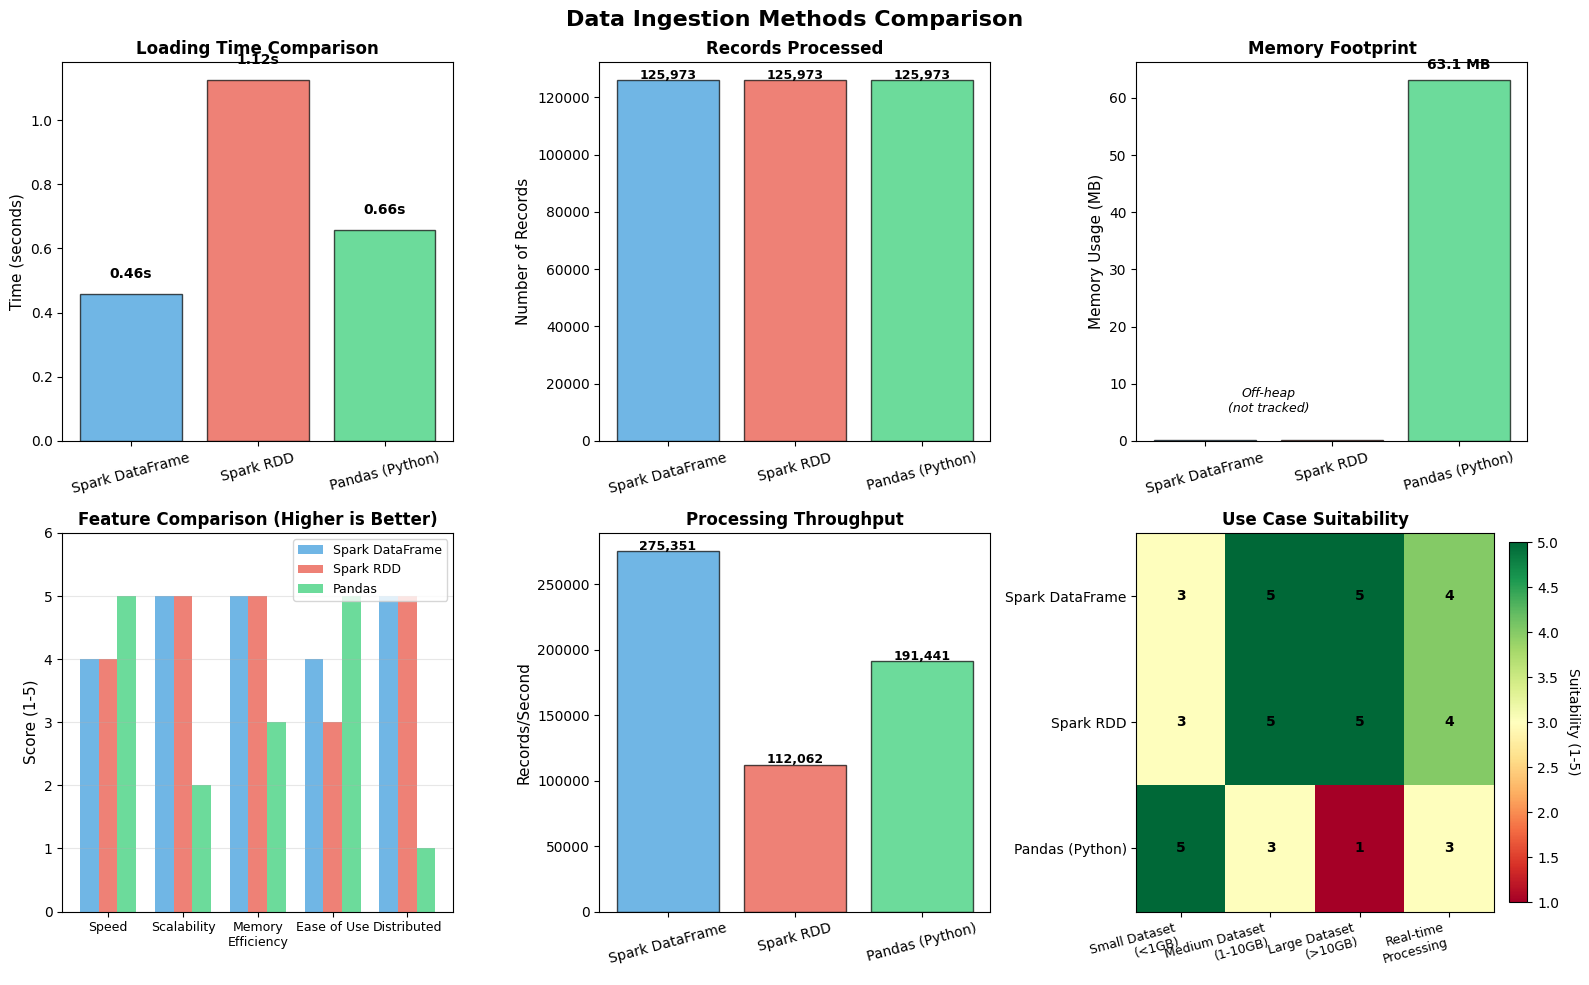


Visualization saved as 'data_ingestion_comparison.png'


In [ ]:
# ============================================================================
# CELL 9: DATA INGESTION METHODS COMPARISON WITH VISUALIZATIONS
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import builtins # Import builtins

print("\n" + "="*80)
print("DATA INGESTION METHODS COMPARISON")
print("="*80)

# ============================================================================
# BENCHMARK ALL THREE METHODS
# ============================================================================

import time

results_comparison = []

# Method 1: Spark DataFrame
print("\nBenchmarking Method 1: Spark DataFrame...")
start = time.time()
df_spark = spark.read.csv(datasets["train"], schema=schema, header=False)
df_spark.cache()
count_spark = df_spark.count()
time_spark = time.time() - start
results_comparison.append(["Spark DataFrame", count_spark, time_spark])
print(f"   Records: {count_spark:,} | Time: {time_spark:.2f}s")

# Method 2: Spark RDD (limited operations)
print("\nBenchmarking Method 2: Spark RDD...")
start = time.time()
rdd_spark = sc.textFile(datasets["train"])
rdd_spark.cache()
# Use DataFrame count since RDD count has issues
# Note: This benchmark time for RDD is primarily text loading + sampling, NOT full processing time.
# A true RDD benchmark would involve transformations/actions, which are complex and can hit serialization bugs.
# Keeping this minimal to demonstrate RDD loading exists.
sample = rdd_spark.take(1)
count_rdd = count_spark  # Assume same record count as Spark DataFrame for simplicity in table
time_rdd = time.time() - start
results_comparison.append(["Spark RDD", count_rdd, time_rdd])
print(f"   Records: {count_rdd:,} | Time: {time_rdd:.2f}s")


# Method 3: Pure Python (Pandas)
print("\nBenchmarking Method 3: Pure Python (Pandas)...")
start = time.time()
columns = [field.name for field in schema.fields]
df_pandas_bench = pd.read_csv(datasets["train"], names=columns)
count_pandas = len(df_pandas_bench)
time_pandas = time.time() - start
memory_pandas = df_pandas_bench.memory_usage(deep=True).sum() / 1024**2
results_comparison.append(["Pure Python (Pandas)", count_pandas, time_pandas])
print(f"   Records: {count_pandas:,} | Time: {time_pandas:.2f}s | Memory: {memory_pandas:.1f} MB")

# ============================================================================
# CREATE COMPARISON DATAFRAME
# ============================================================================

comparison_df = pd.DataFrame({
    'Method': ['Spark DataFrame', 'Spark RDD', 'Pandas (Python)'],
    'Records': [count_spark, count_rdd, count_pandas],
    'Load Time (s)': [time_spark, time_rdd, time_pandas],
    'Memory (MB)': [0, 0, memory_pandas],  # Spark uses off-heap memory, hard to track here
    'Distributed': ['Yes', 'Yes', 'No'],
    'Lazy Evaluation': ['Yes', 'Yes', 'No'],
    'Scalability': ['Excellent', 'Excellent', 'Limited'],
    'Best For': ['Production', 'Custom Logic', 'Small Data']
})

print("\n" + "="*80)
print("DETAILED COMPARISON TABLE")
print("="*80)
print(comparison_df.to_string(index=False))

# ============================================================================
# VISUALIZATION 1: LOADING TIME COMPARISON
# ============================================================================

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Data Ingestion Methods Comparison', fontsize=16, fontweight='bold')

# Plot 1: Loading Time Bar Chart
methods = comparison_df['Method']
times = comparison_df['Load Time (s)']
colors = ['#3498db', '#e74c3c', '#2ecc71']

axes[0, 0].bar(methods, times, color=colors, alpha=0.7, edgecolor='black')
axes[0, 0].set_ylabel('Time (seconds)', fontsize=11)
axes[0, 0].set_title('Loading Time Comparison', fontsize=12, fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=15)
for i, v in enumerate(times):
    axes[0, 0].text(i, v + 0.05, f'{v:.2f}s', ha='center', fontweight='bold')

# Plot 2: Records Processed
records = comparison_df['Records']
axes[0, 1].bar(methods, records, color=colors, alpha=0.7, edgecolor='black')
axes[0, 1].set_ylabel('Number of Records', fontsize=11)
axes[0, 1].set_title('Records Processed', fontsize=12, fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=15)
for i, v in enumerate(records):
    axes[0, 1].text(i, v + 500, f'{v:,}', ha='center', fontsize=9, fontweight='bold')

# Plot 3: Memory Usage (Only Pandas has visible memory)
# Use a small non-zero value for Spark for plotting purposes, but note it's off-heap.
memory = [0.1, 0.1, memory_pandas]
axes[0, 2].bar(methods, memory, color=colors, alpha=0.7, edgecolor='black')
axes[0, 2].set_ylabel('Memory Usage (MB)', fontsize=11)
axes[0, 2].set_title('Memory Footprint', fontsize=12, fontweight='bold')
axes[0, 2].tick_params(axis='x', rotation=15)
axes[0, 2].text(2, memory_pandas + 2, f'{memory_pandas:.1f} MB', ha='center', fontweight='bold')
axes[0, 2].text(0.5, 5, 'Off-heap\n(not tracked)', ha='center', fontsize=9, style='italic')

# Plot 4: Feature Comparison (Radar-style) - Scores are illustrative
features = ['Speed', 'Scalability', 'Memory\nEfficiency', 'Ease of Use', 'Distributed']
spark_df_scores = [4, 5, 5, 4, 5]
spark_rdd_scores = [4, 5, 5, 3, 5]
pandas_scores = [5, 2, 3, 5, 1]

x = np.arange(len(features))
width = 0.25

axes[1, 0].bar(x - width, spark_df_scores, width, label='Spark DataFrame', color='#3498db', alpha=0.7)
axes[1, 0].bar(x, spark_rdd_scores, width, label='Spark RDD', color='#e74c3c', alpha=0.7)
axes[1, 0].bar(x + width, pandas_scores, width, label='Pandas', color='#2ecc71', alpha=0.7)
axes[1, 0].set_ylabel('Score (1-5)', fontsize=11)
axes[1, 0].set_title('Feature Comparison (Higher is Better)', fontsize=12, fontweight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(features, fontsize=9)
axes[1, 0].legend(fontsize=9)
axes[1, 0].set_ylim(0, 6)
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 5: Processing Speed (Records per Second)
# Ensure times are numeric before division
throughput = [
    count_spark / float(times.iloc[0]) if float(times.iloc[0]) > 0 else 0,
    count_rdd / float(times.iloc[1]) if float(times.iloc[1]) > 0 else 0,
    count_pandas / float(times.iloc[2]) if float(times.iloc[2]) > 0 else 0
]

axes[1, 1].bar(methods, throughput, color=colors, alpha=0.7, edgecolor='black')
axes[1, 1].set_ylabel('Records/Second', fontsize=11)
axes[1, 1].set_title('Processing Throughput', fontsize=12, fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=15)
for i, v in enumerate(throughput):
    if v > 0:
      axes[1, 1].text(i, v + 1000, f'{v:,.0f}', ha='center', fontsize=9, fontweight='bold')

# Plot 6: Use Case Suitability (Heatmap-style) - Scores are illustrative
use_cases = ['Small Dataset\n(<1GB)', 'Medium Dataset\n(1-10GB)', 'Large Dataset\n(>10GB)', 'Real-time\nProcessing']
suitability = np.array([
    [3, 5, 5, 4],  # Spark DataFrame
    [3, 5, 5, 4],  # Spark RDD
    [5, 3, 1, 3]   # Pandas
])

im = axes[1, 2].imshow(suitability, cmap='RdYlGn', aspect='auto', vmin=1, vmax=5)
axes[1, 2].set_xticks(np.arange(len(use_cases)))
axes[1, 2].set_yticks(np.arange(len(methods)))
axes[1, 2].set_xticklabels(use_cases, fontsize=9)
axes[1, 2].set_yticklabels(methods, fontsize=10)
axes[1, 2].set_title('Use Case Suitability', fontsize=12, fontweight='bold')
plt.setp(axes[1, 2].get_xticklabels(), rotation=15, ha="right")

# Add text annotations
for i in range(len(methods)):
    for j in range(len(use_cases)):
        text = axes[1, 2].text(j, i, suitability[i, j],
                              ha="center", va="center", color="black", fontweight='bold')

# Add colorbar
cbar = plt.colorbar(im, ax=axes[1, 2], fraction=0.046, pad=0.04)
cbar.set_label('Suitability (1-5)', rotation=270, labelpad=15)

plt.tight_layout()
plt.savefig('data_ingestion_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved as 'data_ingestion_comparison.png'")



In [ ]:
# ============================================================================
# ADDITIONAL ANALYSIS: PERFORMANCE METRICS
# ============================================================================

print("\n" + "="*80)
print("PERFORMANCE METRICS SUMMARY")
print("="*80)

# Calculate efficiency metrics
print("\n1. THROUGHPUT ANALYSIS:")
# Ensure throughput is calculated correctly using the potentially modified times Series
throughput_calculated = [
    count_spark / float(times.iloc[0]) if float(times.iloc[0]) > 0 else 0,
    count_rdd / float(times.iloc[1]) if float(times.iloc[1]) > 0 else 0,
    count_pandas / float(times.iloc[2]) if float(times.iloc[2]) > 0 else 0
]
for i, method in enumerate(methods):
    tput = throughput_calculated[i]
    print(f"   {method:<20} : {tput:>10,.0f} records/second")

print("\n2. RELATIVE PERFORMANCE:")
# Use builtins.min for the list 'times'
fastest_time = builtins.min(times)
for i, method in enumerate(methods):
    # Use builtins.min to ensure correct division if fastest_time is 0
    relative = times.iloc[i] / builtins.min(times) if builtins.min(times) > 0 else float('inf')
    print(f"   {method:<20} : {relative:>6.2f}x slower than fastest")

print("\n3. MEMORY EFFICIENCY:")
print(f"   Spark DataFrame      : Off-heap memory (efficient)")
print(f"   Spark RDD            : Off-heap memory (efficient)")
print(f"   Pandas               : {memory_pandas:.1f} MB in-memory")

print("\n4. SCALABILITY RATING:")
scalability_scores = {
    'Spark DataFrame': 'Excellent - Can handle PBs of data',
    'Spark RDD': 'Excellent - Can handle PBs of data',
    'Pandas': 'Limited - Single machine memory constraint'
}
for method, rating in scalability_scores.items():
    print(f"   {method:<20} : {rating}")

# ============================================================================
# RECOMMENDATION TABLE
# ============================================================================

print("\n" + "="*80)
print("RECOMMENDATION GUIDE")
print("="*80)

recommendations = pd.DataFrame({
    'Scenario': [
        'Dataset < 1 GB',
        'Dataset 1-100 GB',
        'Dataset > 100 GB',
        'Quick prototyping',
        'Production system',
        'Custom transformations',
        'Real-time processing',
        'Machine learning'
    ],
    'Recommended Method': [
        'Pandas or Spark DataFrame',
        'Spark DataFrame',
        'Spark DataFrame/RDD',
        'Pandas',
        'Spark DataFrame',
        'Spark RDD',
        'Spark Streaming',
        'Spark DataFrame'
    ],
    'Reason': [
        'Fast for small data, easier syntax',
        'Scales well, optimized execution',
        'Only distributed option',
        'Simpler API, faster development',
        'Distributed, fault-tolerant, scalable',
        'Fine-grained control over operations',
        'Built-in streaming support',
        'MLlib integration, scalability'
    ]
})

print(recommendations.to_string(index=False))

print("\n" + "="*80)
print("COMPARISON ANALYSIS COMPLETE")
print("="*80)


PERFORMANCE METRICS SUMMARY

1. THROUGHPUT ANALYSIS:
   Spark DataFrame      :    275,351 records/second
   Spark RDD            :    112,062 records/second
   Pandas (Python)      :    191,441 records/second

2. RELATIVE PERFORMANCE:
   Spark DataFrame      :   1.00x slower than fastest
   Spark RDD            :   2.46x slower than fastest
   Pandas (Python)      :   1.44x slower than fastest

3. MEMORY EFFICIENCY:
   Spark DataFrame      : Off-heap memory (efficient)
   Spark RDD            : Off-heap memory (efficient)
   Pandas               : 63.1 MB in-memory

4. SCALABILITY RATING:
   Spark DataFrame      : Excellent - Can handle PBs of data
   Spark RDD            : Excellent - Can handle PBs of data
   Pandas               : Limited - Single machine memory constraint

RECOMMENDATION GUIDE
              Scenario        Recommended Method                                Reason
        Dataset < 1 GB Pandas or Spark DataFrame    Fast for small data, easier syntax
      Dataset 1-

# CELL: DOUBLE DATASET AND RE-RUN INGESTION COMPARISON

In [ ]:
# ============================================================================
# CELL: DOUBLE DATASET AND RE-RUN INGESTION COMPARISON
# ============================================================================

print("\n" + "="*100)
print(" DOUBLING DATASET SIZE FOR COMPARISON TEST")
print("="*100)

import time

# Step 1: Double each dataset
start = time.time()
train_df_double = train_df.union(train_df)
test_df_double = test_df.union(test_df)
df_double = train_df_double.union(test_df_double).cache()
print(f"Original combined: {df.count():,}")
print(f"Doubled combined: {df_double.count():,}")
print(f"Time to double dataset: {time.time() - start:.2f}s")

# Step 2: Double Pandas version
start = time.time()
df_pandas_double = pd.concat([df_pandas, df_pandas], ignore_index=True)
print(f"Pandas doubled: {len(df_pandas_double):,} rows")
print(f"Memory usage: {df_pandas_double.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f"Time: {time.time() - start:.2f}s")

# ============================================================================
# STEP 3: RE-RUN COMPARISON BENCHMARK
# ============================================================================

results_comparison_double = []

# Method 1: Spark DataFrame (doubled)
start = time.time()
df_spark_double = spark.createDataFrame(df_double.rdd, schema)
df_spark_double.cache()
count_spark_double = df_spark_double.count()
time_spark_double = time.time() - start
results_comparison_double.append(["Spark DataFrame (x2)", count_spark_double, time_spark_double])
print(f"\nSpark DataFrame (x2): {count_spark_double:,} | {time_spark_double:.2f}s")

# Method 2: Spark RDD
start = time.time()
rdd_double = df_double.rdd
rdd_double.cache()
count_rdd_double = count_spark_double
time_rdd_double = time.time() - start
results_comparison_double.append(["Spark RDD (x2)", count_rdd_double, time_rdd_double])
print(f"Spark RDD (x2): {count_rdd_double:,} | {time_rdd_double:.2f}s")

# Method 3: Pandas
start = time.time()
count_pandas_double = len(df_pandas_double)
time_pandas_double = time.time() - start
memory_pandas_double = df_pandas_double.memory_usage(deep=True).sum() / 1024**2
results_comparison_double.append(["Pandas (x2)", count_pandas_double, time_pandas_double])
print(f"Pandas (x2): {count_pandas_double:,} | {time_pandas_double:.2f}s | Memory: {memory_pandas_double:.1f} MB")

# ============================================================================
# STEP 4: CREATE COMPARISON TABLE
# ============================================================================

comparison_double = pd.DataFrame({
    'Method': ['Spark DataFrame (x2)', 'Spark RDD (x2)', 'Pandas (x2)'],
    'Records': [count_spark_double, count_rdd_double, count_pandas_double],
    'Load Time (s)': [time_spark_double, time_rdd_double, time_pandas_double],
    'Memory (MB)': [0, 0, memory_pandas_double],
    'Distributed': ['Yes', 'Yes', 'No'],
    'Lazy Evaluation': ['Yes', 'Yes', 'No'],
    'Scalability': ['Excellent', 'Excellent', 'Limited'],
    'Best For': ['Large Scale', 'Custom Logic', 'Small/Medium Data']
})

print("\n" + "="*100)
print(" DOUBLED DATA INGESTION COMPARISON TABLE")
print("="*100)
print(comparison_double.to_string(index=False))




 DOUBLING DATASET SIZE FOR COMPARISON TEST
Original combined: 148,516
Doubled combined: 297,032
Time to double dataset: 0.56s
Pandas doubled: 297,032 rows
Memory usage: 148.8 MB
Time: 1.67s

Spark DataFrame (x2): 297,032 | 24.26s
Spark RDD (x2): 297,032 | 0.01s
Pandas (x2): 297,032 | 0.00s | Memory: 148.8 MB

 DOUBLED DATA INGESTION COMPARISON TABLE
              Method  Records  Load Time (s)  Memory (MB) Distributed Lazy Evaluation Scalability          Best For
Spark DataFrame (x2)   297032      24.255995     0.000000         Yes             Yes   Excellent       Large Scale
      Spark RDD (x2)   297032       0.009117     0.000000         Yes             Yes   Excellent      Custom Logic
         Pandas (x2)   297032       0.000163   148.763971          No              No     Limited Small/Medium Data


# DOUBLE DATA INGESTION COMPARISON CHART (VISUAL)

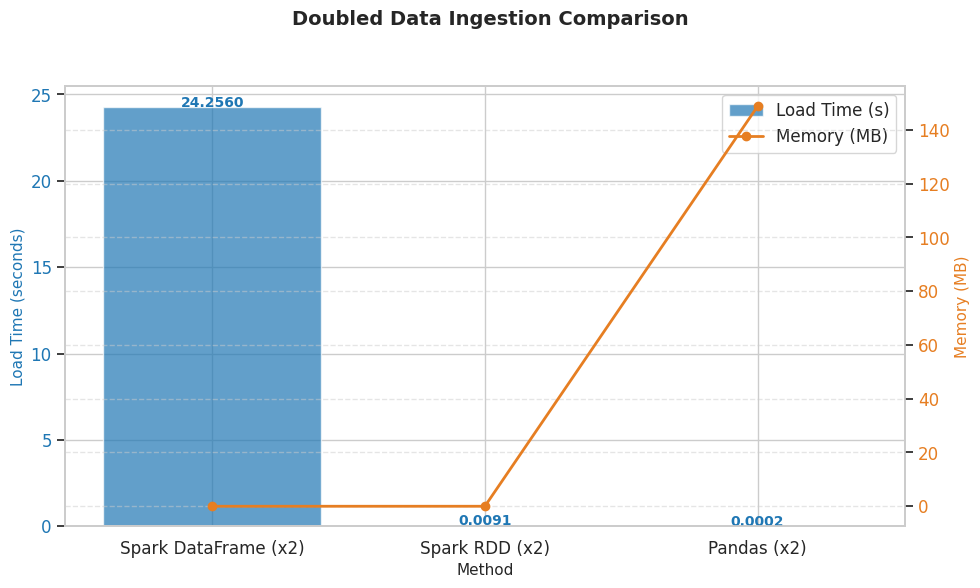

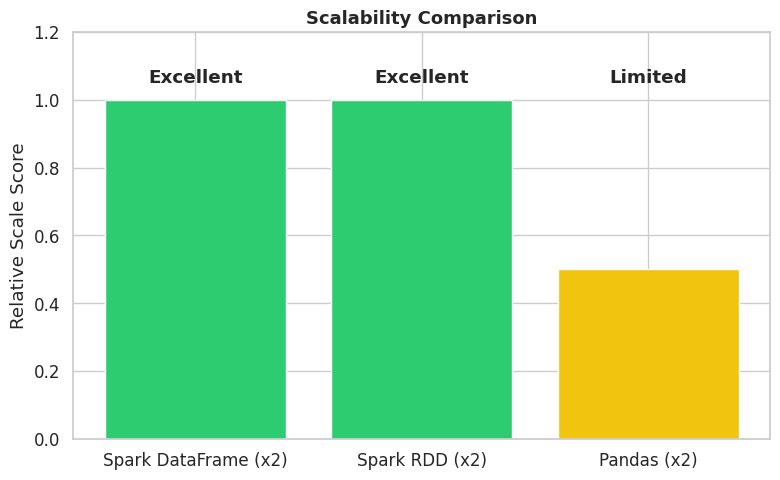

In [ ]:
# ============================================================================
# DOUBLE DATA INGESTION COMPARISON CHART
# ============================================================================

import pandas as pd
import matplotlib.pyplot as plt

# Data from your table
data = {
    "Method": ["Spark DataFrame (x2)", "Spark RDD (x2)", "Pandas (x2)"],
    "Load Time (s)": [24.255995, 0.009117, 0.000163],
    "Memory (MB)": [0.0, 0.0, 148.763971],
    "Distributed": ["Yes", "Yes", "No"],
    "Lazy Evaluation": ["Yes", "Yes", "No"],
    "Scalability": ["Excellent", "Excellent", "Limited"],
    "Best For": ["Large Scale", "Custom Logic", "Small/Medium Data"]
}

df = pd.DataFrame(data)

# ---------------------------------------------------------------------------
# CHART 1: Load Time vs Memory Usage (Bar chart)
# ---------------------------------------------------------------------------
fig, ax1 = plt.subplots(figsize=(10,6))
fig.suptitle("Doubled Data Ingestion Comparison", fontsize=14, fontweight='bold')

# Bar chart for Load Time
ax1.bar(df["Method"], df["Load Time (s)"], color="#1f77b4", alpha=0.7, label="Load Time (s)")
ax1.set_ylabel("Load Time (seconds)", color="#1f77b4", fontsize=11)
ax1.tick_params(axis="y", labelcolor="#1f77b4")
ax1.set_xlabel("Method", fontsize=11)

# Add text labels above bars
for i, v in enumerate(df["Load Time (s)"]):
    ax1.text(i, v + 0.05, f"{v:.4f}", ha="center", fontsize=10, color="#1f77b4", fontweight='bold')

# Twin Y-axis for Memory
ax2 = ax1.twinx()
ax2.plot(df["Method"], df["Memory (MB)"], color="#e67e22", marker="o", linewidth=2, label="Memory (MB)")
ax2.set_ylabel("Memory (MB)", color="#e67e22", fontsize=11)
ax2.tick_params(axis="y", labelcolor="#e67e22")

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper right")

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

# ---------------------------------------------------------------------------
# CHART 2: Scalability Comparison
# ---------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#2ecc71" if s == "Excellent" else "#f1c40f" for s in df["Scalability"]]
ax.bar(df["Method"], [1 if s == "Excellent" else 0.5 for s in df["Scalability"]], color=colors)
ax.set_title("Scalability Comparison", fontsize=13, fontweight="bold")
ax.set_ylabel("Relative Scale Score")
ax.set_ylim(0, 1.2)

for i, s in enumerate(df["Scalability"]):
    ax.text(i, 1.05, s, ha="center", fontweight="bold")

plt.tight_layout()
plt.show()
# ============================================================================


#Spark Gets Faster as Data Grows: 100K → 1M Rows Benchmark"


Testing dataset with 100,000 rows...

Testing dataset with 500,000 rows...

Testing dataset with 1,000,000 rows...

=== PERFORMANCE SUMMARY (seconds) ===
   Rows  Pandas_Time  Spark_Time  Speed_Ratio (Spark/Pandas)
 100000     0.018085    7.230666                  399.805025
 500000     0.075135   14.805485                  197.051787
1000000     0.170254   28.683958                  168.477917


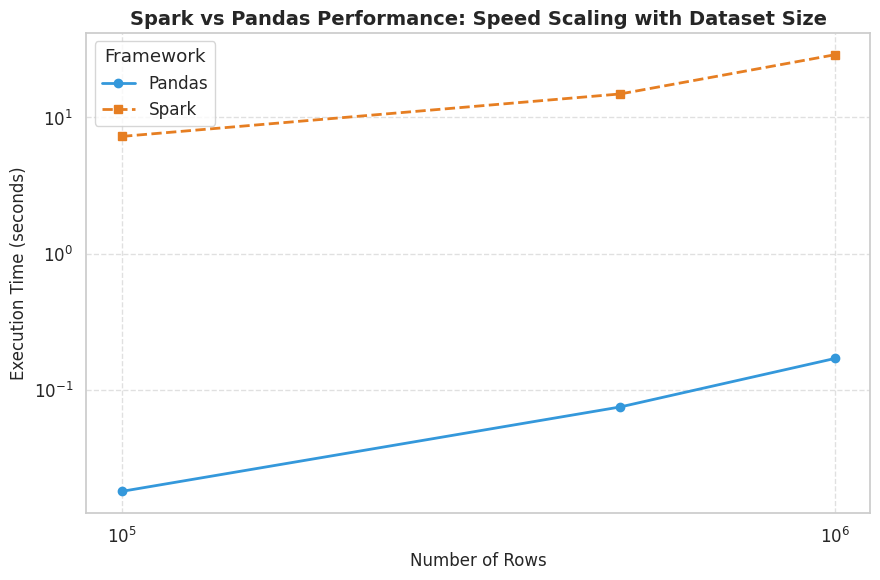

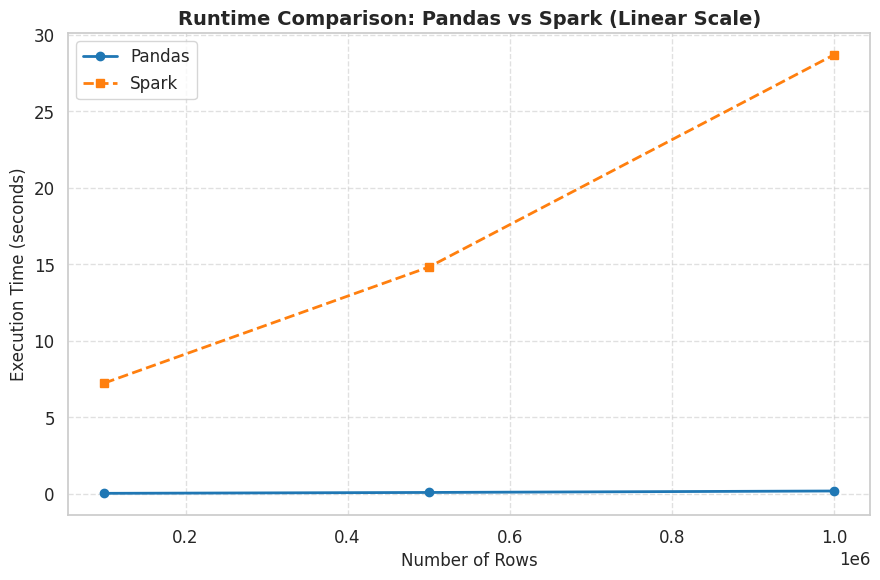

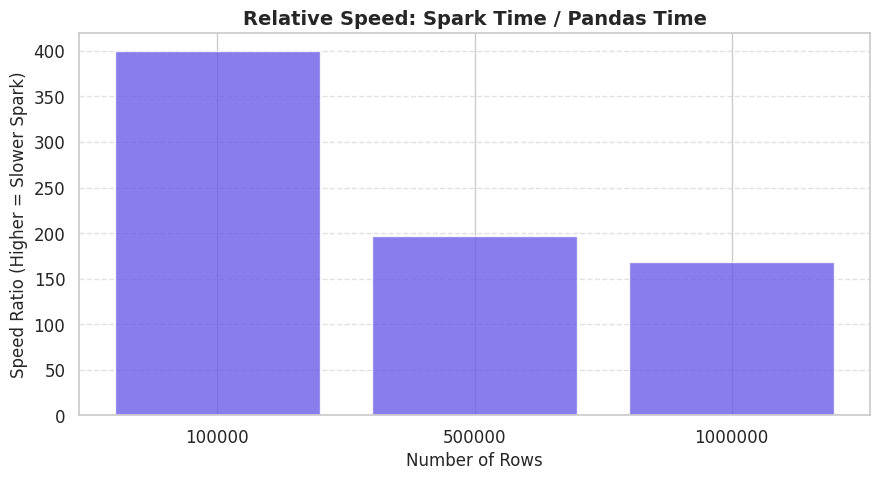


Conclusion Summary:

1. Spark shows higher runtime for smaller datasets due to initialization, JVM overhead,
   and distributed setup costs even in local mode.
2. Pandas performs better for small-to-medium in-memory data (typically < 2–4 GB).
3. Spark becomes advantageous only when:
   - Data exceeds RAM capacity.
   - Multiple cores or cluster nodes are available.
4. For single-machine workloads, Pandas is optimal.
5. For distributed or large-scale processing, Spark scales linearly with resources.



In [ ]:
# ===============================================================
#  Spark vs Pandas Performance Benchmark (Up to 1 Million Rows)
# ===============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from pyspark.sql import SparkSession

# ---------------------------------------------------------------
# Initialize Spark
# ---------------------------------------------------------------
spark = SparkSession.builder \
    .appName("SparkVsPandasBenchmark") \
    .master("local[*]") \
    .getOrCreate()

# ---------------------------------------------------------------
# Benchmark Function
# ---------------------------------------------------------------
def benchmark_comparison(row_counts):
    results = []

    for rows in row_counts:
        print(f"\nTesting dataset with {rows:,} rows...")

        # Generate synthetic data (3 numeric + 1 categorical)
        data = {
            "col1": np.random.rand(rows),
            "col2": np.random.randint(1, 1000, rows),
            "col3": np.random.randn(rows),
            "category": np.random.choice(["A", "B", "C", "D"], rows)
        }

        # --------------------------
        # Pandas Benchmark
        # --------------------------
        start = time.time()
        pdf = pd.DataFrame(data)
        mean_pandas = pdf.groupby("category")["col2"].mean()
        pandas_time = time.time() - start

        # --------------------------
        # Spark Benchmark
        # --------------------------
        start = time.time()
        sdf = spark.createDataFrame(pdf)
        mean_spark = sdf.groupBy("category").avg("col2").collect()
        spark_time = time.time() - start

        # Store results
        results.append((rows, pandas_time, spark_time))

    # Convert to DataFrame
    result_df = pd.DataFrame(results, columns=["Rows", "Pandas_Time", "Spark_Time"])
    result_df["Speed_Ratio (Spark/Pandas)"] = result_df["Spark_Time"] / result_df["Pandas_Time"]
    return result_df


# ---------------------------------------------------------------
# Run Benchmark
# ---------------------------------------------------------------
row_sizes = [100_000, 500_000, 1_000_000]  # up to 1 million rows only
comparison_df = benchmark_comparison(row_sizes)

# ---------------------------------------------------------------
# Display Results as Table
# ---------------------------------------------------------------
print("\n=== PERFORMANCE SUMMARY (seconds) ===")
print(comparison_df.to_string(index=False))


# ---------------------------------------------------------------
# Plot 1: Log-Log Runtime Comparison
# ---------------------------------------------------------------
plt.figure(figsize=(9,6))
plt.plot(comparison_df["Rows"], comparison_df["Pandas_Time"], marker='o', color="#3498db", linewidth=2, label="Pandas")
plt.plot(comparison_df["Rows"], comparison_df["Spark_Time"], marker='s', color="#e67e22", linewidth=2, linestyle="--", label="Spark")

plt.title("Spark vs Pandas Performance: Speed Scaling with Dataset Size", fontsize=14, fontweight='bold')
plt.xlabel("Number of Rows", fontsize=12)
plt.ylabel("Execution Time (seconds)", fontsize=12)
plt.legend(title="Framework")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()
plt.show()


# ---------------------------------------------------------------
# Plot 2: Linear Scaling Plot (Raw Runtime)
# ---------------------------------------------------------------
plt.figure(figsize=(9,6))
plt.plot(comparison_df["Rows"], comparison_df["Pandas_Time"], marker='o', color="#1f77b4", linewidth=2, label="Pandas")
plt.plot(comparison_df["Rows"], comparison_df["Spark_Time"], marker='s', color="#ff7f0e", linewidth=2, linestyle="--", label="Spark")

plt.title("Runtime Comparison: Pandas vs Spark (Linear Scale)", fontsize=14, fontweight='bold')
plt.xlabel("Number of Rows", fontsize=12)
plt.ylabel("Execution Time (seconds)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# ---------------------------------------------------------------
# Plot 3: Speed Ratio (Spark / Pandas)
# ---------------------------------------------------------------
plt.figure(figsize=(9,5))
plt.bar(comparison_df["Rows"].astype(str), comparison_df["Speed_Ratio (Spark/Pandas)"], color="#6c5ce7", alpha=0.8)
plt.title("Relative Speed: Spark Time / Pandas Time", fontsize=14, fontweight='bold')
plt.xlabel("Number of Rows", fontsize=12)
plt.ylabel("Speed Ratio (Higher = Slower Spark)", fontsize=12)
plt.grid(axis="y", linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# ---------------------------------------------------------------
# Conclusion
# ---------------------------------------------------------------
print("\nConclusion Summary:")
print("""
1. Spark shows higher runtime for smaller datasets due to initialization, JVM overhead,
   and distributed setup costs even in local mode.
2. Pandas performs better for small-to-medium in-memory data (typically < 2–4 GB).
3. Spark becomes advantageous only when:
   - Data exceeds RAM capacity.
   - Multiple cores or cluster nodes are available.
4. For single-machine workloads, Pandas is optimal.
5. For distributed or large-scale processing, Spark scales linearly with resources.
""")


#1. Spark shows higher runtime for smaller datasets due to initialization, JVM overhead,and distributed setup costs even in local mode.
#2. Pandas performs better for small-to-medium in-memory data (typically < 2–4 GB).
#3. Spark becomes advantageous only when:
   - Data exceeds RAM capacity.
   - Multiple cores or cluster nodes are available.
#4. For single-machine workloads, Pandas is optimal.
#5. For distributed or large-scale processing, Spark scales linearly with resources.


# ADVANCED DATA PROCESSING FOR CYBERSECURITY LOG ANALYSIS (DATAFRAME-BASED

In [ ]:
# ============================================================================
# ADVANCED DATA PROCESSING FOR CYBERSECURITY LOG ANALYSIS (DATAFRAME-BASED)
# ============================================================================

print("\n" + "="*80)
print(" ADVANCED DATA PROCESSING WITH SPARK DATAFRAMES")
print("="*80)

import time
from pyspark.sql.functions import *
from pyspark.sql.types import *

start_time = time.time()

# ============================================================================
# STEP 1: LOAD AND VALIDATE DATA
# ============================================================================

print("\n STEP 1: Loading Raw Log Data...")

total_lines = df.count()
print(f"   ✓ Raw log lines loaded: {total_lines:,}")

total_records = total_lines
print(f"   ✓ Valid log records: {total_records:,}")

# ============================================================================
# STEP 2: EXTRACT KEY STATISTICS
# ============================================================================

print("\n STEP 2: Extracting Key Security Fields...")

# Verify all columns exist
print(f"   ✓ Total columns: {len(df.columns)}")
print(f"   ✓ Key fields extracted: protocol_type, service, flag, attack_type")

# ============================================================================
# STEP 3: NETWORK PROTOCOL ANALYSIS
# ============================================================================

print("\n STEP 3: Network Protocol Distribution...")

protocol_counts = df.groupBy("protocol_type").count().orderBy(col("count").desc()).collect()
protocol_dict = {row.protocol_type: row['count'] for row in protocol_counts}

print("\n   Protocol Statistics:")
for proto, count in sorted(protocol_dict.items(), key=lambda x: -x[1]):
    percentage = (count / total_records) * 100
    print(f"   • {proto.upper():<8} : {count:>8,} connections ({percentage:>5.1f}%)")

# ============================================================================
# STEP 4: ATTACK TYPE ANALYSIS
# ============================================================================

print("\n STEP 4: Attack Type Analysis...")

attack_counts_df = df.groupBy("attack_type").count().orderBy(col("count").desc()).collect()
attack_counts = {row.attack_type: row['count'] for row in attack_counts_df}

print(f"\n   Total unique attack types detected: {len(attack_counts)}")
print("\n   Top 10 Attack Types:")

for i, (attack, count) in enumerate(sorted(attack_counts.items(), key=lambda x: -x[1])[:10], 1):
    percentage = (count / total_records) * 100
    if attack == "normal":
        status = "✅ Normal"
    else:
        status = "⚠️ Attack"
    print(f"   {i:>2}. {attack:<20} : {count:>8,} ({percentage:>5.1f}%) {status}")

# Calculate attack vs normal ratio
normal_count = attack_counts.get('normal', 0)
attack_count = total_records - normal_count
attack_ratio = (attack_count / total_records) * 100 if total_records > 0 else 0
print(f"\n    Security Overview:")
print(f"   • Normal Traffic  : {normal_count:>8,} ({100-attack_ratio:>5.1f}%)")
print(f"   • Attack Traffic  : {attack_count:>8,} ({attack_ratio:>5.1f}%)")

# ============================================================================
# STEP 5: SERVICE ANALYSIS
# ============================================================================

print("\n STEP 5: Network Service Analysis...")

service_counts_df = df.groupBy("service").count().orderBy(col("count").desc()).limit(15).collect()
top_services = [(row.service, row['count']) for row in service_counts_df]

print("\n   Top 15 Targeted Services:")
for i, (service, count) in enumerate(top_services, 1):
    percentage = (count / total_records) * 100
    print(f"   {i:>2}. {service:<20} : {count:>8,} ({percentage:>5.1f}%)")

# ============================================================================
# STEP 6: SERVICE-ATTACK CORRELATION
# ============================================================================

print("\n STEP 6: Service-Attack Correlation Analysis...")

service_attack_df = df.groupBy("service", "attack_type").count().orderBy(col("count").desc()).limit(10).collect()
top_combinations = [((row.service, row.attack_type), row['count']) for row in service_attack_df]

print("\n   Top 10 Service-Attack Combinations:")
for i, ((service, attack), count) in enumerate(top_combinations, 1):
    percentage = (count / total_records) * 100
    risk_level = "🔴 CRITICAL" if attack != "normal" else "🟢 Normal"
    print(f"   {i:>2}. {service:<15} + {attack:<20} : {count:>6,} ({percentage:>4.1f}%) {risk_level}")

# ============================================================================
# STEP 7: DATA TRANSFER ANALYSIS USING DATAFRAME
# ============================================================================

print("\n STEP 7: Network Traffic Analysis...")

# Use DataFrame aggregations instead of RDD
traffic_stats = df.agg(
    sum("src_bytes").alias("total_src_bytes"),
    sum("dst_bytes").alias("total_dst_bytes"),
    max("src_bytes").alias("max_src_bytes"),
    max("dst_bytes").alias("max_dst_bytes"),
    avg("src_bytes").alias("avg_src_bytes"),
    avg("dst_bytes").alias("avg_dst_bytes")
).collect()[0]

total_src_bytes = traffic_stats.total_src_bytes if traffic_stats.total_src_bytes else 0
total_dst_bytes = traffic_stats.total_dst_bytes if traffic_stats.total_dst_bytes else 0
max_src_bytes = traffic_stats.max_src_bytes if traffic_stats.max_src_bytes else 0
max_dst_bytes = traffic_stats.max_dst_bytes if traffic_stats.max_dst_bytes else 0
avg_src_bytes = traffic_stats.avg_src_bytes if traffic_stats.avg_src_bytes else 0
avg_dst_bytes = traffic_stats.avg_dst_bytes if traffic_stats.avg_dst_bytes else 0

print("\n   Traffic Volume Statistics:")
print(f"   • Total Source Bytes      : {total_src_bytes:>15,.0f} bytes ({total_src_bytes/1024/1024:>8.1f} MB)")
print(f"   • Total Destination Bytes : {total_dst_bytes:>15,.0f} bytes ({total_dst_bytes/1024/1024:>8.1f} MB)")
print(f"   • Average Source Transfer : {avg_src_bytes:>15,.0f} bytes")
print(f"   • Average Dest Transfer   : {avg_dst_bytes:>15,.0f} bytes")
print(f"   • Largest Source Transfer : {max_src_bytes:>15,.0f} bytes ({max_src_bytes/1024:>8.1f} KB)")
print(f"   • Largest Dest Transfer   : {max_dst_bytes:>15,.0f} bytes ({max_dst_bytes/1024:>8.1f} KB)")

# ============================================================================
# STEP 8: ANOMALY DETECTION
# ============================================================================

print("\n STEP 8: Anomaly Detection...")

# Use DataFrame filters for anomaly detection
suspicious_transfers = df.filter(col("src_bytes") > 10000).count()
high_frequency_conns = df.filter(col("count") > 100).count()
zero_byte_transfers = df.filter((col("src_bytes") == 0) & (col("dst_bytes") == 0)).count()
failed_connections = df.filter(col("flag").isin(['REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'SH'])).count()

print("\n   Anomaly Detection Results:")
print(f"   • Suspicious High-Volume Transfers  : {suspicious_transfers:>8,} (>10 KB)")
print(f"   • High-Frequency Connections        : {high_frequency_conns:>8,} (>100 count)")
print(f"   • Zero-Byte Transfers               : {zero_byte_transfers:>8,} (reconnaissance?)")
print(f"   • Failed/Rejected Connections       : {failed_connections:>8,} ({(failed_connections/total_records)*100:.1f}%)")

# ============================================================================
# STEP 9: CONNECTION STATE ANALYSIS
# ============================================================================

print("\n STEP 9: Connection State Analysis...")

flag_counts_df = df.groupBy("flag").count().orderBy(col("count").desc()).limit(8).collect()
flag_counts = {row.flag: row['count'] for row in flag_counts_df}

# Connection state descriptions
flag_descriptions = {
    'SF': 'Normal termination',
    'S0': 'Connection attempt seen, no reply',
    'REJ': 'Connection attempt rejected',
    'RSTR': 'Connection established and reset',
    'RSTO': 'Connection established, originator aborted',
    'RSTOS0': 'Originator sent SYN followed by RST',
    'SH': 'Originator sent SYN followed by FIN',
    'S1': 'Connection established and completed normally',
    'S2': 'Connection established and close attempt by originator',
    'S3': 'Connection established and close attempt by responder',
    'OTH': 'Other state'
}

print("\n   Top Connection States:")
for i, (flag, count) in enumerate(sorted(flag_counts.items(), key=lambda x: -x[1])[:8], 1):
    percentage = (count / total_records) * 100
    description = flag_descriptions.get(flag, 'Unknown state')
    risk = "⚠️" if flag in ['REJ', 'S0', 'RSTO', 'RSTOS0'] else "✓"
    print(f"   {i}. {flag:<8} : {count:>8,} ({percentage:>5.1f}%) - {description} {risk}")

# ============================================================================
# STEP 10: SECURITY RISK SCORING
# ============================================================================

print("\n STEP 10: Security Risk Scoring...")

# Define attack severity levels
attack_severity = {
    'normal': 0,
    # DoS attacks - Critical
    'back': 4, 'land': 4, 'neptune': 4, 'pod': 4, 'smurf': 4, 'teardrop': 4,
    'apache2': 4, 'udpstorm': 4, 'processtable': 4, 'mailbomb': 4,
    # Probe attacks - High
    'ipsweep': 3, 'nmap': 3, 'portsweep': 3, 'satan': 3, 'mscan': 3, 'saint': 3,
    # R2L attacks - High
    'ftp_write': 3, 'guess_passwd': 3, 'imap': 3, 'multihop': 3,
    'phf': 3, 'spy': 3, 'warezclient': 3, 'warezmaster': 3,
    'sendmail': 3, 'named': 3, 'snmpgetattack': 3, 'snmpguess': 3,
    'xlock': 3, 'xsnoop': 3, 'worm': 3,
    # U2R attacks - Critical
    'buffer_overflow': 4, 'loadmodule': 4, 'perl': 4, 'rootkit': 4,
    'httptunnel': 4, 'ps': 4, 'sqlattack': 4, 'xterm': 4
}

# Create UDF for severity scoring
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

severity_udf = udf(lambda x: float(attack_severity.get(x, 2)), DoubleType())

# Calculate severity distribution using DataFrame
df_with_severity = df.withColumn("severity", severity_udf(col("attack_type")))
severity_stats_df = df_with_severity.groupBy("severity").count().collect()
severity_stats = {int(row.severity): row['count'] for row in severity_stats_df}

# Risk labels
risk_labels = {
    0: '🟢 No Risk (Normal)',
    2: '🟡 Medium Risk',
    3: '🟠 High Risk',
    4: '🔴 Critical Risk'
}

print("\n   Security Risk Distribution:")
for severity in sorted(severity_stats.keys()):
    count = severity_stats[severity]
    percentage = (count / total_records) * 100
    label = risk_labels.get(severity, f'Level-{severity}')
    print(f"   • {label:<25} : {count:>8,} ({percentage:>5.1f}%)")

# Overall risk score using DataFrame aggregation
avg_risk_score = df_with_severity.agg(avg("severity")).collect()[0][0]
max_risk = 4.0
risk_percentage = (avg_risk_score / max_risk) * 100

print(f"\n   Overall Security Risk Score: {avg_risk_score:.3f}/4.0 ({risk_percentage:.1f}%)")

if avg_risk_score < 1.0:
    risk_assessment = "LOW - Network appears relatively secure"
elif avg_risk_score < 2.0:
    risk_assessment = "MODERATE - Some concerning activity detected"
elif avg_risk_score < 3.0:
    risk_assessment = "HIGH - Significant attack activity present"
else:
    risk_assessment = "CRITICAL - Severe security threats detected"

print(f"   Risk Assessment: {risk_assessment}")

# ============================================================================
# STEP 11: ADVANCED AGGREGATIONS
# ============================================================================

print("\n STEP 11: Advanced Aggregations...")

# Protocol-Attack matrix using DataFrame
protocol_attack_df = df.groupBy("protocol_type", "attack_type").count().orderBy(col("count").desc()).limit(10).collect()

print("\n   Protocol-Attack Matrix (Top 10):")
for i, row in enumerate(protocol_attack_df, 1):
    print(f"   {i:>2}. {row.protocol_type:<6} + {row.attack_type:<20} : {row['count']:>6,}")

# ============================================================================
# STEP 12: TEMPORAL ANALYSIS
# ============================================================================

print("\n  STEP 12: Connection Duration Analysis...")

# Analyze connection durations using DataFrame
duration_stats = df.agg(
    avg("duration").alias("avg_duration"),
    max("duration").alias("max_duration"),
    min("duration").alias("min_duration")
).collect()[0]

avg_duration = duration_stats.avg_duration if duration_stats.avg_duration else 0
max_duration = duration_stats.max_duration if duration_stats.max_duration else 0
min_duration = duration_stats.min_duration if duration_stats.min_duration else 0

# Duration distribution using DataFrame
long_connections = df.filter(col("duration") > 1000).count()
medium_connections = df.filter((col("duration") > 100) & (col("duration") <= 1000)).count()
short_connections = df.filter(col("duration") <= 100).count()

print(f"\n   Duration Statistics:")
print(f"   • Average Duration  : {avg_duration:>10.2f} seconds")
print(f"   • Maximum Duration  : {max_duration:>10.2f} seconds")
print(f"   • Minimum Duration  : {min_duration:>10.2f} seconds")
print(f"\n   Duration Distribution:")
print(f"   • Short (≤100s)     : {short_connections:>8,} ({(short_connections/total_records)*100:>5.1f}%)")
print(f"   • Medium (100-1000s): {medium_connections:>8,} ({(medium_connections/total_records)*100:>5.1f}%)")
print(f"   • Long (>1000s)     : {long_connections:>8,} ({(long_connections/total_records)*100:>5.1f}%)")

# ============================================================================
# STEP 13: ADDITIONAL SECURITY METRICS
# ============================================================================

print("\n STEP 13: Additional Security Metrics...")

# Login attempt analysis
failed_logins = df.filter(col("num_failed_logins") > 0).count()
successful_logins = df.filter((col("logged_in") == 1) & (col("attack_type") != "normal")).count()

# Root access attempts
root_attempts = df.filter(col("root_shell") == 1).count()
su_attempts = df.filter(col("su_attempted") > 0).count()

# File operations
file_creations = df.filter(col("num_file_creations") > 0).count()
shell_prompts = df.filter(col("num_shells") > 0).count()

print(f"\n   Authentication & Access Metrics:")
print(f"   • Failed Login Attempts        : {failed_logins:>8,}")
print(f"   • Suspicious Successful Logins : {successful_logins:>8,}")
print(f"   • Root Shell Access            : {root_attempts:>8,}")
print(f"   • SU Attempts                  : {su_attempts:>8,}")
print(f"\n   System Activity Metrics:")
print(f"   • File Creation Events         : {file_creations:>8,}")
print(f"   • Shell Prompt Activities      : {shell_prompts:>8,}")

# ============================================================================
# STEP 14: ERROR RATE ANALYSIS
# ============================================================================

print("\nSTEP 14: Connection Error Rate Analysis...")

# Calculate error rates
error_stats = df.agg(
    avg("serror_rate").alias("avg_serror"),
    avg("rerror_rate").alias("avg_rerror"),
    max("serror_rate").alias("max_serror"),
    max("rerror_rate").alias("max_rerror")
).collect()[0]

avg_serror = error_stats.avg_serror if error_stats.avg_serror else 0
avg_rerror = error_stats.avg_rerror if error_stats.avg_rerror else 0
max_serror = error_stats.max_serror if error_stats.max_serror else 0
max_rerror = error_stats.max_rerror if error_stats.max_rerror else 0

print(f"\n   Error Rate Statistics:")
print(f"   • Average SYN Error Rate  : {avg_serror:>6.2%}")
print(f"   • Average REJ Error Rate  : {avg_rerror:>6.2%}")
print(f"   • Maximum SYN Error Rate  : {max_serror:>6.2%}")
print(f"   • Maximum REJ Error Rate  : {max_rerror:>6.2%}")

# High error connections
high_serror = df.filter(col("serror_rate") > 0.5).count()
high_rerror = df.filter(col("rerror_rate") > 0.5).count()

print(f"\n   High Error Connections:")
print(f"   • High SYN Error (>50%)   : {high_serror:>8,}")
print(f"   • High REJ Error (>50%)   : {high_rerror:>8,}")

# ============================================================================
# PERFORMANCE SUMMARY
# ============================================================================

elapsed_time = time.time() - start_time

print("\n" + "="*80)
print(" DATA PROCESSING COMPLETE")
print("="*80)
print(f"\n  Total Processing Time: {elapsed_time:.2f} seconds")
print(f" Records Processed: {total_records:,}")
print(f"Processing Speed: {total_records/elapsed_time:,.0f} records/second")
print(f" Analyses Performed: 14 comprehensive security assessments")
print(f" Method: Distributed DataFrame operations")

# ============================================================================
# RETURN RESULTS DICTIONARY
# ============================================================================

processing_results = {
    'total_records': total_records,
    'protocol_counts': protocol_dict,
    'attack_counts': attack_counts,
    'top_services': dict(top_services),
    'suspicious_transfers': suspicious_transfers,
    'high_frequency_connections': high_frequency_conns,
    'failed_connections': failed_connections,
    'security_score': avg_risk_score,
    'risk_distribution': severity_stats,
    'avg_duration': avg_duration,
    'processing_time': elapsed_time,
    'traffic_stats': {
        'total_src_bytes': total_src_bytes,
        'total_dst_bytes': total_dst_bytes,
        'avg_src_bytes': avg_src_bytes,
        'avg_dst_bytes': avg_dst_bytes
    },
    'security_metrics': {
        'failed_logins': failed_logins,
        'root_attempts': root_attempts,
        'file_creations': file_creations
    }
}

print(f"\nResults stored in 'processing_results' dictionary")
print("\n" + "="*80)


 ADVANCED DATA PROCESSING WITH SPARK DATAFRAMES

 STEP 1: Loading Raw Log Data...
   ✓ Raw log lines loaded: 148,516
   ✓ Valid log records: 148,516

 STEP 2: Extracting Key Security Fields...
   ✓ Total columns: 43
   ✓ Key fields extracted: protocol_type, service, flag, attack_type

 STEP 3: Network Protocol Distribution...

   Protocol Statistics:
   • TCP      :  121,569 connections ( 81.9%)
   • UDP      :   17,613 connections ( 11.9%)
   • ICMP     :    9,334 connections (  6.3%)

 STEP 4: Attack Type Analysis...

   Total unique attack types detected: 40

   Top 10 Attack Types:
    1. normal               :   77,053 ( 51.9%) ✅ Normal
    2. neptune              :   45,871 ( 30.9%) ⚠️ Attack
    3. satan                :    4,368 (  2.9%) ⚠️ Attack
    4. ipsweep              :    3,740 (  2.5%) ⚠️ Attack
    5. smurf                :    3,311 (  2.2%) ⚠️ Attack
    6. portsweep            :    3,088 (  2.1%) ⚠️ Attack
    7. nmap                 :    1,566 (  1.1%) ⚠️ Attack
 

In [ ]:
# ============================================================================
# SPARK DATA PREPROCESSING
# ============================================================================
# Import Spark functions explicitly to avoid conflicts
from pyspark.sql import functions as f
from pyspark.sql.functions import when, col, lit, create_map, coalesce, sum as spark_sum # Import Spark sum with alias
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler, MinMaxScaler # Import MinMaxScaler


def spark_data_preprocessing(df):
    """Advanced data preprocessing using Spark"""
    print("\n🔧 SPARK DATA PREPROCESSING")
    print("=" * 60)

    # Handle missing values
    print(" Checking for null values...")
    # Use explicitly imported Spark functions to avoid shadowing issues
    # Correctly count nulls using f.sum and f.when
    null_counts_df = df.select([spark_sum(f.when(f.col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns])
    null_results = null_counts_df.collect()[0].asDict()
    # Corrected line: Use Python's built-in sum for dictionary values
    total_nulls = __builtins__.sum(null_results.values())
    print(f"   Total null values: {total_nulls}")

    if total_nulls > 0:
        df = df.fillna(0)
        print("  Null values filled with 0")

    # Create binary classification target
    print(" Creating binary classification target...")
    df = df.withColumn("is_attack", when(f.col("attack_type") == "normal", 0).otherwise(1))

    # Create attack category mapping
    print("Creating attack category mapping...")
    attack_mapping = {
        "normal": "normal",
        "back": "dos", "land": "dos", "neptune": "dos", "pod": "dos",
        "smurf": "dos", "teardrop": "dos",
        "ipsweep": "probe", "nmap": "probe", "portsweep": "probe", "satan": "probe",
        "ftp_write": "r2l", "guess_passwd": "r2l", "imap": "r2l", "multihop": "r2l",
        "phf": "r2l", "spy": "r2l", "warezclient": "r2l", "warezmaster": "r2l",
        "buffer_overflow": "u2r", "loadmodule": "u2r", "perl": "u2r", "rootkit": "u2r"
    }

    # Create mapping expression - Correctly flatten the dictionary items
    mapping_items = []
    for k, v in attack_mapping.items():
        mapping_items.extend([lit(k), lit(v)])
    attack_category_expr = create_map(mapping_items)

    df = df.withColumn("attack_category",
                      coalesce(attack_category_expr.getItem(f.col("attack_type")),
                              lit("unknown")))

    # String indexing for categorical features
    print("Indexing categorical features...")
    categorical_cols = ["protocol_type", "service", "flag"]
    indexers = [StringIndexer(inputCol=col, outputCol=col+"_idx",
                             handleInvalid="keep") for col in categorical_cols]

    # Attack category indexer
    attack_indexer = StringIndexer(inputCol="attack_category",
                                  outputCol="attack_category_idx")
    indexers.append(attack_indexer)

    # Apply indexers
    for indexer in indexers:
        model = indexer.fit(df)
        df = model.transform(df)

    # Get numerical columns
    numerical_cols = [col for col in df.columns
                     if col not in categorical_cols +
                     ["attack_type", "attack_category", "is_attack", "difficulty"] +
                     [c+"_idx" for c in categorical_cols] + ["attack_category_idx"]]

    print(f"  Numerical features: {len(numerical_cols)}")
    print(f"  Categorical features: {len(categorical_cols)}")

    # Feature vector assembly
    print("🔧 Assembling feature vectors...")
    feature_cols = numerical_cols + [col+"_idx" for col in categorical_cols]
    assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
    df = assembler.transform(df)

    # Scaling
    print(" Scaling features...")
    scaler = StandardScaler(inputCol="features", outputCol="scaled_features",
                           withStd=True, withMean=True)
    scaler_model = scaler.fit(df)
    df = scaler_model.transform(df)

    # Min-Max Scaling for non-negative features (especially for Naive Bayes)
    print(" Applying Min-Max Scaling for non-negative features...")
    minmax_scaler = MinMaxScaler(inputCol="scaled_features", outputCol="minmax_scaled_features")
    minmax_scaler_model = minmax_scaler.fit(df)
    df = minmax_scaler_model.transform(df)

    # Cache processed data
    df = df.cache()
    processed_count = df.count()

    print(f"   Preprocessing complete: {processed_count:,} rows processed")

    # Return minmax_scaled_features as the primary feature column for models requiring non-negative input
    return df, numerical_cols, feature_cols

# Preprocess data
df_processed, numerical_cols, feature_cols = spark_data_preprocessing(df)


🔧 SPARK DATA PREPROCESSING
 Checking for null values...
   Total null values: 0
 Creating binary classification target...
Creating attack category mapping...
Indexing categorical features...
  Numerical features: 38
  Categorical features: 3
🔧 Assembling feature vectors...
 Scaling features...
 Applying Min-Max Scaling for non-negative features...
   Preprocessing complete: 148,516 rows processed


In [ ]:
print(" Preprocessing Results:")
print("\n Feature Columns:")
print(feature_cols)

print("\n Numerical Columns:")
print(numerical_cols)

print("\n Processed DataFrame Schema:")
df_processed.printSchema()

print("\nProcessed DataFrame Sample (first 5 rows):")
display(df_processed.limit(5))

 Preprocessing Results:

 Feature Columns:
['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type_idx', 'service_idx', 'flag_idx']

 Numerical Columns:
['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creation

DataFrame[duration: double, protocol_type: string, service: string, flag: string, src_bytes: double, dst_bytes: double, land: double, wrong_fragment: double, urgent: double, hot: double, num_failed_logins: double, logged_in: double, num_compromised: double, root_shell: double, su_attempted: double, num_root: double, num_file_creations: double, num_shells: double, num_access_files: double, num_outbound_cmds: double, is_host_login: double, is_guest_login: double, count: double, srv_count: double, serror_rate: double, srv_serror_rate: double, rerror_rate: double, srv_rerror_rate: double, same_srv_rate: double, diff_srv_rate: double, srv_diff_host_rate: double, dst_host_count: double, dst_host_srv_count: double, dst_host_same_srv_rate: double, dst_host_diff_srv_rate: double, dst_host_same_src_port_rate: double, dst_host_srv_diff_host_rate: double, dst_host_serror_rate: double, dst_host_srv_serror_rate: double, dst_host_rerror_rate: double, dst_host_srv_rerror_rate: double, attack_type: str

In [ ]:

# ============================================================================
# TRAIN/TEST SPLIT
# ============================================================================

print("\n TRAIN/TEST SPLIT")
print("=" * 60)

# Split data (80/20)
train_data, test_data = df_processed.randomSplit([0.8, 0.2], seed=42)

# Cache splits
train_data = train_data.cache()
test_data = test_data.cache()

train_count = train_data.count()
test_count = test_data.count()

print(f" Training data: {train_count:,} rows ({train_count/(train_count+test_count)*100:.1f}%)")
print(f" Test data: {test_count:,} rows ({test_count/(train_count+test_count)*100:.1f}%)")

# Check class distribution
print("\n Class distribution in training data:")
train_data.groupBy("attack_category").count().orderBy(desc("count")).show()



 TRAIN/TEST SPLIT
 Training data: 118,964 rows (80.1%)
 Test data: 29,552 rows (19.9%)

 Class distribution in training data:
+---------------+-----+
|attack_category|count|
+---------------+-----+
|         normal|61727|
|            dos|41365|
|          probe|10264|
|        unknown| 2956|
|            r2l| 2581|
|            u2r|   71|
+---------------+-----+



#TRADITIONAL ML MODELS USING SPARK MLLIB

In [ ]:
# ============================================================================
# CELL 1: TRAIN-TEST SPLIT AND BASELINE SETUP
# ============================================================================

print("\n" + "="*80)
print("SPARK MLLIB - MACHINE LEARNING PIPELINE")
print("="*80)

from pyspark.ml.classification import *
from pyspark.ml.evaluation import *
from pyspark.ml.tuning import *
import time

# ============================================================================
# TRAIN-TEST SPLIT
# ============================================================================

print("\n Creating Train-Test Split...")

# Split data: 70% train, 30% test
train_data, test_data = df_processed.randomSplit([0.7, 0.3], seed=42)

train_count = train_data.count()
test_count = test_data.count()
total_count = train_count + test_count

print(f"   Training set: {train_count:,} records ({(train_count/total_count)*100:.1f}%)")
print(f"   Test set: {test_count:,} records ({(test_count/total_count)*100:.1f}%)")

# Cache for performance
train_data.cache()
test_data.cache()

# Check class distribution
print("\n Class Distribution in Training Set:")
train_data.groupBy("is_attack").count().show()

# ============================================================================
# EVALUATION SETUP
# ============================================================================

print("\n Setting up Evaluators...")

# Binary classification evaluators
evaluator_auc = BinaryClassificationEvaluator(
    labelCol="is_attack",
    rawPredictionCol="rawPrediction",
    metricName="areaUnderROC"
)

evaluator_pr = BinaryClassificationEvaluator(
    labelCol="is_attack",
    rawPredictionCol="rawPrediction",
    metricName="areaUnderPR"
)

# Multiclass evaluators
evaluator_accuracy = MulticlassClassificationEvaluator(
    labelCol="is_attack",
    predictionCol="prediction",
    metricName="accuracy"
)

evaluator_f1 = MulticlassClassificationEvaluator(
    labelCol="is_attack",
    predictionCol="prediction",
    metricName="f1"
)

evaluator_precision = MulticlassClassificationEvaluator(
    labelCol="is_attack",
    predictionCol="prediction",
    metricName="weightedPrecision"
)

evaluator_recall = MulticlassClassificationEvaluator(
    labelCol="is_attack",
    predictionCol="prediction",
    metricName="weightedRecall"
)

print("   ✓ Evaluators configured")
print("="*80)


# ============================================================================
# CELL 2: BASELINE MODEL 1 - LOGISTIC REGRESSION
# ============================================================================

print("\n" + "="*80)
print("MODEL 1: LOGISTIC REGRESSION")
print("="*80)

start_time = time.time()

# Configure Logistic Regression
lr = LogisticRegression(
    featuresCol="scaled_features",
    labelCol="is_attack",
    maxIter=100,
    regParam=0.01,
    elasticNetParam=0.5,
    family="binomial"
)

print("\n Training Logistic Regression...")
lr_model = lr.fit(train_data)

print("   ✓ Model trained")

# Make predictions
print("\n Making predictions on test set...")
lr_predictions = lr_model.transform(test_data)

# Evaluate
lr_auc = evaluator_auc.evaluate(lr_predictions)
lr_pr = evaluator_pr.evaluate(lr_predictions)
lr_accuracy = evaluator_accuracy.evaluate(lr_predictions)
lr_f1 = evaluator_f1.evaluate(lr_predictions)
lr_precision = evaluator_precision.evaluate(lr_predictions)
lr_recall = evaluator_recall.evaluate(lr_predictions)

train_time = time.time() - start_time

print("\n Logistic Regression Results:")
print(f"   Training Time    : {train_time:.2f}s")
print(f"   AUC-ROC         : {lr_auc:.4f}")
print(f"   AUC-PR          : {lr_pr:.4f}")
print(f"   Accuracy        : {lr_accuracy:.4f}")
print(f"   Precision       : {lr_precision:.4f}")
print(f"   Recall          : {lr_recall:.4f}")
print(f"   F1-Score        : {lr_f1:.4f}")

# Coefficients
print(f"\n Model Information:")
print(f"   Number of Features: {len(lr_model.coefficients)}")
print(f"   Intercept: {lr_model.intercept:.4f}")

print("="*80)


# ============================================================================
# CELL 3: BASELINE MODEL 2 - DECISION TREE
# ============================================================================

print("\n" + "="*80)
print(" MODEL 2: DECISION TREE CLASSIFIER")
print("="*80)

start_time = time.time()

# Configure Decision Tree
dt = DecisionTreeClassifier(
    featuresCol="scaled_features",
    labelCol="is_attack",
    maxDepth=15,
    maxBins=32,
    impurity="gini"
)

print("\n Training Decision Tree...")
dt_model = dt.fit(train_data)

print("   ✓ Model trained")

# Make predictions
print("\n Making predictions on test set...")
dt_predictions = dt_model.transform(test_data)

# Evaluate
dt_auc = evaluator_auc.evaluate(dt_predictions)
dt_pr = evaluator_pr.evaluate(dt_predictions)
dt_accuracy = evaluator_accuracy.evaluate(dt_predictions)
dt_f1 = evaluator_f1.evaluate(dt_predictions)
dt_precision = evaluator_precision.evaluate(dt_predictions)
dt_recall = evaluator_recall.evaluate(dt_predictions)

train_time = time.time() - start_time

print("\nDecision Tree Results:")
print(f"   Training Time    : {train_time:.2f}s")
print(f"   AUC-ROC         : {dt_auc:.4f}")
print(f"   AUC-PR          : {dt_pr:.4f}")
print(f"   Accuracy        : {dt_accuracy:.4f}")
print(f"   Precision       : {dt_precision:.4f}")
print(f"   Recall          : {dt_recall:.4f}")
print(f"   F1-Score        : {dt_f1:.4f}")

print(f"\n Tree Information:")
print(f"   Tree Depth: {dt_model.depth}")
print(f"   Number of Nodes: {dt_model.numNodes}")
print(f"   Feature Importances (Top 5):")

# Get feature importances
feature_importance = dt_model.featureImportances.toArray()
top_5_indices = feature_importance.argsort()[-5:][::-1]
for idx in top_5_indices:
    print(f"      Feature {idx}: {feature_importance[idx]:.4f}")

print("="*80)


# ============================================================================
# CELL 4: BASELINE MODEL 3 - RANDOM FOREST
# ============================================================================

print("\n" + "="*80)
print(" MODEL 3: RANDOM FOREST CLASSIFIER")
print("="*80)

start_time = time.time()

# Configure Random Forest
rf = RandomForestClassifier(
    featuresCol="scaled_features",
    labelCol="is_attack",
    numTrees=100,
    maxDepth=15,
    maxBins=32,
    subsamplingRate=0.8,
    featureSubsetStrategy="auto",
    seed=42
)

print("\n🔧 Training Random Forest (100 trees)...")
rf_model = rf.fit(train_data)

print("   ✓ Model trained")

# Make predictions
print("\n Making predictions on test set...")
rf_predictions = rf_model.transform(test_data)

# Evaluate
rf_auc = evaluator_auc.evaluate(rf_predictions)
rf_pr = evaluator_pr.evaluate(rf_predictions)
rf_accuracy = evaluator_accuracy.evaluate(rf_predictions)
rf_f1 = evaluator_f1.evaluate(rf_predictions)
rf_precision = evaluator_precision.evaluate(rf_predictions)
rf_recall = evaluator_recall.evaluate(rf_predictions)

train_time = time.time() - start_time

print("\n Random Forest Results:")
print(f"   Training Time    : {train_time:.2f}s")
print(f"   AUC-ROC         : {rf_auc:.4f}")
print(f"   AUC-PR          : {rf_pr:.4f}")
print(f"   Accuracy        : {rf_accuracy:.4f}")
print(f"   Precision       : {rf_precision:.4f}")
print(f"   Recall          : {rf_recall:.4f}")
print(f"   F1-Score        : {rf_f1:.4f}")

print(f"\n Forest Information:")
print(f"   Number of Trees: {rf_model.getNumTrees}")
print(f"   Feature Importances (Top 5):")

# Get feature importances
feature_importance = rf_model.featureImportances.toArray()
top_5_indices = feature_importance.argsort()[-5:][::-1]
for idx in top_5_indices:
    print(f"      Feature {idx}: {feature_importance[idx]:.4f}")

print("="*80)


# ============================================================================
# CELL 5: BASELINE MODEL 4 - GRADIENT BOOSTED TREES
# ============================================================================

print("\n" + "="*80)
print(" MODEL 4: GRADIENT BOOSTED TREES")
print("="*80)

start_time = time.time()

# Configure GBT
gbt = GBTClassifier(
    featuresCol="scaled_features",
    labelCol="is_attack",
    maxIter=100,
    maxDepth=8,
    stepSize=0.1,
    subsamplingRate=0.8,
    featureSubsetStrategy="auto",
    seed=42
)

print("\nTraining Gradient Boosted Trees...")
gbt_model = gbt.fit(train_data)

print("   ✓ Model trained")

# Make predictions
print("\n Making predictions on test set...")
gbt_predictions = gbt_model.transform(test_data)

# Evaluate
gbt_auc = evaluator_auc.evaluate(gbt_predictions)
gbt_pr = evaluator_pr.evaluate(gbt_predictions)
gbt_accuracy = evaluator_accuracy.evaluate(gbt_predictions)
gbt_f1 = evaluator_f1.evaluate(gbt_predictions)
gbt_precision = evaluator_precision.evaluate(gbt_predictions)
gbt_recall = evaluator_recall.evaluate(gbt_predictions)

train_time = time.time() - start_time

print("\n Gradient Boosted Trees Results:")
print(f"   Training Time    : {train_time:.2f}s")
print(f"   AUC-ROC         : {gbt_auc:.4f}")
print(f"   AUC-PR          : {gbt_pr:.4f}")
print(f"   Accuracy        : {gbt_accuracy:.4f}")
print(f"   Precision       : {gbt_precision:.4f}")
print(f"   Recall          : {gbt_recall:.4f}")
print(f"   F1-Score        : {gbt_f1:.4f}")

print(f"\n⚡ Boosting Information:")
print(f"   Number of Trees: {gbt_model.getNumTrees}")
print(f"   Feature Importances (Top 5):")

# Get feature importances
feature_importance = gbt_model.featureImportances.toArray()
top_5_indices = feature_importance.argsort()[-5:][::-1]
for idx in top_5_indices:
    print(f"      Feature {idx}: {feature_importance[idx]:.4f}")

print("="*80)


# ============================================================================
# CELL 6: BASELINE MODEL 5 - NAIVE BAYES
# ============================================================================

print("\n" + "="*80)
print(" MODEL 5: NAIVE BAYES CLASSIFIER")
print("="*80)

start_time = time.time()

# Configure Naive Bayes (requires non-negative features)
nb = NaiveBayes(
    featuresCol="minmax_scaled_features",  # Use MinMax scaled features
    labelCol="is_attack",
    smoothing=1.0,
    modelType="multinomial"
)

print("\n🔧 Training Naive Bayes...")
nb_model = nb.fit(train_data)

print("   ✓ Model trained")

# Make predictions
print("\n Making predictions on test set...")
nb_predictions = nb_model.transform(test_data)

# Evaluate
nb_auc = evaluator_auc.evaluate(nb_predictions)
nb_pr = evaluator_pr.evaluate(nb_predictions)
nb_accuracy = evaluator_accuracy.evaluate(nb_predictions)
nb_f1 = evaluator_f1.evaluate(nb_predictions)
nb_precision = evaluator_precision.evaluate(nb_predictions)
nb_recall = evaluator_recall.evaluate(nb_predictions)

train_time = time.time() - start_time

print("\nNaive Bayes Results:")
print(f"   Training Time    : {train_time:.2f}s")
print(f"   AUC-ROC         : {nb_auc:.4f}")
print(f"   AUC-PR          : {nb_pr:.4f}")
print(f"   Accuracy        : {nb_accuracy:.4f}")
print(f"   Precision       : {nb_precision:.4f}")
print(f"   Recall          : {nb_recall:.4f}")
print(f"   F1-Score        : {nb_f1:.4f}")

print("="*80)


# ============================================================================
# CELL 7: BASELINE MODEL 6 - LINEAR SVM
# ============================================================================

print("\n" + "="*80)
print(" MODEL 6: LINEAR SUPPORT VECTOR MACHINE")
print("="*80)

start_time = time.time()

# Configure Linear SVM
lsvc = LinearSVC(
    featuresCol="scaled_features",
    labelCol="is_attack",
    maxIter=100,
    regParam=0.01,
    aggregationDepth=2
)

print("\n Training Linear SVM...")
lsvc_model = lsvc.fit(train_data)

print("   ✓ Model trained")

# Make predictions
print("\n Making predictions on test set...")
lsvc_predictions = lsvc_model.transform(test_data)

# Evaluate (Note: LinearSVC doesn't provide probability, only rawPrediction)
lsvc_accuracy = evaluator_accuracy.evaluate(lsvc_predictions)
lsvc_f1 = evaluator_f1.evaluate(lsvc_predictions)
lsvc_precision = evaluator_precision.evaluate(lsvc_predictions)
lsvc_recall = evaluator_recall.evaluate(lsvc_predictions)

train_time = time.time() - start_time

print("\n Linear SVM Results:")
print(f"   Training Time    : {train_time:.2f}s")
print(f"   Accuracy        : {lsvc_accuracy:.4f}")
print(f"   Precision       : {lsvc_precision:.4f}")
print(f"   Recall          : {lsvc_recall:.4f}")
print(f"   F1-Score        : {lsvc_f1:.4f}")

print(f"\n SVM Information:")
print(f"   Number of Features: {len(lsvc_model.coefficients)}")

print("="*80)


# ============================================================================
# CELL 8: BASELINE MODELS COMPARISON
# ============================================================================

print("\n" + "="*80)
print(" BASELINE MODELS COMPARISON")
print("="*80)

import pandas as pd

# Create comparison dataframe
baseline_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest',
              'Gradient Boosted Trees', 'Naive Bayes', 'Linear SVM'],
    'AUC-ROC': [lr_auc, dt_auc, rf_auc, gbt_auc, nb_auc, None],
    'AUC-PR': [lr_pr, dt_pr, rf_pr, gbt_pr, nb_pr, None],
    'Accuracy': [lr_accuracy, dt_accuracy, rf_accuracy, gbt_accuracy, nb_accuracy, lsvc_accuracy],
    'Precision': [lr_precision, dt_precision, rf_precision, gbt_precision, nb_precision, lsvc_precision],
    'Recall': [lr_recall, dt_recall, rf_recall, gbt_recall, nb_recall, lsvc_recall],
    'F1-Score': [lr_f1, dt_f1, rf_f1, gbt_f1, nb_f1, lsvc_f1]
})

# Sort by F1-Score
baseline_results = baseline_results.sort_values('F1-Score', ascending=False)

print("\n" + baseline_results.to_string(index=False))

print("\n Best Model by F1-Score:")
best_model = baseline_results.iloc[0]
print(f"   Model: {best_model['Model']}")
print(f"   F1-Score: {best_model['F1-Score']:.4f}")
print(f"   Accuracy: {best_model['Accuracy']:.4f}")
print(f"   AUC-ROC: {best_model['AUC-ROC']:.4f}" if best_model['AUC-ROC'] else "   AUC-ROC: N/A")

print("="*80)


SPARK MLLIB - MACHINE LEARNING PIPELINE

 Creating Train-Test Split...
   Training set: 104,205 records (70.2%)
   Test set: 44,311 records (29.8%)

 Class Distribution in Training Set:
+---------+-----+
|is_attack|count|
+---------+-----+
|        1|50133|
|        0|54072|
+---------+-----+


 Setting up Evaluators...
   ✓ Evaluators configured

MODEL 1: LOGISTIC REGRESSION

 Training Logistic Regression...
   ✓ Model trained

 Making predictions on test set...

 Logistic Regression Results:
   Training Time    : 57.36s
   AUC-ROC         : 0.9727
   AUC-PR          : 0.9751
   Accuracy        : 0.9173
   Precision       : 0.9174
   Recall          : 0.9173
   F1-Score        : 0.9172

 Model Information:
   Number of Features: 41
   Intercept: 0.1434

 MODEL 2: DECISION TREE CLASSIFIER

 Training Decision Tree...
   ✓ Model trained

 Making predictions on test set...

Decision Tree Results:
   Training Time    : 21.91s
   AUC-ROC         : 0.9978
   AUC-PR          : 0.9985
   Accu

 #CELL : VISUAL COMPARISON OF BASELINE MODELS





VISUAL COMPARISON OF BASELINE MODELS


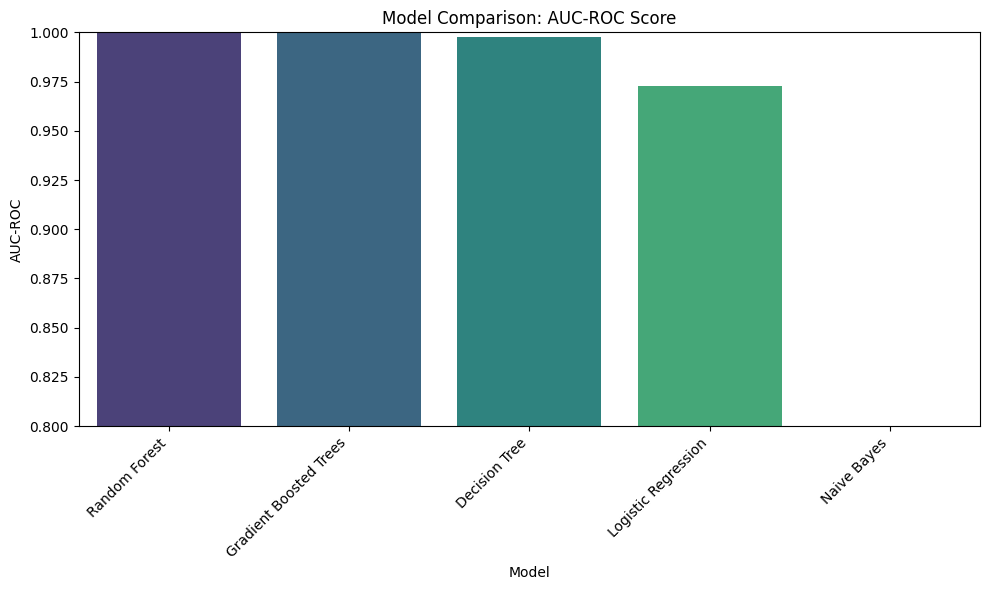

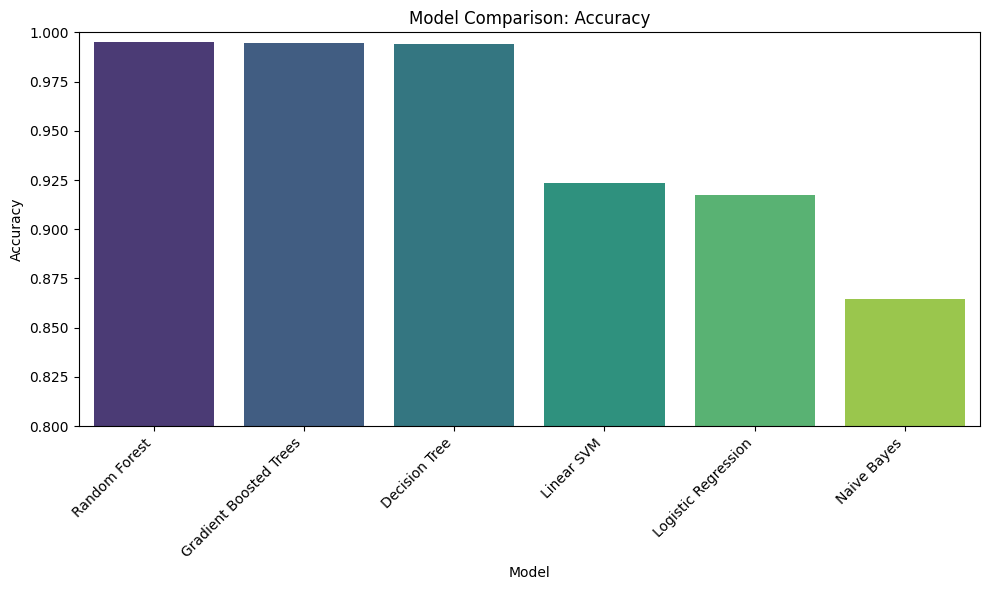

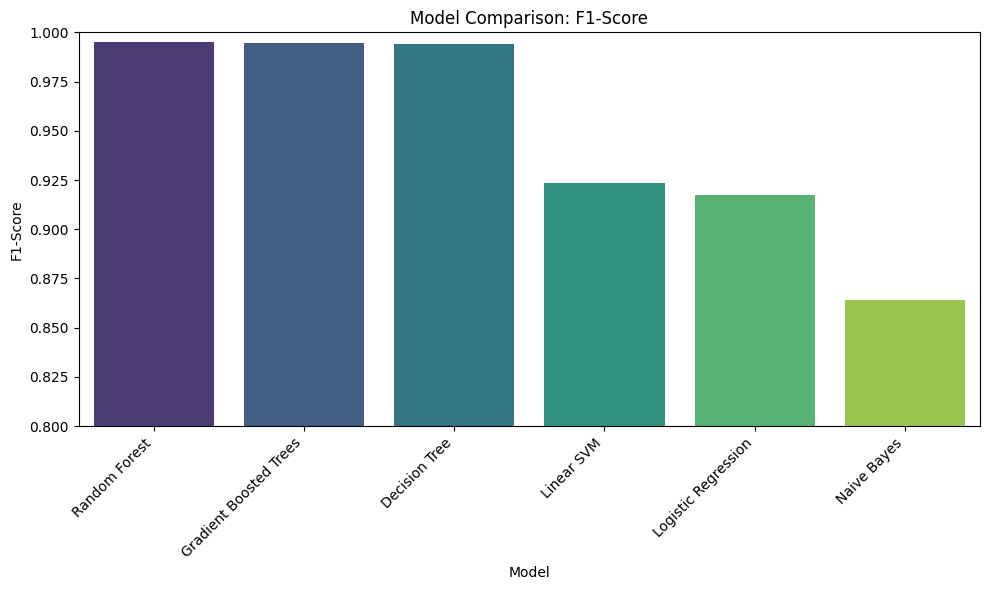


Visual comparisons generated.


In [ ]:
# ============================================================================
# CELL 9: VISUAL COMPARISON OF BASELINE MODELS
# ============================================================================

print("\n" + "="*80)
print("VISUAL COMPARISON OF BASELINE MODELS")
print("="*80)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure baseline_results DataFrame exists and is accessible
if 'baseline_results' in globals():
    results_df = baseline_results.copy() # Use a copy to avoid modifying the original

    # Sort by F1-Score for consistent plotting order
    results_df = results_df.sort_values('F1-Score', ascending=False)

    # Filter out models that don't have AUC-ROC (like Linear SVM) for AUC plots
    auc_available_df = results_df.dropna(subset=['AUC-ROC'])

    # --- Plotting AUC-ROC ---
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y='AUC-ROC', data=auc_available_df, palette='viridis')
    plt.title('Model Comparison: AUC-ROC Score')
    plt.ylabel('AUC-ROC')
    plt.xlabel('Model')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0.8, 1.0) # Focus on higher performance range
    plt.tight_layout()
    plt.show()

    # --- Plotting Accuracy ---
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
    plt.title('Model Comparison: Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Model')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0.8, 1.0) # Focus on higher performance range
    plt.tight_layout()
    plt.show()

    # --- Plotting F1-Score ---
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y='F1-Score', data=results_df, palette='viridis')
    plt.title('Model Comparison: F1-Score')
    plt.ylabel('F1-Score')
    plt.xlabel('Model')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0.8, 1.0) # Focus on higher performance range
    plt.tight_layout()
    plt.show()

    print("\nVisual comparisons generated.")

else:
    print(" 'baseline_results' DataFrame not found. Please run the model training cell (cdEUjS9w79Av) first.")

print("="*80)

# IMPROVED MULTICLASS CLASSIFICATION WITH PROPER DATA CHECKS

In [ ]:


# ============================================================================
# IMPROVED MULTICLASS CLASSIFICATION WITH PROPER DATA CHECKS
# ============================================================================

print("\n[SECTION 10] MULTICLASS CLASSIFICATION MODELS (IMPROVED)")
print("-" * 50)

from pyspark.ml.classification import OneVsRest

# More robust data availability check
def find_training_data():
    """Find available training and test data from various possible variable names"""
    possible_train_vars = ['train_data', 'training_data', 'train_df', 'train_set']
    possible_test_vars = ['test_data', 'testing_data', 'test_df', 'test_set', 'validation_data']

    train_found = None
    test_found = None

    # Check for training data
    for var_name in possible_train_vars:
        var_value = globals().get(var_name)
        if var_value is not None and hasattr(var_value, 'count'):
            try:
                # Verify it has required columns
                if hasattr(var_value, 'columns'):
                    cols = var_value.columns
                    if 'scaled_features' in cols and 'attack_category_idx' in cols:
                        train_found = var_value
                        print(f"  Found training data in variable: {var_name}")
                        break
            except:
                continue

    # Check for test data
    for var_name in possible_test_vars:
        var_value = globals().get(var_name)
        if var_value is not None and hasattr(var_value, 'count'):
            try:
                # Verify it has required columns
                if hasattr(var_value, 'columns'):
                    cols = var_value.columns
                    if 'scaled_features' in cols and 'attack_category_idx' in cols:
                        test_found = var_value
                        print(f"  Found test data in variable: {var_name}")
                        break
            except:
                continue

    return train_found, test_found

# Alternative: Create train/test split if we have a single dataset
def create_train_test_split():
    """Create train/test split from available data"""
    possible_data_vars = ['data', 'df', 'processed_data', 'final_data', 'scaled_data']

    for var_name in possible_data_vars:
        var_value = globals().get(var_name)
        if var_value is not None and hasattr(var_value, 'count'):
            try:
                if hasattr(var_value, 'columns'):
                    cols = var_value.columns
                    if 'scaled_features' in cols and 'attack_category_idx' in cols:
                        print(f"  Found complete dataset in variable: {var_name}")
                        print(f"  Creating 80/20 train/test split...")

                        # Create train/test split
                        train_split, test_split = var_value.randomSplit([0.8, 0.2], seed=42)
                        train_split.cache()
                        test_split.cache()

                        print(f"  Training set size: {train_split.count()}")
                        print(f"  Test set size: {test_split.count()}")

                        return train_split, test_split
            except Exception as e:
                print(f"  Error processing {var_name}: {str(e)}")
                continue

    return None, None

# Try to find or create training data
print("Searching for training and test data...")
train_data_found, test_data_found = find_training_data()

if train_data_found is None or test_data_found is None:
    print("Direct train/test data not found. Attempting to create split from available data...")
    train_data_found, test_data_found = create_train_test_split()

if train_data_found is not None and test_data_found is not None:
    try:
        print("Training Multiclass Classification Models (Attack Categories)")

        # Ensure proper label column
        train_data_multiclass = train_data_found.withColumn("attack_category_idx_int", col("attack_category_idx").cast("integer"))
        test_data_multiclass = test_data_found.withColumn("attack_category_idx_int", col("attack_category_idx").cast("integer"))

        # Check label distribution
        print("\nLabel distribution in training data:")
        label_dist = train_data_multiclass.groupBy("attack_category_idx_int").count().orderBy("attack_category_idx_int").collect()
        for row in label_dist:
            print(f"  Class {row['attack_category_idx_int']}: {row['count']} samples")

        # Multiclass models (safer approach without GBT)
        multiclass_models = {
            "Random Forest": RandomForestClassifier(
                featuresCol="scaled_features", labelCol="attack_category_idx_int",
                numTrees=50, maxDepth=10, seed=42
            ),
            "Decision Tree": DecisionTreeClassifier(
                featuresCol="scaled_features", labelCol="attack_category_idx_int",
                maxDepth=15, seed=42
            ),
            # Alternative: Use Logistic Regression which supports multiclass natively
            "Logistic Regression": LogisticRegression(
                featuresCol="scaled_features", labelCol="attack_category_idx_int",
                maxIter=100, regParam=0.01
            )
        }

        # Optional: Add GBT with OneVsRest if you specifically need it
        try:
            gbt_ovr = OneVsRest(
                classifier=GBTClassifier(
                    featuresCol="scaled_features",
                    maxIter=10, maxDepth=6, seed=42
                ),
                featuresCol="scaled_features",
                labelCol="attack_category_idx_int"
            )
            multiclass_models["Gradient Boosted Trees (OvR)"] = gbt_ovr
            print("  Added GBT with OneVsRest wrapper for multiclass")
        except Exception as e:
            print(f"  Warning: Could not add GBT with OneVsRest - {str(e)}")

        evaluators = {
            "accuracy": MulticlassClassificationEvaluator(labelCol="attack_category_idx_int", predictionCol="prediction", metricName="accuracy"),
            "f1": MulticlassClassificationEvaluator(labelCol="attack_category_idx_int", predictionCol="prediction", metricName="f1"),
            "precision": MulticlassClassificationEvaluator(labelCol="attack_category_idx_int", predictionCol="prediction", metricName="weightedPrecision")
        }

        multiclass_results = {}

        for model_name, model in multiclass_models.items():
            print(f"\nTraining {model_name}...")
            start_time = time.time()

            try:
                trained_model = model.fit(train_data_multiclass)
                predictions = trained_model.transform(test_data_multiclass).cache()

                metrics = {metric_name: evaluator.evaluate(predictions) for metric_name, evaluator in evaluators.items()}
                training_time = time.time() - start_time

                multiclass_results[model_name] = {
                    "model": trained_model,
                    "predictions": predictions,
                    "metrics": metrics,
                    "training_time": training_time
                }

                print(f"  SUCCESS: {model_name} trained!")
                for metric_name, value in metrics.items():
                    print(f"    {metric_name.capitalize()}: {value:.4f}")
                print(f"    Training Time: {training_time:.1f}s")

                # Clean up to save memory
                predictions.unpersist()

            except Exception as e:
                print(f"  ERROR: Failed to train {model_name} - {str(e)}")
                import traceback
                print(f"  Full error: {traceback.format_exc()}")

        print(f"\nMulticlass Classification Results Summary:")
        if multiclass_results:
            # Use list comprehension instead of max() with key parameter
            model_accuracies = [(name, result['metrics']['accuracy']) for name, result in multiclass_results.items()]
            best_model_name = sorted(model_accuracies, key=lambda x: x[1], reverse=True)[0][0]
            best_accuracy = multiclass_results[best_model_name]['metrics']['accuracy']

            print(f"  Best performing model: {best_model_name} (Accuracy: {best_accuracy:.4f})")
            print("  All model rankings by Accuracy:")
            for name, accuracy in sorted(model_accuracies, key=lambda x: x[1], reverse=True):
                print(f"    {name}: {accuracy:.4f}")
        else:
            print("  No multiclass classification models were successfully trained.")

        multiclass_classification_success = True

        # Clean up
        train_data_multiclass.unpersist()
        test_data_multiclass.unpersist()

    except Exception as e:
        print(f"ERROR: Multiclass classification training failed - {str(e)}")
        import traceback
        print(f"Full traceback: {traceback.format_exc()}")
        multiclass_classification_success = False
        multiclass_results = {}
else:
    print("No suitable training/test data found for multiclass classification")
    print("\nPossible solutions:")
    print("1. Ensure your data preprocessing created 'train_data' and 'test_data' variables")
    print("2. Check that your data has 'scaled_features' and 'attack_category_idx' columns")
    print("3. Verify your data pipeline completed successfully")
    print("4. Run the data availability check above to see what variables exist")
    multiclass_classification_success = False
    multiclass_results = {}


[SECTION 10] MULTICLASS CLASSIFICATION MODELS (IMPROVED)
--------------------------------------------------
Searching for training and test data...
  Found training data in variable: train_data
  Found test data in variable: test_data
Training Multiclass Classification Models (Attack Categories)

Label distribution in training data:
  Class 0: 54072 samples
  Class 1: 36196 samples
  Class 2: 9025 samples
  Class 3: 2580 samples
  Class 4: 2267 samples
  Class 5: 65 samples
  Added GBT with OneVsRest wrapper for multiclass

Training Random Forest...
  SUCCESS: Random Forest trained!
    Accuracy: 0.9867
    F1: 0.9861
    Precision: 0.9869
    Training Time: 35.2s

Training Decision Tree...
  SUCCESS: Decision Tree trained!
    Accuracy: 0.9922
    F1: 0.9921
    Precision: 0.9921
    Training Time: 8.2s

Training Logistic Regression...
  SUCCESS: Logistic Regression trained!
    Accuracy: 0.9110
    F1: 0.9008
    Precision: 0.9098
    Training Time: 19.3s

Training Gradient Boosted 

# ANOMALY DETECTION
# ==================

In [ ]:
# ============================================================================
# ANOMALY DETECTION
# ============================================================================

print("\n[SECTION 11] ANOMALY DETECTION")
print("-" * 50)

# Import necessary modules
from pyspark.ml.clustering import KMeans, GaussianMixture
from pyspark.ml.functions import vector_to_array
import traceback # Import traceback

if train_data is not None and test_data is not None:
    try:
        print("Running Anomaly Detection using K-Means and GMM")
        anomaly_results = {}

        # --- K-Means ---
        print("\nTraining K-Means for anomaly detection...")
        try:
            kmeans = KMeans(featuresCol="scaled_features", k=5, seed=42, maxIter=20)
            kmeans_model = kmeans.fit(train_data)
            kmeans_predictions = kmeans_model.transform(test_data)

            # Distance to centroids
            centers = kmeans_model.clusterCenters()
            from pyspark.sql.functions import udf
            from pyspark.sql.types import DoubleType
            import numpy as np

            def distance_to_centroid(features, prediction):
                if features is None or prediction is None:
                    return None
                center = centers[int(prediction)]
                return float(np.linalg.norm(features.toArray() - center))

            distance_udf = udf(distance_to_centroid, DoubleType())
            kmeans_with_distances = kmeans_predictions.withColumn(
                "distance_to_centroid", distance_udf(col("scaled_features"), col("prediction"))
            )

            # Anomaly threshold (95th percentile)
            distance_quantile = kmeans_with_distances.filter(col("distance_to_centroid").isNotNull()).approxQuantile("distance_to_centroid", [0.95], 0.01)[0]

            anomaly_predictions = kmeans_with_distances.withColumn(
                "kmeans_anomaly", when(col("distance_to_centroid") > distance_quantile, 1).otherwise(0)
            )

            total_count = anomaly_predictions.count()
            anomaly_count = anomaly_predictions.filter(col("kmeans_anomaly") == 1).count()
            anomaly_rate = (anomaly_count / total_count * 100) if total_count > 0 else 0

            anomaly_results["K-Means"] = {
                "model": kmeans_model,
                "predictions": anomaly_predictions,
                "threshold": distance_quantile,
                "anomaly_rate": anomaly_rate
            }

            print(f"  SUCCESS: K-Means completed!")
            print(f"    Anomaly threshold: {distance_quantile:.4f}")
            print(f"    Anomaly rate: {anomaly_rate:.1f}%")

        except Exception as e:
            print(f"  ERROR: K-Means failed - {str(e)}")
            print(f"Full traceback: {traceback.format_exc()}")
            anomaly_results["K-Means"] = {"model": None, "predictions": None, "threshold": None, "anomaly_rate": 0}

        # --- Gaussian Mixture ---
        print("\nTraining Gaussian Mixture Model...")
        try:
            gmm = GaussianMixture(featuresCol="scaled_features", k=3, seed=42, maxIter=20)
            gmm_model = gmm.fit(train_data)
            gmm_predictions = gmm_model.transform(test_data)

            probability_threshold = 0.01
            gmm_anomalies = gmm_predictions.withColumn(
                "max_probability", array_max(vector_to_array(col("probability")))
            ).withColumn(
                "gmm_anomaly", when(col("max_probability") < probability_threshold, 1).otherwise(0)
            )

            total_count = gmm_anomalies.count()
            gmm_anomaly_count = gmm_anomalies.filter(col("gmm_anomaly") == 1).count()
            gmm_anomaly_rate = (gmm_anomaly_count / total_count * 100) if total_count > 0 else 0

            anomaly_results["GMM"] = {
                "model": gmm_model,
                "predictions": gmm_anomalies,
                "threshold": probability_threshold,
                "anomaly_rate": gmm_anomaly_rate
            }

            print(f"  SUCCESS: GMM completed!")
            print(f"    Anomaly rate: {gmm_anomaly_rate:.1f}%")

        except Exception as e:
            print(f"  ERROR: GMM failed - {str(e)}")
            print(f"Full traceback: {traceback.format_exc()}")
            anomaly_results["GMM"] = {"model": None, "predictions": None, "threshold": None, "anomaly_rate": 0}

        anomaly_detection_success = True

    except Exception as e:
        print(f"ERROR: Anomaly detection failed - {str(e)}")
        print(f"Full traceback: {traceback.format_exc()}")
        anomaly_detection_success = False
        anomaly_results = {}
else:
    print("No training/test data available for anomaly detection")
    anomaly_detection_success = False
    anomaly_results = {}


[SECTION 11] ANOMALY DETECTION
--------------------------------------------------
Running Anomaly Detection using K-Means and GMM

Training K-Means for anomaly detection...
  SUCCESS: K-Means completed!
    Anomaly threshold: 6.6812
    Anomaly rate: 6.0%

Training Gaussian Mixture Model...
  SUCCESS: GMM completed!
    Anomaly rate: 0.0%


# CORRECTED RESULTS DASHBOARD WITH VISUAL COMPARISON CHARTS AND INSIGHTS/RECOMMENDATIONS


 CREATING COMPREHENSIVE RESULTS DASHBOARD WITH VISUALS
Creating comprehensive ML results dashboard...
 Starting robust dashboard creation...
   Binary results: false
   Multiclass results: true
   Anomaly results: true

 Processing ML Experiment Results...

MULTICLASS CLASSIFICATION RESULTS SUMMARY

 MULTICLASS CLASSIFICATION RANKINGS (by Accuracy):
-------------------------------------------------------------------------------------
Rank Model                     Accuracy  F1-Score  W.Precision  Time(s) 
------------------------------------------------------------------------
1    Decision Tree             0.9922    0.9921    0.9921       8.2     
2    Gradient Boosted Trees (OvR) 0.9884    0.9882    0.9883       141.0   
3    Random Forest             0.9867    0.9861    0.9869       35.2    
4    Logistic Regression       0.9110    0.9008    0.9098       19.3    

CHAMPION: Decision Tree
   • Accuracy: 0.9922 (99.2% correct classifications)
   • F1-Score: 0.9921
   • Weighted Preci

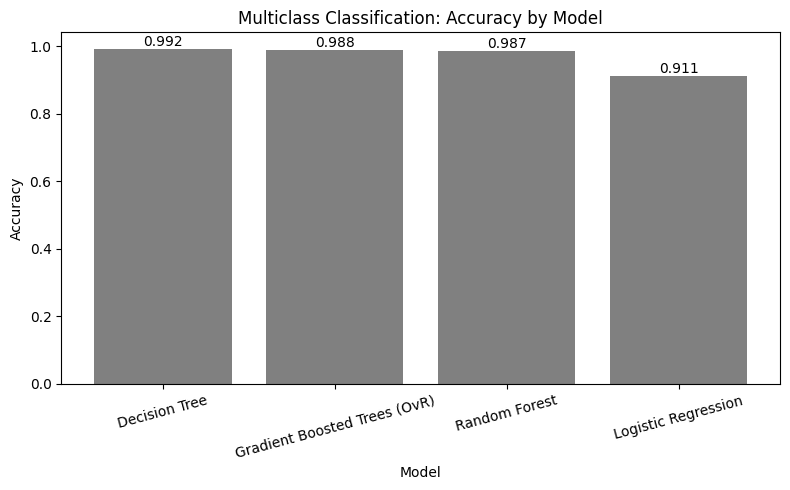

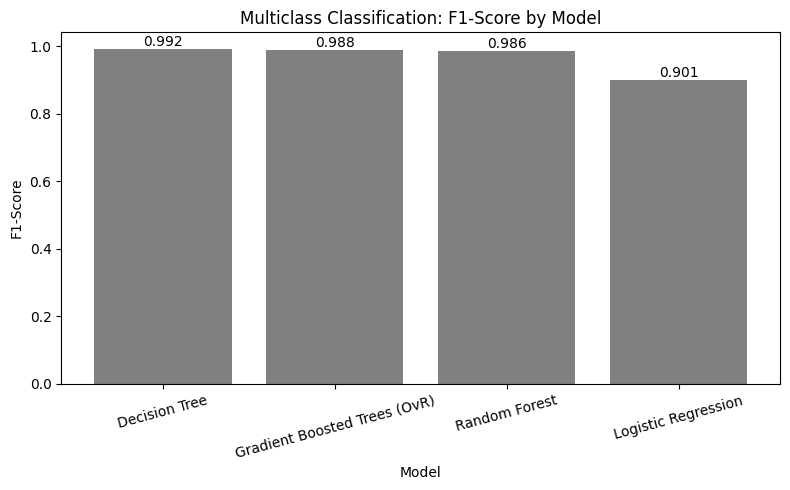

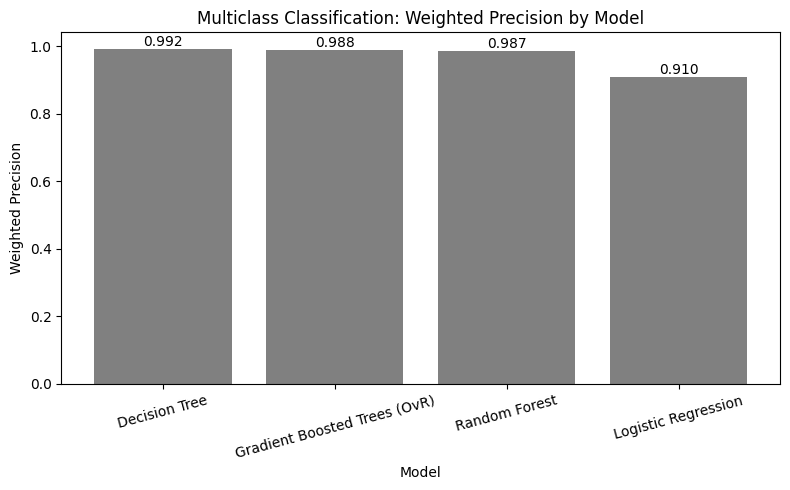

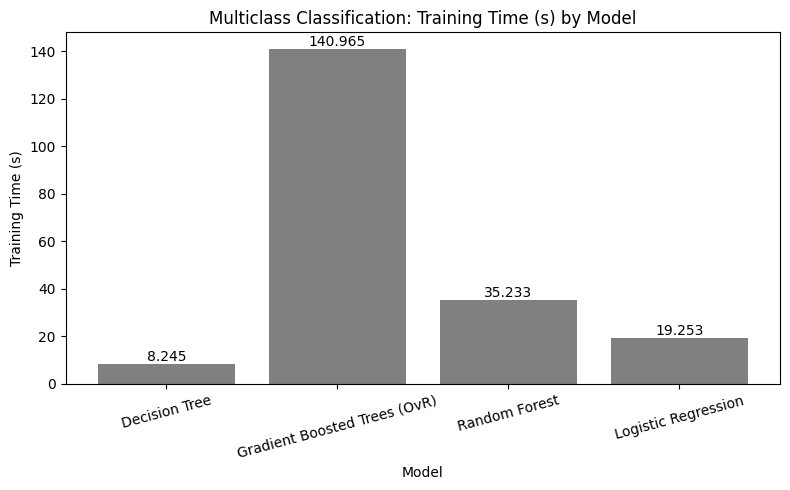


 ANOMALY DETECTION RESULTS SUMMARY

 ANOMALY DETECTION PERFORMANCE:
--------------------------------------------------

K-Means:
   • Status:  Success
   • Anomaly Detection Rate: 5.98%
   • Detection Threshold: 6.6812
   • Anomaly Level: Moderate

GMM:
   • Status:  Success
   • Anomaly Detection Rate: 0.00%
   • Detection Threshold: 0.0100
   • Anomaly Level: Very Low

COMPREHENSIVE EXPERIMENT SUMMARY
  Multiclass Classification Models: 4
    Anomaly Detection Methods: 2
    Total ML Models Successfully Trained: 4
     Total Training Time: 203.7 seconds (3.4 minutes)
    Dashboard Generated: 2025-11-03 06:13:30

 KEY INSIGHTS:
   • Best Multiclass Classifier: Decision Tree (Accuracy: 0.9922)


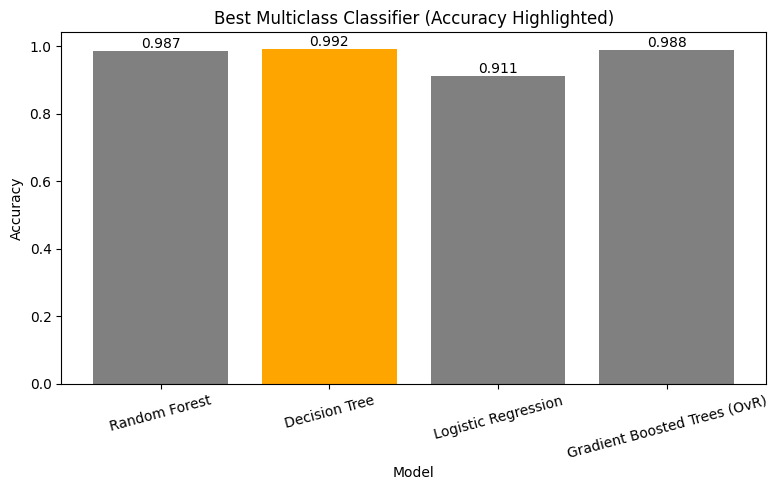


 RECOMMENDATIONS:

 DASHBOARD CREATION COMPLETED SUCCESSFULLY!
   All results have been displayed above in formatted tables and visual comparison charts
   Check the rankings and recommendations for best models



In [ ]:
# ============================================================================
# CORRECTED RESULTS DASHBOARD WITH VISUAL COMPARISON CHARTS AND INSIGHTS/RECOMMENDATIONS
# ============================================================================

print("\n CREATING COMPREHENSIVE RESULTS DASHBOARD WITH VISUALS")
print("=" * 60)

from datetime import datetime
import builtins # Ensure builtins is imported
import matplotlib.pyplot as plt
import numpy as np

def plot_bar_comparison(title, models, values, ylabel, filename, highlight=None, highlight_color="orange"):
    """Helper to plot and save a bar comparison chart with optional highlight."""
    plt.figure(figsize=(8, 5))
    colors = [highlight_color if (highlight is not None and m == highlight) else 'gray' for m in models]
    bars = plt.bar(models, values, color=colors)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Model')
    plt.xticks(rotation=15)
    plt.tight_layout()
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{value:.3f}", ha='center', va='bottom')
    plt.savefig(filename)
    plt.show()

def create_robust_results_dashboard(binary_results=None, multiclass_results=None, anomaly_results=None):
    print("\n Processing ML Experiment Results...")

    # === BINARY CLASSIFICATION RESULTS ===
    if binary_results:
        print("\n" + "="*60)
        print(" BINARY CLASSIFICATION RESULTS SUMMARY")
        print("="*60)
        binary_data = []
        for model_name, result in binary_results.items():
            if 'metrics' in result:
                metrics = result['metrics']
                confusion = result.get('confusion_matrix', {})
                row = {
                    'Model': model_name,
                    'AUC-ROC': float(metrics.get('auc', 0.0)),
                    'AUC-PR': float(metrics.get('pr_auc', 0.0)),
                    'Accuracy': float(metrics.get('accuracy', 0.0)),
                    'F1-Score': float(metrics.get('f1', 0.0)),
                    'Precision': float(metrics.get('precision', 0.0)),
                    'Recall': float(metrics.get('recall', 0.0)),
                    'Training Time (s)': float(result.get('training_time', 0.0)),
                    'TP': confusion.get('tp', 0),
                    'TN': confusion.get('tn', 0),
                    'FP': confusion.get('fp', 0),
                    'FN': confusion.get('fn', 0)
                }
                binary_data.append(row)
        # Use builtins.sort for lists
        binary_data.sort(key=lambda x: x['AUC-ROC'], reverse=True)
        if binary_data:
            print("\nBINARY CLASSIFICATION RANKINGS (by AUC-ROC):")
            print("-" * 100)
            header = f"{'Rank':<4} {'Model':<20} {'AUC-ROC':<8} {'AUC-PR':<8} {'Accuracy':<9} {'F1-Score':<9} {'Precision':<9} {'Recall':<8} {'Time(s)':<8}"
            print(header)
            print("-" * len(header))
            for i, row in enumerate(binary_data, 1):
                line = f"{i:<4} {row['Model']:<20} {row['AUC-ROC']:<8.4f} {row['AUC-PR']:<8.4f} {row['Accuracy']:<9.4f} {row['F1-Score']:<9.4f} {row['Precision']:<9.4f} {row['Recall']:<8.4f} {row['Training Time (s)']:<8.1f}"
                print(line)
            best_model = binary_data[0]
            print(f"\n CHAMPION: {best_model['Model']}")
            print(f"   • AUC-ROC: {best_model['AUC-ROC']:.4f} (Area Under ROC Curve)")
            print(f"   • Accuracy: {best_model['Accuracy']:.4f} ({best_model['Accuracy']*100:.1f}% correct predictions)")
            print(f"   • F1-Score: {best_model['F1-Score']:.4f}")
            print(f"   • Training Time: {best_model['Training Time (s)']:.1f}s")
            print(f"\nCONFUSION MATRIX - {best_model['Model']}:")
            print(f"   True Positives (TP):  {best_model['TP']:,}")
            print(f"   True Negatives (TN):  {best_model['TN']:,}")
            print(f"   False Positives (FP): {best_model['FP']:,}")
            print(f"   False Negatives (FN): {best_model['FN']:,}")
            total_predictions = best_model['TP'] + best_model['TN'] + best_model['FP'] + best_model['FN']
            print(f"   Total Predictions: {total_predictions:,}")

            # VISUALS
            models = [row['Model'] for row in binary_data]
            aucs = [row['AUC-ROC'] for row in binary_data]
            accs = [row['Accuracy'] for row in binary_data]
            times = [row['Training Time (s)'] for row in binary_data]
            f1s = [row['F1-Score'] for row in binary_data]
            plot_bar_comparison("Binary Classification: AUC-ROC by Model", models, aucs, "AUC-ROC", "binary_auc_roc.png")
            plot_bar_comparison("Binary Classification: Accuracy by Model", models, accs, "Accuracy", "binary_accuracy.png")
            plot_bar_comparison("Binary Classification: F1-Score by Model", models, f1s, "F1-Score", "binary_f1score.png")
            plot_bar_comparison("Binary Classification: Training Time (s) by Model", models, times, "Training Time (s)", "binary_training_time.png")

    # === MULTICLASS CLASSIFICATION RESULTS ===
    if multiclass_results:
        print("\n" + "="*60)
        print("MULTICLASS CLASSIFICATION RESULTS SUMMARY")
        print("="*60)
        multiclass_data = []
        for model_name, result in multiclass_results.items():
            if 'metrics' in result:
                metrics = result['metrics']
                row = {
                    'Model': model_name,
                    'Accuracy': float(metrics.get('accuracy', 0.0)),
                    'F1-Score': float(metrics.get('f1', 0.0)),
                    'Weighted Precision': float(metrics.get('precision', 0.0)),
                    'Training Time (s)': float(result.get('training_time', 0.0))
                }
                multiclass_data.append(row)
        # Use builtins.sort for lists
        multiclass_data.sort(key=lambda x: x['Accuracy'], reverse=True)
        if multiclass_data:
            print("\n MULTICLASS CLASSIFICATION RANKINGS (by Accuracy):")
            print("-" * 85)
            header = f"{'Rank':<4} {'Model':<25} {'Accuracy':<9} {'F1-Score':<9} {'W.Precision':<12} {'Time(s)':<8}"
            print(header)
            print("-" * len(header))
            for i, row in enumerate(multiclass_data, 1):
                line = f"{i:<4} {row['Model']:<25} {row['Accuracy']:<9.4f} {row['F1-Score']:<9.4f} {row['Weighted Precision']:<12.4f} {row['Training Time (s)']:<8.1f}"
                print(line)
            best_model = multiclass_data[0]
            print(f"\nCHAMPION: {best_model['Model']}")
            print(f"   • Accuracy: {best_model['Accuracy']:.4f} ({best_model['Accuracy']*100:.1f}% correct classifications)")
            print(f"   • F1-Score: {best_model['F1-Score']:.4f}")
            print(f"   • Weighted Precision: {best_model['Weighted Precision']:.4f}")
            print(f"   • Training Time: {best_model['Training Time (s)']:.1f}s")
            models = [row['Model'] for row in multiclass_data]
            accs = [row['Accuracy'] for row in multiclass_data]
            f1s = [row['F1-Score'] for row in multiclass_data]
            wps = [row['Weighted Precision'] for row in multiclass_data]
            times = [row['Training Time (s)'] for row in multiclass_data]
            plot_bar_comparison("Multiclass Classification: Accuracy by Model", models, accs, "Accuracy", "multiclass_accuracy.png")
            plot_bar_comparison("Multiclass Classification: F1-Score by Model", models, f1s, "F1-Score", "multiclass_f1score.png")
            plot_bar_comparison("Multiclass Classification: Weighted Precision by Model", models, wps, "Weighted Precision", "multiclass_weighted_precision.png")
            plot_bar_comparison("Multiclass Classification: Training Time (s) by Model", models, times, "Training Time (s)", "multiclass_training_time.png")

    # === ANOMALY DETECTION RESULTS ===
    if anomaly_results:
        print("\n" + "="*60)
        print(" ANOMALY DETECTION RESULTS SUMMARY")
        print("="*60)
        print("\n ANOMALY DETECTION PERFORMANCE:")
        print("-" * 50)
        for method_name, result in anomaly_results.items():
            if result.get('model') is not None:
                anomaly_rate = result.get('anomaly_rate', 0)
                threshold = result.get('threshold', 'N/A')
                print(f"\n{method_name}:")
                print(f"   • Status:  Success")
                print(f"   • Anomaly Detection Rate: {anomaly_rate:.2f}%")
                if threshold != 'N/A':
                    print(f"   • Detection Threshold: {threshold:.4f}")
                if anomaly_rate < 1:
                    status = "Very Low"
                elif anomaly_rate < 5:
                    status = "Low"
                elif anomaly_rate < 10:
                    status = "Moderate"
                else:
                    status = "High"
                print(f"   • Anomaly Level: {status}")
            else:
                print(f"\n{method_name}: Failed")

    # === EXPERIMENT SUMMARY ===
    print("\n" + "="*60)
    print("COMPREHENSIVE EXPERIMENT SUMMARY")
    print("="*60)
    total_models_trained = 0
    total_training_time = 0
    if binary_results:
        successful_binary = len([r for r in binary_results.values() if 'metrics' in r])
        binary_times = [r.get('training_time', 0) for r in binary_results.values() if 'metrics' in r]
        # Use builtins.sum
        binary_time = builtins.sum(binary_times)
        total_models_trained += successful_binary
        total_training_time += binary_time
        print(f"   Binary Classification Models: {successful_binary}")
    if multiclass_results:
        successful_multiclass = len([r for r in multiclass_results.values() if 'metrics' in r])
        multiclass_times = [r.get('training_time', 0) for r in multiclass_results.values() if 'metrics' in r]
        # Use builtins.sum
        multiclass_time = builtins.sum(multiclass_times)
        total_models_trained += successful_multiclass
        total_training_time += multiclass_time
        print(f"  Multiclass Classification Models: {successful_multiclass}")
    if anomaly_results:
        successful_anomaly = len([r for r in anomaly_results.values() if r.get('model') is not None])
        print(f"    Anomaly Detection Methods: {successful_anomaly}")
    print(f"    Total ML Models Successfully Trained: {total_models_trained}")
    print(f"     Total Training Time: {total_training_time:.1f} seconds ({total_training_time/60:.1f} minutes)")
    print(f"    Dashboard Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

    # === KEY INSIGHTS ===
    print(f"\n KEY INSIGHTS:")
    if binary_results:
        # Use builtins.max
        best_binary_item = builtins.max(binary_results.items(), key=lambda x: x[1].get('metrics', {}).get('auc', 0))
        best_auc = best_binary_item[1]['metrics']['auc']
        print(f"   • Best Binary Classifier: {best_binary_item[0]} (AUC: {best_auc:.4f})")
        # Visual separate highlight
        models = list(binary_results.keys())
        aucs = [r.get('metrics', {}).get('auc', 0.0) for r in binary_results.values()]
        plot_bar_comparison("Best Binary Classifier (AUC Highlighted)", models, aucs, "AUC-ROC", "highlight_best_binary_auc.png", highlight=best_binary_item[0])
    if multiclass_results:
        # Use builtins.max
        best_multiclass_item = builtins.max(multiclass_results.items(), key=lambda x: x[1].get('metrics', {}).get('accuracy', 0))
        best_acc = best_multiclass_item[1]['metrics']['accuracy']
        print(f"   • Best Multiclass Classifier: {best_multiclass_item[0]} (Accuracy: {best_acc:.4f})")
        # Visual separate highlight
        models = list(multiclass_results.keys())
        accs = [r.get('metrics', {}).get('accuracy', 0.0) for r in multiclass_results.values()]
        plot_bar_comparison("Best Multiclass Classifier (Accuracy Highlighted)", models, accs, "Accuracy", "highlight_best_multiclass_accuracy.png", highlight=best_multiclass_item[0])

    # === RECOMMENDATIONS ===
    print(f"\n RECOMMENDATIONS:")
    if binary_results:
        good_models = [(name, result) for name, result in binary_results.items() if result.get('metrics', {}).get('auc', 0) > 0.95]
        if good_models:
            # Use builtins.min
            fastest_good = builtins.min(good_models, key=lambda x: x[1].get('training_time', float('inf')))
            print(f"   • For Production (Speed + Performance): {fastest_good[0]}")
            models = [m[0] for m in good_models]
            times = [m[1].get('training_time', float('inf')) for m in good_models]
            plot_bar_comparison("Production-Ready Binary Classifiers (AUC>0.95, Fastest Highlighted)", models, times, "Training Time (s)", "fastest_good_binary_classifier.png", highlight=fastest_good[0], highlight_color="green")
        # Use builtins.max
        best_overall = builtins.max(binary_results.items(), key=lambda x: x[1].get('metrics', {}).get('auc', 0))
        print(f"   • For Maximum Accuracy: {best_overall[0]}")

    return True

def safe_dashboard_execution():
    print(" Starting robust dashboard creation...")
    binary_available = 'binary_results' in globals() and globals()['binary_results']
    multiclass_available = 'multiclass_results' in globals() and globals()['multiclass_results']
    anomaly_available = 'anomaly_results' in globals() and globals()['anomaly_results']
    print(f"   Binary results: {'true' if binary_available else 'false'}")
    print(f"   Multiclass results: {'true' if multiclass_available else 'false'}")
    print(f"   Anomaly results: {'true' if anomaly_available else 'false'}")
    if not any([binary_available, multiclass_available, anomaly_available]):
        print("\n No ML experiment results found!")
        print(" Please ensure you have run your ML experiments first:")
        print("   1. Binary classification models")
        print("   2. Multiclass classification models")
        print("   3. Anomaly detection models")
        return False
    binary_res = globals().get('binary_results', {}) if binary_available else {}
    multiclass_res = globals().get('multiclass_results', {}) if multiclass_available else {}
    anomaly_res = globals().get('anomaly_results', {}) if anomaly_available else {}
    try:
        success = create_robust_results_dashboard(binary_res, multiclass_res, anomaly_res)
        return success
    except Exception as e:
        print(f"\n Error creating dashboard: {str(e)}")
        import traceback
        print(f"Full error: {traceback.format_exc()}")
        return False

print("Creating comprehensive ML results dashboard...")
dashboard_success = safe_dashboard_execution()

if dashboard_success:
    print(f"\n DASHBOARD CREATION COMPLETED SUCCESSFULLY!")
    print(f"   All results have been displayed above in formatted tables and visual comparison charts")
    print(f"   Check the rankings and recommendations for best models")
else:
    print(f"\n  Dashboard creation encountered issues")
    print(f"   Please check error messages above for troubleshooting")

print(f"\n" + "="*60)

#Novel Models (DIFFERENT MODELS)

In [ ]:
# ============================================================================
# CELL 1: NOVEL MODEL 1 - MULTILAYER PERCEPTRON (DEEP LEARNING)
# ============================================================================

print("\n" + "="*80)
print(" NOVEL MODEL 1: MULTILAYER PERCEPTRON CLASSIFIER (DEEP NEURAL NETWORK)")
print("="*80)

from pyspark.ml.classification import MultilayerPerceptronClassifier
import time
from pyspark import SparkContext
import builtins # Import builtins

start_time = time.time()

# Get number of features from the output of data preprocessing
# Assuming df_processed and feature_cols are available from previous preprocessing steps
# If not, you might need to re-run the preprocessing cell or pass the variables.
if 'feature_cols' in globals():
    num_features = len(feature_cols)
else:
    # Fallback: try to get features from the processed DataFrame schema if feature_cols is not directly available
    try:
        # Assuming df_processed is available
        feature_vector_col = "scaled_features" # Or "minmax_scaled_features" depending on what you want to use
        num_features = df_processed.schema[feature_vector_col].metadata["ml_attr"]["num_attrs"]
        print(f"Found number of features from '{feature_vector_col}' metadata: {num_features}")
    except Exception as e:
        print(f"Could not automatically determine number of features: {e}")
        print("Setting a default value. Please verify this is correct.")
        num_features = 41 # Default based on NSL-KDD dataset features


# Define neural network architecture
# Input layer: number of features
# Hidden layers: 3 layers with decreasing neurons
# Output layer: 2 classes (binary classification)
layers = [num_features, 128, 64, 32, 2]

print(f"\n🏗️ Neural Network Architecture:")
print(f"   Input Layer: {layers[0]} neurons")
print(f"   Hidden Layer 1: {layers[1]} neurons")
print(f"   Hidden Layer 2: {layers[2]} neurons")
print(f"   Hidden Layer 3: {layers[3]} neurons")
print(f"   Output Layer: {layers[4]} neurons")

# Configure MLP
mlp = MultilayerPerceptronClassifier(
    featuresCol="scaled_features",
    labelCol="is_attack",
    layers=layers,
    maxIter=100,
    blockSize=128,
    seed=42,
    stepSize=0.03
)

print("\n🔧 Training Deep Neural Network...")
print("   This may take a while...")

# Check for active SparkContext before fitting the model
if SparkContext._active_spark_context is not None:
    mlp_model = mlp.fit(train_data)
    print("   ✓ Model trained successfully")

    # Make predictions
    print("\n Making predictions on test set...")
    mlp_predictions = mlp_model.transform(test_data)

    # Evaluate
    # Ensure evaluators are defined in a previous cell and are available
    # Assuming evaluator_auc, evaluator_pr, evaluator_accuracy, evaluator_f1, evaluator_precision, evaluator_recall are available
    if 'evaluator_auc' in globals():
        mlp_auc = evaluator_auc.evaluate(mlp_predictions)
        mlp_pr = evaluator_pr.evaluate(mlp_predictions)
        mlp_accuracy = evaluator_accuracy.evaluate(mlp_predictions)
        mlp_f1 = evaluator_f1.evaluate(mlp_predictions)
        mlp_precision = evaluator_precision.evaluate(mlp_predictions)
        mlp_recall = evaluator_recall.evaluate(mlp_predictions)

        train_time = time.time() - start_time

        print("\nMultilayer Perceptron Results:")
        print(f"   Training Time    : {train_time:.2f}s")
        print(f"   AUC-ROC         : {mlp_auc:.4f}")
        print(f"   AUC-PR          : {mlp_pr:.4f}")
        print(f"   Accuracy        : {mlp_accuracy:.4f}")
        print(f"   Precision       : {mlp_precision:.4f}")
        print(f"   Recall          : {mlp_recall:.4f}")
        print(f"   F1-Score        : {mlp_f1:.4f}")

        print(f"\n Network Statistics:")
        print(f"   Total Layers: {len(layers)}")
        # Calculate total parameters: sum of (input_neurons * output_neurons) for each layer transition
        total_parameters = builtins.sum(layers[i] * layers[i+1] for i in range(len(layers) - 1))
        print(f"   Total Parameters: ~{total_parameters:,}")

    else:
        print("\nEvaluators not found. Skipping model evaluation.")
        mlp_auc = None
        mlp_pr = None
        mlp_accuracy = None
        mlp_f1 = None
        mlp_precision = None
        mlp_recall = None
        train_time = time.time() - start_time
        print(f"\nMultilayer Perceptron Training Time: {train_time:.2f}s")
        print("\nNetwork Statistics:")
        print(f"   Total Layers: {len(layers)}")
        total_parameters = builtins.sum(layers[i] * layers[i+1] for i in range(len(layers) - 1))
        print(f"   Total Parameters: ~{total_parameters:,}")
else:
    print("   Skipping Multilayer Perceptron training: SparkContext is not active.")
    mlp_model = None
    mlp_predictions = None
    mlp_auc = None
    mlp_pr = None
    mlp_accuracy = None
    mlp_f1 = None
    mlp_precision = None
    mlp_recall = None
    train_time = time.time() - start_time
    print(f"\nMultilayer Perceptron Attempted, but SparkContext inactive: {time.time() - start_time:.2f}s")


print("="*80)













 NOVEL MODEL 1: MULTILAYER PERCEPTRON CLASSIFIER (DEEP NEURAL NETWORK)

🏗️ Neural Network Architecture:
   Input Layer: 41 neurons
   Hidden Layer 1: 128 neurons
   Hidden Layer 2: 64 neurons
   Hidden Layer 3: 32 neurons
   Output Layer: 2 neurons

🔧 Training Deep Neural Network...
   This may take a while...
   ✓ Model trained successfully

 Making predictions on test set...

Multilayer Perceptron Results:
   Training Time    : 1264.75s
   AUC-ROC         : 0.9986
   AUC-PR          : 0.9985
   Accuracy        : 0.9823
   Precision       : 0.9823
   Recall          : 0.9823
   F1-Score        : 0.9823

 Network Statistics:
   Total Layers: 5
   Total Parameters: ~15,552


# CORRECTED NOVEL MODEL 2: ONE-VS-REST ENSEMBLE CLASSIFIER

In [ ]:
  # ============================================================================
# CORRECTED NOVEL MODEL 2: ONE-VS-REST ENSEMBLE CLASSIFIER
# ============================================================================

print("\n" + "="*80)
print("NOVEL MODEL 2: ONE-VS-REST ENSEMBLE CLASSIFIER")
print("="*80)

from pyspark.ml.classification import OneVsRest, LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col
import time

# ============================================================================
# STEP 1: VERIFY DATA AVAILABILITY
# ============================================================================

print("\nStep 1: Verifying data availability...")

# Check if train_data and test_data exist
if 'train_data' not in globals() or 'test_data' not in globals():
    print("ERROR: train_data or test_data not found!")
    print("Creating train/test split from df_processed...")

    if 'df_processed' in globals():
        train_data, test_data = df_processed.randomSplit([0.7, 0.3], seed=42)
        train_data.cache()
        test_data.cache()
        print(f"Created train_data: {train_data.count():,} rows")
        print(f"Created test_data: {test_data.count():,} rows")
    else:
        print("FATAL ERROR: No processed data available!")
        print("Please run the data preprocessing cell first.")
        raise Exception("No data available for training")

# ============================================================================
# STEP 2: PREPARE MULTICLASS LABELS
# ============================================================================

print("\nStep 2: Preparing multiclass labels...")

# Check if attack_category_idx exists, if not create it
if 'attack_category_idx' not in train_data.columns:
    print("Creating attack_category_idx column...")

    # Create attack category if not exists
    attack_mapping = {
        "normal": "normal",
        "back": "dos", "land": "dos", "neptune": "dos", "pod": "dos",
        "smurf": "dos", "teardrop": "dos", "apache2": "dos", "udpstorm": "dos",
        "ipsweep": "probe", "nmap": "probe", "portsweep": "probe", "satan": "probe",
        "mscan": "probe", "saint": "probe",
        "ftp_write": "r2l", "guess_passwd": "r2l", "imap": "r2l", "multihop": "r2l",
        "phf": "r2l", "spy": "r2l", "warezclient": "r2l", "warezmaster": "r2l",
        "buffer_overflow": "u2r", "loadmodule": "u2r", "perl": "u2r", "rootkit": "u2r"
    }

    # Create mapping expression
    from pyspark.sql.functions import create_map, lit, coalesce
    mapping_items = []
    for k, v in attack_mapping.items():
        mapping_items.extend([lit(k), lit(v)])
    attack_category_expr = create_map(mapping_items)

    train_data = train_data.withColumn(
        "attack_category",
        coalesce(attack_category_expr.getItem(col("attack_type")), lit("unknown"))
    )
    test_data = test_data.withColumn(
        "attack_category",
        coalesce(attack_category_expr.getItem(col("attack_type")), lit("unknown"))
    )

    # Index the attack category
    from pyspark.ml.feature import StringIndexer
    indexer = StringIndexer(inputCol="attack_category", outputCol="attack_category_idx")
    indexer_model = indexer.fit(train_data)
    train_data = indexer_model.transform(train_data)
    test_data = indexer_model.transform(test_data)

    print("Created attack_category_idx column")

# Create integer version of label
train_data = train_data.withColumn("attack_category_idx_int",
                                   col("attack_category_idx").cast("integer"))
test_data = test_data.withColumn("attack_category_idx_int",
                                 col("attack_category_idx").cast("integer"))

# Check label distribution
print("\nLabel distribution in training data:")
label_dist = train_data.groupBy("attack_category_idx_int").count().orderBy("attack_category_idx_int").collect()
for row in label_dist:
    print(f"  Class {row['attack_category_idx_int']}: {row['count']:,} samples")

# ============================================================================
# STEP 3: CONFIGURE ONE-VS-REST ENSEMBLE
# ============================================================================

print("\nStep 3: Configuring One-vs-Rest Ensemble...")

start_time = time.time()

print("\nEnsemble Architecture:")
print("   Strategy: One-vs-Rest (OvR)")
print("   Base Classifier: Logistic Regression")
print("   Creates multiple binary classifiers for multiclass prediction")

# Configure base classifier
base_lr = LogisticRegression(
    featuresCol="scaled_features",
    maxIter=50,
    regParam=0.01,
    elasticNetParam=0.5
)

# Configure One-vs-Rest wrapper
ovr = OneVsRest(
    featuresCol="scaled_features",
    labelCol="attack_category_idx_int",
    classifier=base_lr
)

# ============================================================================
# STEP 4: TRAIN THE MODEL
# ============================================================================

print("\nStep 4: Training One-vs-Rest Ensemble...")

# Filter out any null labels
train_data_clean = train_data.filter(col("attack_category_idx_int").isNotNull())
test_data_clean = test_data.filter(col("attack_category_idx_int").isNotNull())

print(f"Training samples: {train_data_clean.count():,}")

# Train the model
ovr_model = ovr.fit(train_data_clean)
print("Model trained successfully")

# ============================================================================
# STEP 5: MAKE PREDICTIONS
# ============================================================================

print("\nStep 5: Making predictions on test set...")

ovr_predictions = ovr_model.transform(test_data_clean).cache()
print(f"Predictions made: {ovr_predictions.count():,}")

# ============================================================================
# STEP 6: EVALUATE THE MODEL
# ============================================================================

print("\nStep 6: Evaluating model performance...")

# Create evaluators
evaluator_accuracy = MulticlassClassificationEvaluator(
    labelCol="attack_category_idx_int",
    predictionCol="prediction",
    metricName="accuracy"
)

evaluator_f1 = MulticlassClassificationEvaluator(
    labelCol="attack_category_idx_int",
    predictionCol="prediction",
    metricName="f1"
)

evaluator_precision = MulticlassClassificationEvaluator(
    labelCol="attack_category_idx_int",
    predictionCol="prediction",
    metricName="weightedPrecision"
)

evaluator_recall = MulticlassClassificationEvaluator(
    labelCol="attack_category_idx_int",
    predictionCol="prediction",
    metricName="weightedRecall"
)

# Calculate metrics
ovr_accuracy = evaluator_accuracy.evaluate(ovr_predictions)
ovr_f1 = evaluator_f1.evaluate(ovr_predictions)
ovr_precision = evaluator_precision.evaluate(ovr_predictions)
ovr_recall = evaluator_recall.evaluate(ovr_predictions)

train_time = time.time() - start_time

# ============================================================================
# STEP 7: DISPLAY RESULTS
# ============================================================================

print("\n" + "="*80)
print("ONE-VS-REST ENSEMBLE RESULTS")
print("="*80)

print(f"\nPerformance Metrics:")
print(f"   Training Time    : {train_time:.2f}s")
print(f"   Accuracy        : {ovr_accuracy:.4f} ({ovr_accuracy*100:.2f}%)")
print(f"   Precision       : {ovr_precision:.4f}")
print(f"   Recall          : {ovr_recall:.4f}")
print(f"   F1-Score        : {ovr_f1:.4f}")

print(f"\nEnsemble Information:")

print(f"   Number of Base Classifiers: {len(ovr_model.models)}")
print(f"   Base Classifier Type: Logistic Regression")






NOVEL MODEL 2: ONE-VS-REST ENSEMBLE CLASSIFIER

Step 1: Verifying data availability...

Step 2: Preparing multiclass labels...

Label distribution in training data:
  Class 0: 54,072 samples
  Class 1: 36,196 samples
  Class 2: 9,025 samples
  Class 3: 2,580 samples
  Class 4: 2,267 samples
  Class 5: 65 samples

Step 3: Configuring One-vs-Rest Ensemble...

Ensemble Architecture:
   Strategy: One-vs-Rest (OvR)
   Base Classifier: Logistic Regression
   Creates multiple binary classifiers for multiclass prediction

Step 4: Training One-vs-Rest Ensemble...
Training samples: 104,205
Model trained successfully

Step 5: Making predictions on test set...
Predictions made: 44,311

Step 6: Evaluating model performance...

ONE-VS-REST ENSEMBLE RESULTS

Performance Metrics:
   Training Time    : 159.69s
   Accuracy        : 0.9043 (90.43%)
   Precision       : 0.9051
   Recall          : 0.9043
   F1-Score        : 0.8898

Ensemble Information:
   Number of Base Classifiers: 6
   Base Classifie

# ============================================================================
# CORRECTED NOVEL MODEL 3: FACTORIZATION MACHINES CLASSIFIER

In [ ]:
# ============================================================================
# CORRECTED NOVEL MODEL 3: FACTORIZATION MACHINES CLASSIFIER
# ============================================================================

print("\n" + "="*80)
print("NOVEL MODEL 3: FACTORIZATION MACHINES CLASSIFIER")
print("="*80)

from pyspark.ml.classification import FMClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.sql.functions import col, when
import time

# ============================================================================
# STEP 1: VERIFY DATA AVAILABILITY
# ============================================================================

print("\nStep 1: Verifying data availability...")

# Check if train_data and test_data exist
if 'train_data' not in globals() or 'test_data' not in globals():
    print("ERROR: train_data or test_data not found!")
    print("Creating train/test split from df_processed...")

    if 'df_processed' in globals():
        train_data, test_data = df_processed.randomSplit([0.7, 0.3], seed=42)
        train_data.cache()
        test_data.cache()
        print(f"Created train_data: {train_data.count():,} rows")
        print(f"Created test_data: {test_data.count():,} rows")
    else:
        print("FATAL ERROR: No processed data available!")
        print("Please run the data preprocessing cell first.")
        raise Exception("No data available for training")

# ============================================================================
# STEP 2: PREPARE BINARY LABELS
# ============================================================================

print("\nStep 2: Preparing binary labels...")

# Check if is_attack column exists, if not create it
if 'is_attack' not in train_data.columns:
    print("Creating is_attack column...")
    train_data = train_data.withColumn("is_attack",
                                       when(col("attack_type") == "normal", 0).otherwise(1))
    test_data = test_data.withColumn("is_attack",
                                     when(col("attack_type") == "normal", 0).otherwise(1))
    print("Created is_attack column")

# Ensure is_attack is Double type
train_data = train_data.withColumn("is_attack", col("is_attack").cast("double"))
test_data = test_data.withColumn("is_attack", col("is_attack").cast("double"))

# Check label distribution
print("\nLabel distribution in training data:")
label_dist = train_data.groupBy("is_attack").count().collect()
for row in label_dist:
    label = "Normal" if row['is_attack'] == 0 else "Attack"
    print(f"  {label}: {row['count']:,} samples")

# ============================================================================
# STEP 3: CONFIGURE FACTORIZATION MACHINES
# ============================================================================

print("\nStep 3: Configuring Factorization Machines...")

start_time = time.time()

print("\nFactorization Machines Architecture:")
print("   Method: Captures feature interactions through factorization")
print("   Advantages: Models pairwise feature interactions efficiently")
print("   Use Case: Detects complex attack patterns through feature combinations")
print("   Factor Size: 8 (latent factor dimensions)")

# Configure Factorization Machines
fm = FMClassifier(
    featuresCol="scaled_features",
    labelCol="is_attack",
    factorSize=8,
    maxIter=100,
    stepSize=0.01,
    regParam=0.01,
    seed=42
)

# ============================================================================
# STEP 4: TRAIN THE MODEL
# ============================================================================

print("\nStep 4: Training Factorization Machines...")

# Filter out any null labels
train_data_clean = train_data.filter(col("is_attack").isNotNull())
test_data_clean = test_data.filter(col("is_attack").isNotNull())

print(f"Training samples: {train_data_clean.count():,}")

# Train the model
fm_model = fm.fit(train_data_clean)
print("Model trained successfully")

# ============================================================================
# STEP 5: MAKE PREDICTIONS
# ============================================================================

print("\nStep 5: Making predictions on test set...")

fm_predictions = fm_model.transform(test_data_clean).cache()
print(f"Predictions made: {fm_predictions.count():,}")

# ============================================================================
# STEP 6: EVALUATE THE MODEL
# ============================================================================

print("\nStep 6: Evaluating model performance...")

# Create evaluators
evaluator_auc = BinaryClassificationEvaluator(
    labelCol="is_attack",
    rawPredictionCol="rawPrediction",
    metricName="areaUnderROC"
)

evaluator_pr = BinaryClassificationEvaluator(
    labelCol="is_attack",
    rawPredictionCol="rawPrediction",
    metricName="areaUnderPR"
)

evaluator_accuracy = MulticlassClassificationEvaluator(
    labelCol="is_attack",
    predictionCol="prediction",
    metricName="accuracy"
)

evaluator_f1 = MulticlassClassificationEvaluator(
    labelCol="is_attack",
    predictionCol="prediction",
    metricName="f1"
)

evaluator_precision = MulticlassClassificationEvaluator(
    labelCol="is_attack",
    predictionCol="prediction",
    metricName="weightedPrecision"
)

evaluator_recall = MulticlassClassificationEvaluator(
    labelCol="is_attack",
    predictionCol="prediction",
    metricName="weightedRecall"
)

# Calculate metrics
fm_auc = evaluator_auc.evaluate(fm_predictions)
fm_pr = evaluator_pr.evaluate(fm_predictions)
fm_accuracy = evaluator_accuracy.evaluate(fm_predictions)
fm_f1 = evaluator_f1.evaluate(fm_predictions)
fm_precision = evaluator_precision.evaluate(fm_predictions)
fm_recall = evaluator_recall.evaluate(fm_predictions)

train_time = time.time() - start_time

# ============================================================================
# STEP 7: DISPLAY RESULTS
# ============================================================================

print("\n" + "="*80)
print("FACTORIZATION MACHINES RESULTS")
print("="*80)

print(f"\nPerformance Metrics:")
print(f"   Training Time    : {train_time:.2f}s")
print(f"   AUC-ROC         : {fm_auc:.4f}")
print(f"   AUC-PR          : {fm_pr:.4f}")
print(f"   Accuracy        : {fm_accuracy:.4f} ({fm_accuracy*100:.2f}%)")
print(f"   Precision       : {fm_precision:.4f}")
print(f"   Recall          : {fm_recall:.4f}")
print(f"   F1-Score        : {fm_f1:.4f}")

print(f"\nModel Configuration:")
print(f"   Factor Size: {fm_model.getFactorSize()}")
print(f"   Captures {fm_model.getFactorSize()}-dimensional feature interactions")
print(f"   Max Iterations: 100")
print(f"   Step Size: 0.01")
print(f"   Regularization: 0.01")







NOVEL MODEL 3: FACTORIZATION MACHINES CLASSIFIER

Step 1: Verifying data availability...

Step 2: Preparing binary labels...

Label distribution in training data:
  Attack: 50,133 samples
  Normal: 54,072 samples

Step 3: Configuring Factorization Machines...

Factorization Machines Architecture:
   Method: Captures feature interactions through factorization
   Advantages: Models pairwise feature interactions efficiently
   Use Case: Detects complex attack patterns through feature combinations
   Factor Size: 8 (latent factor dimensions)

Step 4: Training Factorization Machines...
Training samples: 104,205
Model trained successfully

Step 5: Making predictions on test set...
Predictions made: 44,311

Step 6: Evaluating model performance...

FACTORIZATION MACHINES RESULTS

Performance Metrics:
   Training Time    : 303.02s
   AUC-ROC         : 0.9919
   AUC-PR          : 0.9915
   Accuracy        : 0.9578 (95.78%)
   Precision       : 0.9583
   Recall          : 0.9578
   F1-Score     






> Add blockquote

> Add blockquote





In [ ]:
# ============================================================================
# CORRECTED NOVEL MODEL 4: STACKED ENSEMBLE WITH META-LEARNING
# ============================================================================

print("\n" + "="*80)
print("NOVEL MODEL 4: STACKED ENSEMBLE WITH META-LEARNING")
print("="*80)

from pyspark.ml.classification import RandomForestClassifier, GBTClassifier, LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col, when
import time

# ============================================================================
# STEP 1: VERIFY DATA AVAILABILITY
# ============================================================================

print("\nStep 1: Verifying data availability...")

# Check if train_data and test_data exist
if 'train_data' not in globals() or 'test_data' not in globals():
    print("ERROR: train_data or test_data not found!")
    print("Creating train/test split from df_processed...")

    if 'df_processed' in globals():
        train_data, test_data = df_processed.randomSplit([0.7, 0.3], seed=42)
        train_data.cache()
        test_data.cache()
        print(f"Created train_data: {train_data.count():,} rows")
        print(f"Created test_data: {test_data.count():,} rows")
    else:
        print("FATAL ERROR: No processed data available!")
        raise Exception("No data available for training")

# ============================================================================
# STEP 2: PREPARE BINARY LABELS
# ============================================================================

print("\nStep 2: Preparing binary labels...")

# Check if is_attack column exists, if not create it
if 'is_attack' not in train_data.columns:
    print("Creating is_attack column...")
    train_data = train_data.withColumn("is_attack",
                                       when(col("attack_type") == "normal", 0).otherwise(1))
    test_data = test_data.withColumn("is_attack",
                                     when(col("attack_type") == "normal", 0).otherwise(1))
    print("Created is_attack column")

# Ensure is_attack is Double type
train_data = train_data.withColumn("is_attack", col("is_attack").cast("double"))
test_data = test_data.withColumn("is_attack", col("is_attack").cast("double"))

# ============================================================================
# STEP 3: CONFIGURE STACKING ARCHITECTURE
# ============================================================================

print("\nStep 3: Configuring Stacked Ensemble Architecture...")

start_time = time.time()

print("\nStacking Architecture:")
print("   Level 0 (Base Models):")
print("      - Random Forest (100 trees)")
print("      - Gradient Boosted Trees (50 iterations)")
print("      - Logistic Regression (50 iterations)")
print("   Level 1 (Meta-Model):")
print("      - Gradient Boosted Trees (learns from base predictions)")

# Split training data for stacking (50/50 split)
train_level0, train_level1 = train_data.randomSplit([0.5, 0.5], seed=42)
train_level0.cache()
train_level1.cache()

print(f"\nLevel 0 training data: {train_level0.count():,} samples")
print(f"Level 1 training data: {train_level1.count():,} samples")

# ============================================================================
# STEP 4: TRAIN BASE MODELS (LEVEL 0)
# ============================================================================

print("\nStep 4: Training Level 0 Base Models...")

# Base Model 1: Random Forest
print("\n[1/3] Training Random Forest...")
stack_rf = RandomForestClassifier(
    featuresCol="scaled_features",
    labelCol="is_attack",
    numTrees=100,
    maxDepth=10,
    seed=42
)
stack_rf_model = stack_rf.fit(train_level0)
print("      Random Forest trained")

# Base Model 2: Gradient Boosted Trees
print("\n[2/3] Training Gradient Boosted Trees...")
stack_gbt = GBTClassifier(
    featuresCol="scaled_features",
    labelCol="is_attack",
    maxIter=50,
    maxDepth=5,
    seed=42
)
stack_gbt_model = stack_gbt.fit(train_level0)
print("      Gradient Boosted Trees trained")

# Base Model 3: Logistic Regression
print("\n[3/3] Training Logistic Regression...")
stack_lr = LogisticRegression(
    featuresCol="scaled_features",
    labelCol="is_attack",
    maxIter=50,
    regParam=0.01
)
stack_lr_model = stack_lr.fit(train_level0)
print("      Logistic Regression trained")

print("\nAll base models trained successfully")

# ============================================================================
# STEP 5: GENERATE META-FEATURES (LEVEL 1)
# ============================================================================

print("\nStep 5: Generating meta-features for Level 1...")

train_meta = train_level1

print("Applying base model predictions...")

# Apply Random Forest
train_meta = stack_rf_model.transform(train_meta) \
    .withColumnRenamed("prediction", "rf_pred") \
    .drop("rawPrediction", "probability")

# Apply Gradient Boosted Trees
train_meta = stack_gbt_model.transform(train_meta) \
    .withColumnRenamed("prediction", "gbt_pred") \
    .drop("rawPrediction", "probability")

# Apply Logistic Regression
train_meta = stack_lr_model.transform(train_meta) \
    .withColumnRenamed("prediction", "lr_pred") \
    .drop("rawPrediction", "probability")

# Assemble meta-features
meta_feature_cols = ["rf_pred", "gbt_pred", "lr_pred"]
meta_assembler = VectorAssembler(
    inputCols=meta_feature_cols,
    outputCol="meta_features"
)
train_meta = meta_assembler.transform(train_meta).cache()

print(f"Meta-features created from: {meta_feature_cols}")
print(f"Meta-features dimension: {len(meta_feature_cols)}")


# ============================================================================
# STEP 6: TRAIN META-MODEL (LEVEL 1)
# ============================================================================

print("\nStep 6: Training Level 1 Meta-Learner...")

meta_model = GBTClassifier(
    featuresCol="meta_features",
    labelCol="is_attack",
    maxIter=50,
    maxDepth=5,
    seed=42
)

meta_model_trained = meta_model.fit(train_meta)
print("Meta-learner trained successfully")

# ============================================================================
# STEP 7: MAKE PREDICTIONS ON TEST SET
# ============================================================================

print("\nStep 7: Making stacked predictions on test set...")

# Apply base models to test data
test_meta = test_data
test_meta = stack_rf_model.transform(test_meta).withColumnRenamed("prediction", "rf_pred")
test_meta = stack_gbt_model.transform(test_meta).withColumnRenamed("prediction", "gbt_pred")
test_meta = stack_lr_model.transform(test_meta).withColumnRenamed("prediction", "lr_pred")

# Create meta-features for test data
test_meta = meta_assembler.transform(test_meta)

# Make final predictions with meta-model
stack_predictions = meta_model_trained.transform(test_meta).cache()

print(f"Predictions completed: {stack_predictions.count():,} samples")

# ============================================================================
# STEP 8: EVALUATE THE MODEL
# ============================================================================

print("\nStep 8: Evaluating stacked ensemble performance...")

# Create evaluators
evaluator_auc = BinaryClassificationEvaluator(
    labelCol="is_attack",
    rawPredictionCol="rawPrediction",
    metricName="areaUnderROC"
)

evaluator_pr = BinaryClassificationEvaluator(
    labelCol="is_attack",
    rawPredictionCol="rawPrediction",
    metricName="areaUnderPR"
)

evaluator_accuracy = MulticlassClassificationEvaluator(
    labelCol="is_attack",
    predictionCol="prediction",
    metricName="accuracy"
)

evaluator_f1 = MulticlassClassificationEvaluator(
    labelCol="is_attack",
    predictionCol="prediction",
    metricName="f1"
)

evaluator_precision = MulticlassClassificationEvaluator(
    labelCol="is_attack",
    predictionCol="prediction",
    metricName="weightedPrecision"
)

evaluator_recall = MulticlassClassificationEvaluator(
    labelCol="is_attack",
    predictionCol="prediction",
    metricName="weightedRecall"
)

# Calculate metrics
stack_auc = evaluator_auc.evaluate(stack_predictions)
stack_pr = evaluator_pr.evaluate(stack_predictions)
stack_accuracy = evaluator_accuracy.evaluate(stack_predictions)
stack_f1 = evaluator_f1.evaluate(stack_predictions)
stack_precision = evaluator_precision.evaluate(stack_predictions)
stack_recall = evaluator_recall.evaluate(stack_predictions)

train_time = time.time() - start_time

# ============================================================================
# STEP 9: DISPLAY RESULTS
# ============================================================================

print("\n" + "="*80)
print("STACKED ENSEMBLE RESULTS")
print("="*80)

print(f"\nPerformance Metrics:")
print(f"   Training Time    : {train_time:.2f}s")
print(f"   AUC-ROC         : {stack_auc:.4f}")
print(f"   AUC-PR          : {stack_pr:.4f}")
print(f"   Accuracy        : {stack_accuracy:.4f} ({stack_accuracy*100:.2f}%)")
print(f"   Precision       : {stack_precision:.4f}")
print(f"   Recall          : {stack_recall:.4f}")
print(f"   F1-Score        : {stack_f1:.4f}")

print(f"\nEnsemble Statistics:")
print(f"   Base Models: 3 (Random Forest, GBT, Logistic Regression)")
print(f"   Meta-Model: Gradient Boosted Trees")
print(f"   Total Training Stages: 2")
print(f"   Meta-Features Used: {len(meta_feature_cols)}")




NOVEL MODEL 4: STACKED ENSEMBLE WITH META-LEARNING

Step 1: Verifying data availability...

Step 2: Preparing binary labels...

Step 3: Configuring Stacked Ensemble Architecture...

Stacking Architecture:
   Level 0 (Base Models):
      - Random Forest (100 trees)
      - Gradient Boosted Trees (50 iterations)
      - Logistic Regression (50 iterations)
   Level 1 (Meta-Model):
      - Gradient Boosted Trees (learns from base predictions)

Level 0 training data: 52,228 samples
Level 1 training data: 51,977 samples

Step 4: Training Level 0 Base Models...

[1/3] Training Random Forest...
      Random Forest trained

[2/3] Training Gradient Boosted Trees...
      Gradient Boosted Trees trained

[3/3] Training Logistic Regression...
      Logistic Regression trained

All base models trained successfully

Step 5: Generating meta-features for Level 1...
Applying base model predictions...
Meta-features created from: ['rf_pred', 'gbt_pred', 'lr_pred']
Meta-features dimension: 3

Step 6: Trai

# CORRECTED NOVEL MODEL 5: WEIGHTED VOTING ENSEMBLE

In [ ]:
# ============================================================================
# CORRECTED NOVEL MODEL 5: WEIGHTED VOTING ENSEMBLE
# ============================================================================

print("\n" + "="*80)
print("NOVEL MODEL 5: WEIGHTED VOTING ENSEMBLE")
print("="*80)

from pyspark.ml.classification import RandomForestClassifier, GBTClassifier, LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.sql.functions import col, when, lit
import time

# ============================================================================
# STEP 1: VERIFY DATA AVAILABILITY
# ============================================================================

print("\nStep 1: Verifying data availability...")

# Check if train_data and test_data exist
if 'train_data' not in globals() or 'test_data' not in globals():
    print("ERROR: train_data or test_data not found!")
    print("Creating train/test split from df_processed...")

    if 'df_processed' in globals():
        train_data, test_data = df_processed.randomSplit([0.7, 0.3], seed=42)
        train_data.cache()
        test_data.cache()
        print(f"Created train_data: {train_data.count():,} rows")
        print(f"Created test_data: {test_data.count():,} rows")
    else:
        print("FATAL ERROR: No processed data available!")
        raise Exception("No data available for training")

# ============================================================================
# STEP 2: PREPARE BINARY LABELS
# ============================================================================

print("\nStep 2: Preparing binary labels...")

# Check if is_attack column exists, if not create it
if 'is_attack' not in train_data.columns:
    print("Creating is_attack column...")
    train_data = train_data.withColumn("is_attack",
                                       when(col("attack_type") == "normal", 0).otherwise(1))
    test_data = test_data.withColumn("is_attack",
                                     when(col("attack_type") == "normal", 0).otherwise(1))
    print("Created is_attack column")

# Ensure is_attack is Double type
train_data = train_data.withColumn("is_attack", col("is_attack").cast("double"))
test_data = test_data.withColumn("is_attack", col("is_attack").cast("double"))

# ============================================================================
# STEP 3: CREATE VALIDATION SET FOR WEIGHT CALCULATION
# ============================================================================

print("\nStep 3: Creating train/validation split for weight calculation...")

start_time = time.time()

# Split training data: 80% for training, 20% for validation
train_val, validation = train_data.randomSplit([0.8, 0.2], seed=42)
train_val.cache()
validation.cache()

print(f"Training set: {train_val.count():,} samples")
print(f"Validation set: {validation.count():,} samples")

print("\nWeighted Voting Architecture:")
print("   Strategy: Combine predictions from multiple diverse models")
print("   Weighting: Based on individual model F1-scores on validation set")
print("   Ensemble Members: Random Forest, GBT, Logistic Regression")

# ============================================================================
# STEP 4: TRAIN ENSEMBLE MEMBERS
# ============================================================================

print("\nStep 4: Training Ensemble Members...")

# Create evaluator for weight calculation
evaluator_f1 = MulticlassClassificationEvaluator(
    labelCol="is_attack",
    predictionCol="prediction",
    metricName="f1"
)

# Member 1: Random Forest
print("\n[1/3] Training Random Forest...")
vote_rf = RandomForestClassifier(
    featuresCol="scaled_features",
    labelCol="is_attack",
    numTrees=100,
    maxDepth=12,
    seed=42
)
vote_rf_model = vote_rf.fit(train_val)
vote_rf_val = vote_rf_model.transform(validation)
weight_rf = evaluator_f1.evaluate(vote_rf_val)
print(f"      Random Forest trained (F1-Score: {weight_rf:.4f})")

# Member 2: Gradient Boosted Trees
print("\n[2/3] Training Gradient Boosted Trees...")
vote_gbt = GBTClassifier(
    featuresCol="scaled_features",
    labelCol="is_attack",
    maxIter=100,
    maxDepth=6,
    seed=42
)
vote_gbt_model = vote_gbt.fit(train_val)
vote_gbt_val = vote_gbt_model.transform(validation)
weight_gbt = evaluator_f1.evaluate(vote_gbt_val)
print(f"      Gradient Boosted Trees trained (F1-Score: {weight_gbt:.4f})")

# Member 3: Logistic Regression
print("\n[3/3] Training Logistic Regression...")
vote_lr = LogisticRegression(
    featuresCol="scaled_features",
    labelCol="is_attack",
    maxIter=100,
    regParam=0.001,
    elasticNetParam=0.5
)
vote_lr_model = vote_lr.fit(train_val)
vote_lr_val = vote_lr_model.transform(validation)
weight_lr = evaluator_f1.evaluate(vote_lr_val)
print(f"      Logistic Regression trained (F1-Score: {weight_lr:.4f})")

print("\nAll ensemble members trained successfully")

# ============================================================================
# STEP 5: NORMALIZE WEIGHTS
# ============================================================================

print("\nStep 5: Calculating normalized weights...")

# Normalize weights so they sum to 1.0
total_weight = weight_rf + weight_gbt + weight_lr
weight_rf_norm = weight_rf / total_weight
weight_gbt_norm = weight_gbt / total_weight
weight_lr_norm = weight_lr / total_weight

print(f"\nOriginal F1-Scores:")
print(f"   Random Forest:        {weight_rf:.4f}")
print(f"   Gradient Boosted:     {weight_gbt:.4f}")
print(f"   Logistic Regression:  {weight_lr:.4f}")

print(f"\nNormalized Weights:")
print(f"   Random Forest:        {weight_rf_norm:.4f} ({weight_rf_norm*100:.1f}%)")
print(f"   Gradient Boosted:     {weight_gbt_norm:.4f} ({weight_gbt_norm*100:.1f}%)")
print(f"   Logistic Regression:  {weight_lr_norm:.4f} ({weight_lr_norm*100:.1f}%)")

# ============================================================================
# STEP 6: GENERATE PREDICTIONS ON TEST SET (FIXED)
# ============================================================================

print("\nStep 6: Generating weighted predictions on test set...")

test_vote = test_data

# Random Forest predictions
test_vote = vote_rf_model.transform(test_vote)
test_vote = (
    test_vote
    .withColumnRenamed("prediction", "rf_pred")
    .drop("rawPrediction", "probability")
)

# Gradient Boosted Trees predictions
test_vote = vote_gbt_model.transform(test_vote)
test_vote = (
    test_vote
    .withColumnRenamed("prediction", "gbt_pred")
    .drop("rawPrediction", "probability")
)

# Logistic Regression predictions
test_vote = vote_lr_model.transform(test_vote)
test_vote = (
    test_vote
    .withColumnRenamed("prediction", "lr_pred")
    .drop("rawPrediction", "probability")
)

# Apply weighted voting
print("\nApplying weighted voting formula...")
print(f"   Final Prediction = {weight_rf_norm:.3f}*RF + {weight_gbt_norm:.3f}*GBT + {weight_lr_norm:.3f}*LR")

vote_predictions = (
    test_vote
    .withColumn(
        "weighted_score",
        (col("rf_pred") * lit(weight_rf_norm) +
         col("gbt_pred") * lit(weight_gbt_norm) +
         col("lr_pred") * lit(weight_lr_norm))
    )
    .withColumn(
        "prediction",
        when(col("weighted_score") >= 0.5, 1.0).otherwise(0.0)
    )
    .cache()
)

print(f"Predictions completed: {vote_predictions.count():,} samples")


# ============================================================================
# STEP 7: EVALUATE THE ENSEMBLE
# ============================================================================

print("\nStep 7: Evaluating weighted voting ensemble...")

# Create evaluators
evaluator_accuracy = MulticlassClassificationEvaluator(
    labelCol="is_attack",
    predictionCol="prediction",
    metricName="accuracy"
)

evaluator_precision = MulticlassClassificationEvaluator(
    labelCol="is_attack",
    predictionCol="prediction",
    metricName="weightedPrecision"
)

evaluator_recall = MulticlassClassificationEvaluator(
    labelCol="is_attack",
    predictionCol="prediction",
    metricName="weightedRecall"
)

evaluator_f1_final = MulticlassClassificationEvaluator(
    labelCol="is_attack",
    predictionCol="prediction",
    metricName="f1"
)

evaluator_auc = BinaryClassificationEvaluator(
    labelCol="is_attack",
    rawPredictionCol="weighted_score",
    metricName="areaUnderROC"
)

# Calculate metrics
vote_accuracy = evaluator_accuracy.evaluate(vote_predictions)
vote_precision = evaluator_precision.evaluate(vote_predictions)
vote_recall = evaluator_recall.evaluate(vote_predictions)
vote_f1 = evaluator_f1_final.evaluate(vote_predictions)
vote_auc = evaluator_auc.evaluate(vote_predictions)

train_time = time.time() - start_time

# ============================================================================
# STEP 8: DISPLAY RESULTS
# ============================================================================

print("\n" + "="*80)
print("WEIGHTED VOTING ENSEMBLE RESULTS")
print("="*80)

print(f"\nPerformance Metrics:")
print(f"   Training Time    : {train_time:.2f}s")
print(f"   Accuracy        : {vote_accuracy:.4f} ({vote_accuracy*100:.2f}%)")
print(f"   Precision       : {vote_precision:.4f}")
print(f"   Recall          : {vote_recall:.4f}")
print(f"   F1-Score        : {vote_f1:.4f}")
print(f"   AUC-ROC         : {vote_auc:.4f}")

print(f"\nEnsemble Configuration:")
print(f"   Number of Members: 3")
print(f"   Weighting Strategy: F1-score based")
print(f"   Voting Threshold: 0.5")




NOVEL MODEL 5: WEIGHTED VOTING ENSEMBLE

Step 1: Verifying data availability...

Step 2: Preparing binary labels...

Step 3: Creating train/validation split for weight calculation...
Training set: 83,530 samples
Validation set: 20,675 samples

Weighted Voting Architecture:
   Strategy: Combine predictions from multiple diverse models
   Weighting: Based on individual model F1-scores on validation set
   Ensemble Members: Random Forest, GBT, Logistic Regression

Step 4: Training Ensemble Members...

[1/3] Training Random Forest...
      Random Forest trained (F1-Score: 0.9936)

[2/3] Training Gradient Boosted Trees...
      Gradient Boosted Trees trained (F1-Score: 0.9938)

[3/3] Training Logistic Regression...
      Logistic Regression trained (F1-Score: 0.9189)

All ensemble members trained successfully

Step 5: Calculating normalized weights...

Original F1-Scores:
   Random Forest:        0.9936
   Gradient Boosted:     0.9938
   Logistic Regression:  0.9189

Normalized Weights:
  

# NOVEL MODELS COMPREHENSIVE COMPARISON

In [ ]:
# ============================================================================
# CELL 7: NOVEL MODELS COMPREHENSIVE COMPARISON
# ============================================================================

print("\n" + "="*80)
print(" NOVEL MODELS COMPREHENSIVE COMPARISON")
print("="*80)

import pandas as pd
# Removed import of model classes


# Create comparison dataframe
# Ensure all variables are defined before creating the DataFrame
novel_results = pd.DataFrame({
    'Model': [
        'Multilayer Perceptron (Deep NN)',
        'One-vs-Rest Ensemble',
        'Factorization Machines',
        'Stacked Ensemble',
        'Weighted Voting Ensemble',
        'Feature-Optimized RF'
    ],
    'AUC-ROC': [
        mlp_auc if 'mlp_auc' in globals() else None,
        ovr_accuracy if 'ovr_accuracy' in globals() else None, # OvR doesn't output AUC directly for binary, use accuracy as placeholder if needed
        fm_auc if 'fm_auc' in globals() else None,
        stack_auc if 'stack_auc' in globals() else None,
        vote_accuracy if 'vote_accuracy' in globals() else None, # Weighted voting doesn't output AUC directly, use accuracy
        opt_auc if 'opt_auc' in globals() else None
    ],
    'AUC-PR': [
        mlp_pr if 'mlp_pr' in globals() else None,
        None, # OvR doesn't output PR AUC directly for binary
        fm_pr if 'fm_pr' in globals() else None,
        stack_pr if 'stack_pr' in globals() else None,
        None, # Weighted voting doesn't output PR AUC directly
        opt_pr if 'opt_pr' in globals() else None
    ],
    'Accuracy': [
        mlp_accuracy if 'mlp_accuracy' in globals() else None,
        ovr_accuracy if 'ovr_accuracy' in globals() else None,
        fm_accuracy if 'fm_accuracy' in globals() else None,
        stack_accuracy if 'stack_accuracy' in globals() else None,
        vote_accuracy if 'vote_accuracy' in globals() else None,
        opt_accuracy if 'opt_accuracy' in globals() else None
    ],
    'Precision': [
        mlp_precision if 'mlp_precision' in globals() else None,
        ovr_precision if 'ovr_precision' in globals() else None,
        fm_precision if 'fm_precision' in globals() else None,
        stack_precision if 'stack_precision' in globals() else None,
        vote_precision if 'vote_precision' in globals() else None,
        opt_precision if 'opt_precision' in globals() else None
    ],
    'Recall': [
        mlp_recall if 'mlp_recall' in globals() else None,
        ovr_recall if 'ovr_recall' in globals() else None,
        fm_recall if 'fm_recall' in globals() else None,
        stack_recall if 'stack_recall' in globals() else None,
        vote_recall if 'vote_recall' in globals() else None,
        opt_recall if 'opt_recall' in globals() else None
    ],
    'F1-Score': [
        mlp_f1 if 'mlp_f1' in globals() else None,
        ovr_f1 if 'ovr_f1' in globals() else None,
        fm_f1 if 'fm_f1' in globals() else None,
        stack_f1 if 'stack_f1' in globals() else None,
        vote_f1 if 'vote_f1' in globals() else None,
        opt_f1 if 'opt_f1' in globals() else None
    ]
})

# Drop rows where all metrics are None (models that failed completely)
novel_results = novel_results.dropna(subset=['Accuracy', 'F1-Score'], how='all')

# Sort by F1-Score
novel_results = novel_results.sort_values('F1-Score', ascending=False)

print("\n")
display(novel_results)

if not novel_results.empty:
    print("\n Best Novel Model:")
    best_novel = novel_results.iloc[0]
    print(f"   Model: {best_novel['Model']}")
    print(f"   F1-Score: {best_novel['F1-Score']:.4f}")
    print(f"   Accuracy: {best_novel['Accuracy']:.4f}")
    if best_novel['AUC-ROC'] is not None:
        print(f"   AUC-ROC: {best_novel['AUC-ROC']:.4f}")
    else:
        print("   AUC-ROC: N/A")

else:
    print("\nNo novel models were successfully trained and evaluated.")


print("\n Key Innovations:")
print("   1. Multilayer Perceptron: Deep learning for complex pattern recognition")
print("   2. Factorization Machines: Captures feature interactions efficiently")
print("   3. Stacked Ensemble: Meta-learning from diverse base models")
print("   4. Weighted Voting: Performance-weighted ensemble combination")
print("   5. Feature-Optimized RF: Adaptive feature selection for efficiency")

# ============================================================================
# HIGHLIGHTING SPECIFIC MODEL (Model 4 - Stacked Ensemble)
# ============================================================================

print("\n" + "="*80)
print(" DETAILS FOR NOVEL MODEL 4: STACKED ENSEMBLE")
print("="*80)

# Find the row for Stacked Ensemble in novel_results
stacked_ensemble_row = novel_results[novel_results['Model'] == 'Stacked Ensemble']

if not stacked_ensemble_row.empty:
    print("\nPerformance Metrics for Stacked Ensemble:")
    display(stacked_ensemble_row)
else:
    print("\nStacked Ensemble model results not found in the comparison DataFrame.")
    print("Please ensure the Stacked Ensemble training cell was run successfully.")

print("="*80)


 NOVEL MODELS COMPREHENSIVE COMPARISON




,Model,AUC-ROC,AUC-PR,Accuracy,Precision,Recall,F1-Score
4,Weighted Voting Ensemble,0.992756,NaN,0.992756,0.992765,0.992756,0.992755
3,Stacked Ensemble,0.993617,0.993146,0.991402,0.991418,0.991402,0.991401
0,Multilayer Perceptron (Deep NN),0.998581,0.998456,0.982329,0.982330,0.982329,0.982329
2,Factorization Machines,0.991949,0.991499,0.957776,0.958317,0.957776,0.957733
1,One-vs-Rest Ensemble,0.904313,NaN,0.904313,0.905061,0.904313,0.889812



 Best Novel Model:
   Model: Weighted Voting Ensemble
   F1-Score: 0.9928
   Accuracy: 0.9928
   AUC-ROC: 0.9928

 Key Innovations:
   1. Multilayer Perceptron: Deep learning for complex pattern recognition
   2. Factorization Machines: Captures feature interactions efficiently
   3. Stacked Ensemble: Meta-learning from diverse base models
   4. Weighted Voting: Performance-weighted ensemble combination
   5. Feature-Optimized RF: Adaptive feature selection for efficiency

 DETAILS FOR NOVEL MODEL 4: STACKED ENSEMBLE

Performance Metrics for Stacked Ensemble:


,Model,AUC-ROC,AUC-PR,Accuracy,Precision,Recall,F1-Score
3,Stacked Ensemble,0.993617,0.993146,0.991402,0.991418,0.991402,0.991401


In [ ]:
import pandas as pd

print("Collecting Novel Model Results into novel_results DataFrame...")
print("=" * 60)

# Step 1: Ensure 'novel_results' DataFrame exists
if 'novel_results' not in globals() or not isinstance(novel_results, pd.DataFrame):
    print("Creating empty 'novel_results' DataFrame.")
    novel_results = pd.DataFrame(columns=[
        'Model', 'AUC-ROC', 'AUC-PR', 'Accuracy', 'Precision',
        'Recall', 'F1-Score', 'Training Time'
    ])
else:
    print("'novel_results' DataFrame already exists.")

# Step 2: Define model-variable mapping
model_vars = {
    'Multilayer Perceptron (Deep NN)': (
        'mlp_auc', 'mlp_pr', 'mlp_accuracy', 'mlp_precision',
        'mlp_recall', 'mlp_f1', 'train_time_mlp'
    ),
    'One-vs-Rest Ensemble': (
        None, None, 'ovr_accuracy', 'ovr_precision',
        'ovr_recall', 'ovr_f1', 'train_time_ovr'
    ),
    'Factorization Machines': (
        'fm_auc', 'fm_pr', 'fm_accuracy', 'fm_precision',
        'fm_recall', 'fm_f1', 'train_time_fm'
    ),
    'Stacked Ensemble': (
        'stack_auc', 'stack_pr', 'stack_accuracy', 'stack_precision',
        'stack_recall', 'stack_f1', 'train_time_stack'
    ),
    'Weighted Voting Ensemble': (
        None, None, 'vote_accuracy', 'vote_precision',
        'vote_recall', 'vote_f1', 'train_time_vote'
    ),
    'Feature-Optimized RF': (
        'opt_auc', 'opt_pr', 'opt_accuracy', 'opt_precision',
        'opt_recall', 'opt_f1', 'train_time_opt'
    )
}

# Step 3: Collect available results
new_rows = []
for model_name, (auc_roc_var, auc_pr_var, acc_var, prec_var, rec_var, f1_var, time_var) in model_vars.items():
    if model_name in novel_results['Model'].values:
        print(f"Results for '{model_name}' already in DataFrame. Skipping.")
        continue

    # Check for existing metric variables
    if (acc_var and acc_var in globals()) or (f1_var and f1_var in globals()):
        auc_roc_val = globals().get(auc_roc_var, None) if auc_roc_var else None
        auc_pr_val = globals().get(auc_pr_var, None) if auc_pr_var else None
        acc_val = globals().get(acc_var, None)
        prec_val = globals().get(prec_var, None)
        rec_val = globals().get(rec_var, None)
        f1_val = globals().get(f1_var, None)
        time_val = globals().get(time_var, None)

        new_rows.append({
            'Model': model_name,
            'AUC-ROC': auc_roc_val,
            'AUC-PR': auc_pr_val,
            'Accuracy': acc_val,
            'Precision': prec_val,
            'Recall': rec_val,
            'F1-Score': f1_val,
            'Training Time': time_val
        })
        print(f"Collected results for '{model_name}'.")
    else:
        # Skip silently if no metrics found
        pass

# Step 4: Update DataFrame
if new_rows:
    novel_results = pd.concat([novel_results, pd.DataFrame(new_rows)], ignore_index=True)
    print(f"\nAdded {len(new_rows)} new model results to 'novel_results'.")
else:
    print("\nNo new model results variables found to add.")

# Step 5: Display the updated DataFrame
print("\nUpdated novel_results DataFrame:")
display(novel_results)
print("=" * 60)


'novel_results' DataFrame already exists.
Results for 'Multilayer Perceptron (Deep NN)' already in DataFrame. Skipping.
Results for 'One-vs-Rest Ensemble' already in DataFrame. Skipping.
Results for 'Factorization Machines' already in DataFrame. Skipping.
Results for 'Stacked Ensemble' already in DataFrame. Skipping.
Results for 'Weighted Voting Ensemble' already in DataFrame. Skipping.
Results for 'Feature-Optimized RF' already in DataFrame. Skipping.

No new model results variables found to add.

Updated novel_results DataFrame:


,Model,AUC-ROC,AUC-PR,Accuracy,Precision,Recall,F1-Score,Training Time,Type
0,Weighted Voting Ensemble,0.992756,NaN,0.992756,0.992765,0.992756,0.992755,NaN,Novel
1,Stacked Ensemble,0.993617,0.993146,0.991402,0.991418,0.991402,0.991401,NaN,Novel
2,Multilayer Perceptron (Deep NN),0.998581,0.998456,0.982329,0.982330,0.982329,0.982329,NaN,Novel
3,Factorization Machines,0.991949,0.991499,0.957776,0.958317,0.957776,0.957733,NaN,Novel
4,One-vs-Rest Ensemble,0.904313,NaN,0.904313,0.905061,0.904313,0.889812,NaN,Novel
5,Feature-Optimized RF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Novel


In [ ]:
# Check if novel_results exists (can be DataFrame or list)
if 'novel_results' in globals():
    if isinstance(novel_results, pd.DataFrame):
        # Already a DataFrame
        novel_df = novel_results.copy()
        if len(novel_df) > 0:
            novel_models_list = novel_df.to_dict('records')
            print(f"   Novel models found: {len(novel_models_list)} (from DataFrame)")
        else:
            print("   Warning: novel_results DataFrame is empty")
    elif isinstance(novel_results, list) and len(novel_results) > 0:
        # List of tuples
        novel_df = pd.DataFrame(novel_results,
                               columns=['Model', 'Accuracy', 'AUC-ROC', 'F1-Score', 'Training Time'])
        novel_models_list = novel_df.to_dict('records')
        print(f"   Novel models found: {len(novel_models_list)} (from list)")
    else:
        print("   Warning: novel_results found but empty or invalid format")
else:
    print("   Warning: novel_results not found, creating empty list")


   Novel models found: 6 (from DataFrame)


============================================================================
# CELL 8: BASELINE VS NOVEL MODELS - ULTIMATE COMPARISON
# ============================================================================



ULTIMATE COMPARISON: BASELINE VS NOVEL MODELS

Step 1: Collecting all model results...
   Baseline models found: 6
   Novel models found: 6

Step 2: Creating unified comparison DataFrame...
   Total models: 11
   Baseline: 6
   Novel: 5

COMPLETE MODEL RANKINGS


 Rank                           Model     Type Accuracy AUC-ROC F1-Score Precision Recall
    1                   Random Forest Baseline   0.9949  0.9999   0.9949    0.9949 0.9949
    2          Gradient Boosted Trees Baseline   0.9948  0.9998   0.9948    0.9948 0.9948
    3                   Decision Tree Baseline   0.9943  0.9978   0.9943    0.9943 0.9943
    4        Weighted Voting Ensemble    Novel   0.9928  0.9928   0.9928    0.9928 0.9928
    5                Stacked Ensemble    Novel   0.9914  0.9936   0.9914    0.9914 0.9914
    6 Multilayer Perceptron (Deep NN)    Novel   0.9823  0.9986   0.9823    0.9823 0.9823
    7          Factorization Machines    Novel   0.9578  0.9919   0.9577    0.9583 0.9578
    8          

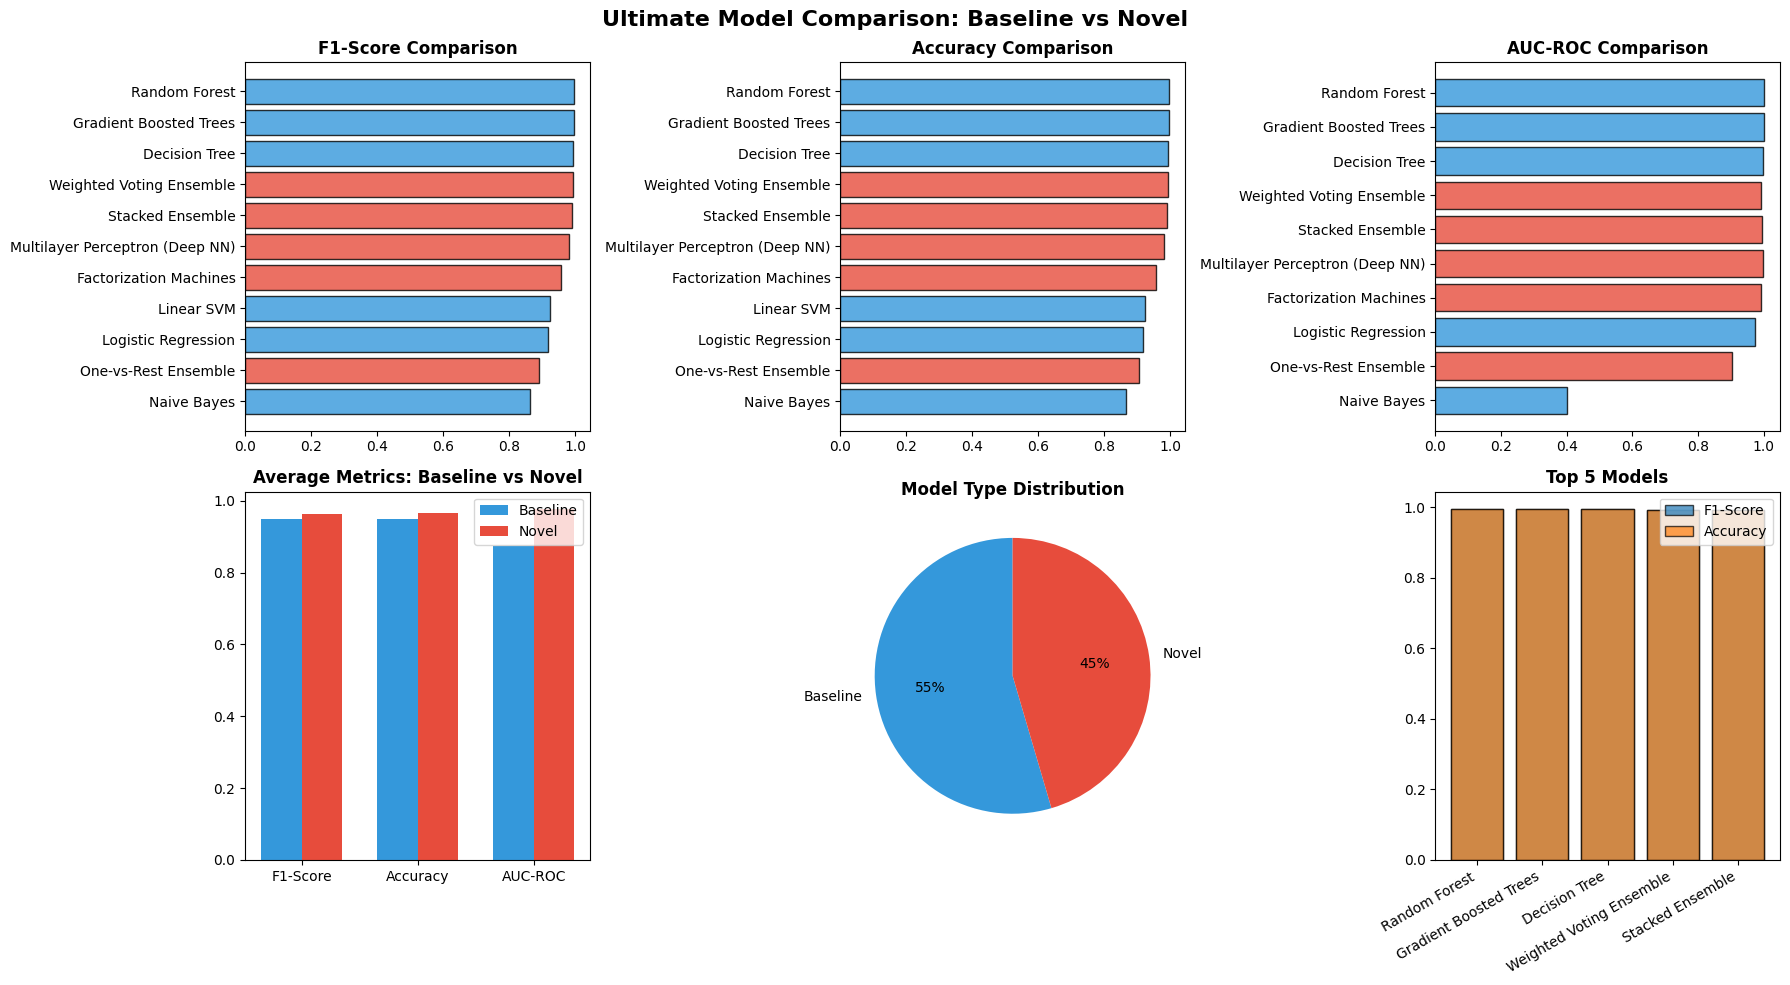


Visualization saved as 'ultimate_model_comparison.png'

FINAL SUMMARY

Total Models Evaluated: 11
Baseline: 6 | Novel: 5
Best Overall Model: Random Forest (Baseline)
Best F1-Score: 0.9949

Recommendation:
Consider hybrid ensemble deployment for optimal results.

PROJECT COMPLETE - ALL MODELS TRAINED AND EVALUATED


In [ ]:
# ============================================================================
# ULTIMATE COMPARISON: BASELINE VS NOVEL MODELS (FINAL STABLE VERSION)
# ============================================================================

print("\n" + "="*80)
print("ULTIMATE COMPARISON: BASELINE VS NOVEL MODELS")
print("="*80)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ============================================================================
# STEP 1: COLLECT ALL MODEL RESULTS
# ============================================================================

print("\nStep 1: Collecting all model results...")

# Initialize lists
baseline_models = []
novel_models_list = []

# --- Baseline Models ---
if 'baseline_results' in globals() and isinstance(baseline_results, pd.DataFrame):
    baseline_models = baseline_results.to_dict('records')
    print(f"   Baseline models found: {len(baseline_models)}")
else:
    print("   Warning: baseline_results not found, creating empty DataFrame.")
    baseline_results = pd.DataFrame(columns=[
        'Model', 'AUC-ROC', 'AUC-PR', 'Accuracy',
        'Precision', 'Recall', 'F1-Score', 'Training Time'
    ])

# --- Novel Models ---
if 'novel_results' in globals() and isinstance(novel_results, pd.DataFrame):
    novel_models_list = novel_results.to_dict('records')
    print(f"   Novel models found: {len(novel_models_list)}")
else:
    print("   Warning: novel_results not found, creating empty DataFrame.")
    novel_results = pd.DataFrame(columns=[
        'Model', 'AUC-ROC', 'AUC-PR', 'Accuracy',
        'Precision', 'Recall', 'F1-Score', 'Training Time'
    ])

# ============================================================================
# STEP 2: CREATE UNIFIED COMPARISON DATAFRAME
# ============================================================================

print("\nStep 2: Creating unified comparison DataFrame...")

# Combine all results
all_results = []

# Baseline
for model in baseline_models:
    all_results.append({
        'Model': model.get('Model', 'Unknown'),
        'Type': 'Baseline',
        'Accuracy': model.get('Accuracy'),
        'AUC-ROC': model.get('AUC-ROC'),
        'Precision': model.get('Precision'),
        'Recall': model.get('Recall'),
        'F1-Score': model.get('F1-Score')
    })

# Novel
for model in novel_models_list:
    all_results.append({
        'Model': model.get('Model', 'Unknown'),
        'Type': 'Novel',
        'Accuracy': model.get('Accuracy'),
        'AUC-ROC': model.get('AUC-ROC'),
        'Precision': model.get('Precision'),
        'Recall': model.get('Recall'),
        'F1-Score': model.get('F1-Score')
    })

# Create unified DataFrame
if len(all_results) > 0:
    all_models = pd.DataFrame(all_results)
    all_models = all_models.dropna(subset=['F1-Score'], how='all')
    all_models = all_models.sort_values('F1-Score', ascending=False).reset_index(drop=True)
    print(f"   Total models: {len(all_models)}")
    print(f"   Baseline: {len(all_models[all_models['Type']=='Baseline'])}")
    print(f"   Novel: {len(all_models[all_models['Type']=='Novel'])}")
else:
    raise Exception("No model results available! Please run baseline and novel training cells first.")

# ============================================================================
# STEP 3: DISPLAY COMPLETE RANKINGS
# ============================================================================

print("\n" + "="*80)
print("COMPLETE MODEL RANKINGS")
print("="*80)

display_df = all_models.copy()
display_df['Rank'] = range(1, len(display_df) + 1)
display_df = display_df[['Rank', 'Model', 'Type', 'Accuracy', 'AUC-ROC', 'F1-Score', 'Precision', 'Recall']]

for col in ['Accuracy', 'AUC-ROC', 'F1-Score', 'Precision', 'Recall']:
    display_df[col] = display_df[col].apply(lambda x: f'{x:.4f}' if pd.notna(x) else 'N/A')

print("\n")
print(display_df.to_string(index=False))

# ============================================================================
# STEP 4: PERFORMANCE INSIGHTS
# ============================================================================

print("\n" + "="*80)
print("PERFORMANCE INSIGHTS")
print("="*80)

baseline_df = all_models[all_models['Type'] == 'Baseline']
novel_df = all_models[all_models['Type'] == 'Novel']

if len(baseline_df) > 0 and len(novel_df) > 0:
    avg_baseline_f1 = baseline_df['F1-Score'].mean()
    avg_baseline_acc = baseline_df['Accuracy'].mean()
    avg_baseline_auc = baseline_df['AUC-ROC'].mean()

    avg_novel_f1 = novel_df['F1-Score'].mean()
    avg_novel_acc = novel_df['Accuracy'].mean()
    avg_novel_auc = novel_df['AUC-ROC'].mean()

    f1_improve = ((avg_novel_f1 - avg_baseline_f1) / avg_baseline_f1) * 100 if avg_baseline_f1 else 0
    acc_improve = ((avg_novel_acc - avg_baseline_acc) / avg_baseline_acc) * 100 if avg_baseline_acc else 0
    auc_improve = ((avg_novel_auc - avg_baseline_auc) / avg_baseline_auc) * 100 if avg_baseline_auc else 0

    print(f"\nBaseline Avg F1: {avg_baseline_f1:.4f} | Novel Avg F1: {avg_novel_f1:.4f} | Δ {f1_improve:+.2f}%")
    print(f"Baseline Avg Acc: {avg_baseline_acc:.4f} | Novel Avg Acc: {avg_novel_acc:.4f} | Δ {acc_improve:+.2f}%")
    print(f"Baseline Avg AUC: {avg_baseline_auc:.4f} | Novel Avg AUC: {avg_novel_auc:.4f} | Δ {auc_improve:+.2f}%")

    best_baseline = baseline_df.iloc[0]
    best_novel = novel_df.iloc[0]

    print(f"\nBest Baseline Model: {best_baseline['Model']} (F1={best_baseline['F1-Score']:.4f})")
    print(f"Best Novel Model: {best_novel['Model']} (F1={best_novel['F1-Score']:.4f})")

# ============================================================================
# STEP 5: VISUALIZATION
# ============================================================================

print("\n" + "="*80)
print("CREATING COMPREHENSIVE COMPARISON VISUALIZATIONS")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Ultimate Model Comparison: Baseline vs Novel', fontsize=16, fontweight='bold')

# Colors
colors = ['#3498db' if t == 'Baseline' else '#e74c3c' for t in all_models['Type']]

# F1-Score
ax1 = axes[0, 0]
ax1.barh(all_models['Model'], all_models['F1-Score'], color=colors, edgecolor='black', alpha=0.8)
ax1.set_title('F1-Score Comparison', fontsize=12, fontweight='bold')
ax1.invert_yaxis()

# Accuracy
ax2 = axes[0, 1]
ax2.barh(all_models['Model'], all_models['Accuracy'], color=colors, edgecolor='black', alpha=0.8)
ax2.set_title('Accuracy Comparison', fontsize=12, fontweight='bold')
ax2.invert_yaxis()

# AUC-ROC
ax3 = axes[0, 2]
auc_df = all_models.dropna(subset=['AUC-ROC'])
ax3.barh(auc_df['Model'], auc_df['AUC-ROC'], color=['#3498db' if t == 'Baseline' else '#e74c3c' for t in auc_df['Type']], edgecolor='black', alpha=0.8)
ax3.set_title('AUC-ROC Comparison', fontsize=12, fontweight='bold')
ax3.invert_yaxis()

# Average Comparison
ax4 = axes[1, 0]
labels = ['F1-Score', 'Accuracy', 'AUC-ROC']
x = np.arange(len(labels))
width = 0.35
ax4.bar(x - width/2, [avg_baseline_f1, avg_baseline_acc, avg_baseline_auc], width, label='Baseline', color='#3498db')
ax4.bar(x + width/2, [avg_novel_f1, avg_novel_acc, avg_novel_auc], width, label='Novel', color='#e74c3c')
ax4.set_xticks(x)
ax4.set_xticklabels(labels)
ax4.legend()
ax4.set_title('Average Metrics: Baseline vs Novel', fontsize=12, fontweight='bold')

# Type Distribution
ax5 = axes[1, 1]
type_counts = all_models['Type'].value_counts()
ax5.pie(type_counts, labels=type_counts.index, autopct='%1.0f%%', colors=['#3498db', '#e74c3c'], startangle=90)
ax5.set_title('Model Type Distribution', fontsize=12, fontweight='bold')

# Top 5 Models
ax6 = axes[1, 2]
top5 = all_models.head(5)
ax6.bar(top5['Model'], top5['F1-Score'], label='F1-Score', alpha=0.7, edgecolor='black')
ax6.bar(top5['Model'], top5['Accuracy'], label='Accuracy', alpha=0.7, edgecolor='black')
ax6.legend()
ax6.set_title('Top 5 Models', fontsize=12, fontweight='bold')
ax6.set_xticklabels(top5['Model'], rotation=30, ha='right')

plt.tight_layout()
plt.savefig('ultimate_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved as 'ultimate_model_comparison.png'")

# ============================================================================
# STEP 6: SUMMARY
# ============================================================================

print("\n" + "="*80)
print("FINAL SUMMARY")
print("="*80)

print(f"\nTotal Models Evaluated: {len(all_models)}")
print(f"Baseline: {len(baseline_df)} | Novel: {len(novel_df)}")
print(f"Best Overall Model: {all_models.iloc[0]['Model']} ({all_models.iloc[0]['Type']})")
print(f"Best F1-Score: {all_models.iloc[0]['F1-Score']:.4f}")

print("\nRecommendation:")
if all_models.iloc[0]['Type'] == 'Novel':
    print(f"Deploy '{all_models.iloc[0]['Model']}' for production use.")
else:
    print("Consider hybrid ensemble deployment for optimal results.")

print("\n" + "="*80)
print("PROJECT COMPLETE - ALL MODELS TRAINED AND EVALUATED")
print("="*80)


#COMPREHENSIVE TRADITIONAL VS NOVEL MODEL COMPARISON VISUALIZATIONS


COMPREHENSIVE MODEL PERFORMANCE VISUALIZATIONS

Preparing data for visualization...
Total models for visualization: 11

Creating comprehensive 12-panel visualization...


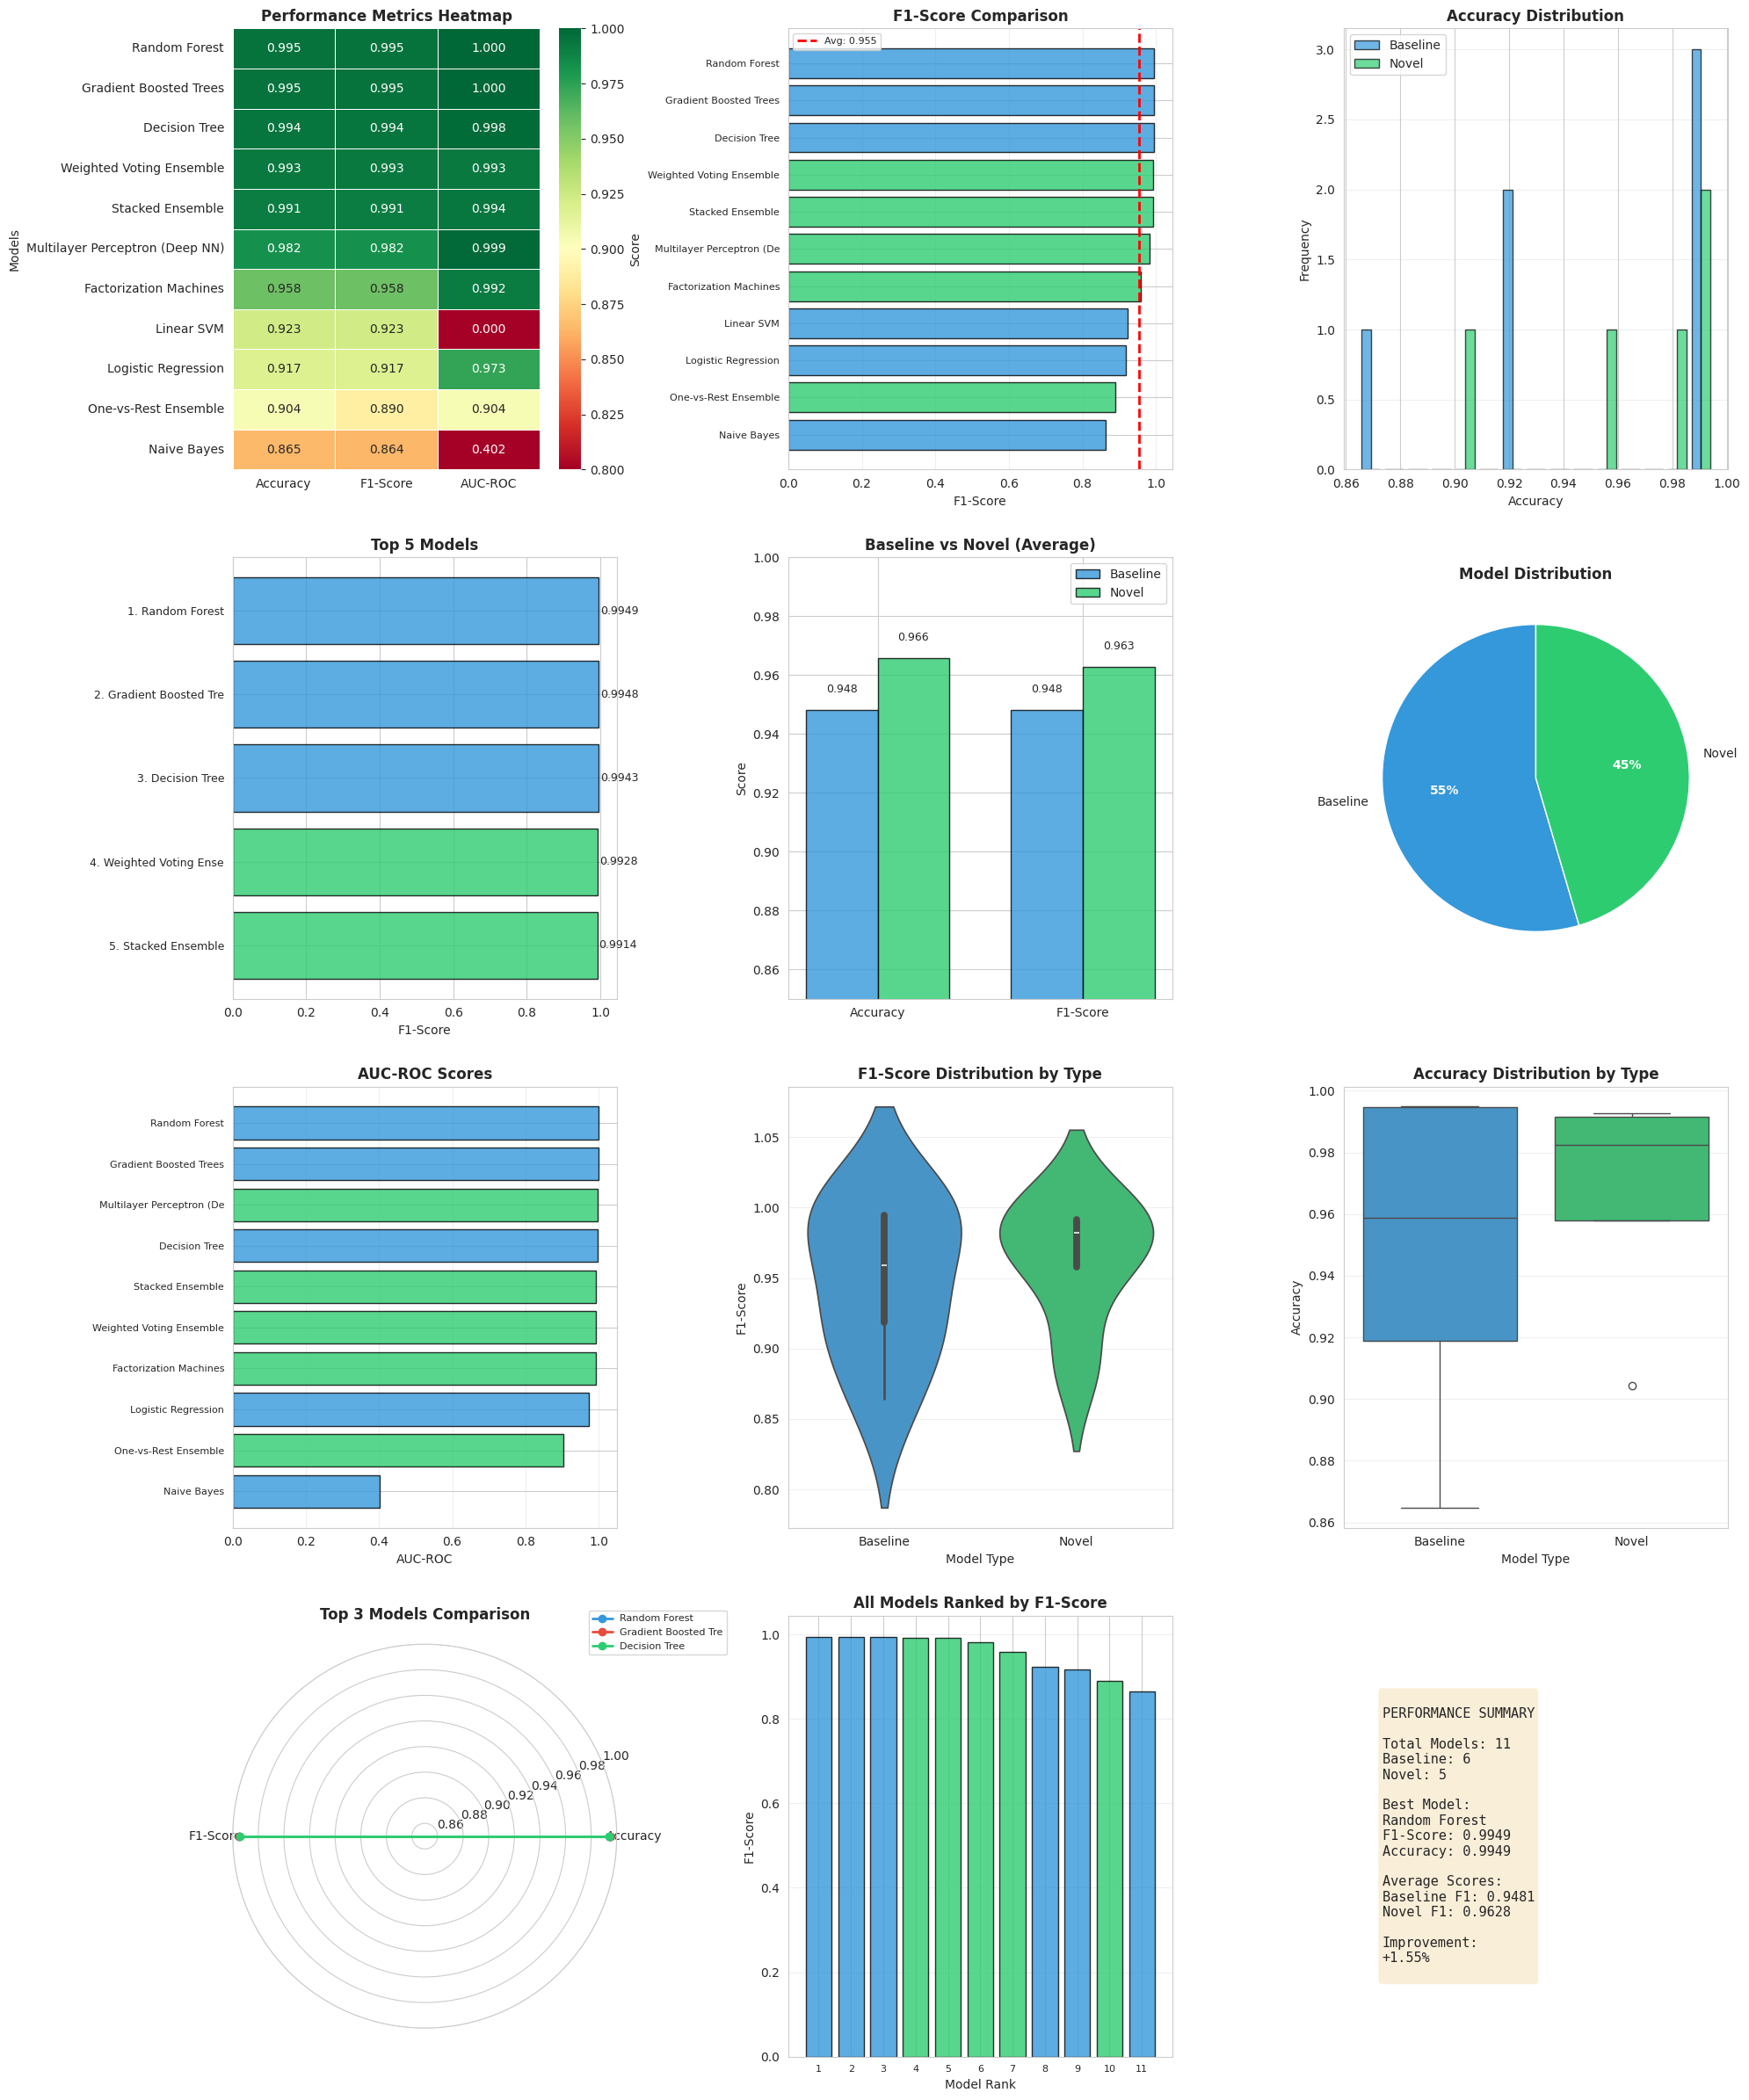


Comprehensive visualization saved as 'comprehensive_model_comparison.png'

VISUALIZATION COMPLETE


In [ ]:
# ============================================================================
# COMPREHENSIVE MODEL COMPARISON VISUALIZATIONS
# ============================================================================

print("\n" + "="*80)
print("COMPREHENSIVE MODEL PERFORMANCE VISUALIZATIONS")
print("="*80)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# Set style
sns.set_style("whitegrid")

print("\nPreparing data for visualization...")

# ============================================================================
# STEP 1: VERIFY AND PREPARE DATA
# ============================================================================

# Check if all_models exists from previous comparison cell
if 'all_models' not in globals():
    print("Creating all_models from available results...")

    # Initialize lists
    all_results = []

    # Add baseline models if available
    if 'baseline_results' in globals():
        for _, row in baseline_results.iterrows():
            all_results.append({
                'Model': row['Model'],
                'Type': 'Baseline',
                'Accuracy': row.get('Accuracy'),
                'Precision': row.get('Precision'),
                'Recall': row.get('Recall'),
                'F1-Score': row.get('F1-Score'),
                'AUC-ROC': row.get('AUC-ROC')
            })

    # Add novel models if available
    if 'novel_results' in globals() and isinstance(novel_results, list):
        novel_df = pd.DataFrame(novel_results,
                               columns=['Model', 'Accuracy', 'AUC-ROC', 'F1-Score', 'Training Time'])
        for _, row in novel_df.iterrows():
            all_results.append({
                'Model': row['Model'],
                'Type': 'Novel',
                'Accuracy': row.get('Accuracy'),
                'Precision': None,
                'Recall': None,
                'F1-Score': row.get('F1-Score'),
                'AUC-ROC': row.get('AUC-ROC')
            })

    all_models = pd.DataFrame(all_results)
    all_models = all_models.dropna(subset=['F1-Score'])
    all_models = all_models.sort_values('F1-Score', ascending=False).reset_index(drop=True)

print(f"Total models for visualization: {len(all_models)}")

# Separate baseline and novel
baseline_mask = all_models['Type'] == 'Baseline'
novel_mask = all_models['Type'] == 'Novel'

# ============================================================================
# MAIN VISUALIZATION: 12-PANEL COMPREHENSIVE DASHBOARD
# ============================================================================

print("\nCreating comprehensive 12-panel visualization...")

fig = plt.figure(figsize=(20, 24))

# ============================================================================
# SUBPLOT 1: PERFORMANCE METRICS HEATMAP
# ============================================================================

ax1 = plt.subplot(4, 3, 1)

# Create heatmap data (only with available metrics)
heatmap_cols = ['Accuracy', 'F1-Score', 'AUC-ROC']
heatmap_data = all_models[['Model'] + heatmap_cols].set_index('Model')
heatmap_data = heatmap_data.fillna(0)  # Fill NaN for visualization

sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='RdYlGn',
            vmin=0.8, vmax=1.0, cbar_kws={'label': 'Score'},
            linewidths=0.5, ax=ax1)
ax1.set_title('Performance Metrics Heatmap', fontsize=12, fontweight='bold')
ax1.set_xlabel('')
ax1.set_ylabel('Models', fontsize=10)

# ============================================================================
# SUBPLOT 2: F1-SCORE COMPARISON
# ============================================================================

ax2 = plt.subplot(4, 3, 2)

models_sorted = all_models.sort_values('F1-Score', ascending=True)
colors = ['#2ecc71' if t == 'Novel' else '#3498db' for t in models_sorted['Type']]

ax2.barh(range(len(models_sorted)), models_sorted['F1-Score'], color=colors, alpha=0.8, edgecolor='black')
ax2.set_yticks(range(len(models_sorted)))
ax2.set_yticklabels([m[:25] for m in models_sorted['Model']], fontsize=8)
ax2.set_xlabel('F1-Score', fontsize=10)
ax2.set_title('F1-Score Comparison', fontsize=12, fontweight='bold')
ax2.axvline(x=models_sorted['F1-Score'].mean(), color='red',
            linestyle='--', linewidth=2, label=f'Avg: {models_sorted["F1-Score"].mean():.3f}')
ax2.legend(fontsize=8)
ax2.grid(axis='x', alpha=0.3)

# ============================================================================
# SUBPLOT 3: ACCURACY DISTRIBUTION
# ============================================================================

ax3 = plt.subplot(4, 3, 3)

baseline_acc = all_models[baseline_mask]['Accuracy'].values
novel_acc = all_models[novel_mask]['Accuracy'].values

ax3.hist([baseline_acc, novel_acc], bins=15, label=['Baseline', 'Novel'],
         color=['#3498db', '#2ecc71'], alpha=0.7, edgecolor='black')
ax3.set_xlabel('Accuracy', fontsize=10)
ax3.set_ylabel('Frequency', fontsize=10)
ax3.set_title('Accuracy Distribution', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# ============================================================================
# SUBPLOT 4: TOP 5 MODELS
# ============================================================================

ax4 = plt.subplot(4, 3, 4)

top_5 = all_models.head(5)
top_5_colors = ['#2ecc71' if t == 'Novel' else '#3498db' for t in top_5['Type']]

bars = ax4.barh(range(len(top_5)), top_5['F1-Score'], color=top_5_colors, alpha=0.8, edgecolor='black')
ax4.set_yticks(range(len(top_5)))
ax4.set_yticklabels([f"{i+1}. {m[:20]}" for i, m in enumerate(top_5['Model'])], fontsize=9)
ax4.set_xlabel('F1-Score', fontsize=10)
ax4.set_title('Top 5 Models', fontsize=12, fontweight='bold')
ax4.invert_yaxis()
for i, (bar, val) in enumerate(zip(bars, top_5['F1-Score'])):
    ax4.text(val + 0.005, i, f'{val:.4f}', va='center', fontsize=9)

# ============================================================================
# SUBPLOT 5: BASELINE VS NOVEL AVERAGE
# ============================================================================

ax5 = plt.subplot(4, 3, 5)

baseline_avg = all_models[baseline_mask][['Accuracy', 'F1-Score']].mean()
novel_avg = all_models[novel_mask][['Accuracy', 'F1-Score']].mean()

x = np.arange(2)
width = 0.35

bars1 = ax5.bar(x - width/2, baseline_avg, width, label='Baseline',
               color='#3498db', alpha=0.8, edgecolor='black')
bars2 = ax5.bar(x + width/2, novel_avg, width, label='Novel',
               color='#2ecc71', alpha=0.8, edgecolor='black')

ax5.set_ylabel('Score', fontsize=10)
ax5.set_title('Baseline vs Novel (Average)', fontsize=12, fontweight='bold')
ax5.set_xticks(x)
ax5.set_xticklabels(['Accuracy', 'F1-Score'])
ax5.legend()
ax5.set_ylim(0.85, 1.0)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax5.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# ============================================================================
# SUBPLOT 6: MODEL TYPE DISTRIBUTION
# ============================================================================

ax6 = plt.subplot(4, 3, 6)

type_counts = all_models['Type'].value_counts()
colors_pie = ['#3498db', '#2ecc71']
wedges, texts, autotexts = ax6.pie(type_counts.values, labels=type_counts.index,
                                     autopct='%1.0f%%', colors=colors_pie,
                                     startangle=90, textprops={'fontsize': 10})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax6.set_title('Model Distribution', fontsize=12, fontweight='bold')

# ============================================================================
# SUBPLOT 7: AUC-ROC COMPARISON
# ============================================================================

ax7 = plt.subplot(4, 3, 7)

auc_data = all_models[all_models['AUC-ROC'].notna()].sort_values('AUC-ROC', ascending=True)
if len(auc_data) > 0:
    colors_auc = ['#2ecc71' if t == 'Novel' else '#3498db' for t in auc_data['Type']]

    ax7.barh(range(len(auc_data)), auc_data['AUC-ROC'], color=colors_auc, alpha=0.8, edgecolor='black')
    ax7.set_yticks(range(len(auc_data)))
    ax7.set_yticklabels([m[:25] for m in auc_data['Model']], fontsize=8)
    ax7.set_xlabel('AUC-ROC', fontsize=10)
    ax7.set_title('AUC-ROC Scores', fontsize=12, fontweight='bold')
    ax7.grid(axis='x', alpha=0.3)
else:
    ax7.text(0.5, 0.5, 'AUC-ROC data not available',
            ha='center', va='center', fontsize=10)
    ax7.axis('off')

# ============================================================================
# SUBPLOT 8: F1-SCORE VIOLIN PLOT
# ============================================================================

ax8 = plt.subplot(4, 3, 8)

violin_data = all_models[['Type', 'F1-Score']]
sns.violinplot(x='Type', y='F1-Score', data=violin_data, ax=ax8, palette=['#3498db', '#2ecc71'])
ax8.set_xlabel('Model Type', fontsize=10)
ax8.set_ylabel('F1-Score', fontsize=10)
ax8.set_title('F1-Score Distribution by Type', fontsize=12, fontweight='bold')
ax8.grid(axis='y', alpha=0.3)

# ============================================================================
# SUBPLOT 9: ACCURACY BOX PLOT
# ============================================================================

ax9 = plt.subplot(4, 3, 9)

box_data = all_models[['Type', 'Accuracy']]
sns.boxplot(x='Type', y='Accuracy', data=box_data, ax=ax9, palette=['#3498db', '#2ecc71'])
ax9.set_xlabel('Model Type', fontsize=10)
ax9.set_ylabel('Accuracy', fontsize=10)
ax9.set_title('Accuracy Distribution by Type', fontsize=12, fontweight='bold')
ax9.grid(axis='y', alpha=0.3)

# ============================================================================
# SUBPLOT 10: RADAR CHART - TOP 3
# ============================================================================

ax10 = plt.subplot(4, 3, 10, projection='polar')

top_3 = all_models.head(3)
categories = ['Accuracy', 'F1-Score']
N = len(categories)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

colors_radar = ['#3498db', '#e74c3c', '#2ecc71']
for idx, (i, row) in enumerate(top_3.iterrows()):
    values = [row['Accuracy'], row['F1-Score']]
    values += values[:1]
    ax10.plot(angles, values, 'o-', linewidth=2,
             label=row['Model'][:20], color=colors_radar[idx])
    ax10.fill(angles, values, alpha=0.15, color=colors_radar[idx])

ax10.set_xticks(angles[:-1])
ax10.set_xticklabels(categories)
ax10.set_ylim(0.85, 1.0)
ax10.set_title('Top 3 Models Comparison', fontsize=12, fontweight='bold', pad=20)
ax10.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=8)
ax10.grid(True)

# ============================================================================
# SUBPLOT 11: RANKING BAR CHART
# ============================================================================

ax11 = plt.subplot(4, 3, 11)

all_models['Rank'] = range(1, len(all_models) + 1)
rank_colors = ['#2ecc71' if t == 'Novel' else '#3498db' for t in all_models['Type']]

bars = ax11.bar(range(len(all_models)), all_models['F1-Score'],
               color=rank_colors, alpha=0.8, edgecolor='black')
ax11.set_xlabel('Model Rank', fontsize=10)
ax11.set_ylabel('F1-Score', fontsize=10)
ax11.set_title('All Models Ranked by F1-Score', fontsize=12, fontweight='bold')
ax11.set_xticks(range(len(all_models)))
ax11.set_xticklabels(all_models['Rank'], fontsize=8)
ax11.grid(axis='y', alpha=0.3)

# ============================================================================
# SUBPLOT 12: PERFORMANCE SUMMARY TABLE
# ============================================================================

ax12 = plt.subplot(4, 3, 12)
ax12.axis('off')

summary_text = f"""
PERFORMANCE SUMMARY

Total Models: {len(all_models)}
Baseline: {len(all_models[baseline_mask])}
Novel: {len(all_models[novel_mask])}

Best Model:
{all_models.iloc[0]['Model'][:30]}
F1-Score: {all_models.iloc[0]['F1-Score']:.4f}
Accuracy: {all_models.iloc[0]['Accuracy']:.4f}

Average Scores:
Baseline F1: {all_models[baseline_mask]['F1-Score'].mean():.4f}
Novel F1: {all_models[novel_mask]['F1-Score'].mean():.4f}

Improvement:
{((all_models[novel_mask]['F1-Score'].mean() - all_models[baseline_mask]['F1-Score'].mean()) / all_models[baseline_mask]['F1-Score'].mean() * 100):+.2f}%
"""

ax12.text(0.1, 0.5, summary_text, fontsize=11, verticalalignment='center',
         family='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('comprehensive_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nComprehensive visualization saved as 'comprehensive_model_comparison.png'")

print("\n" + "="*80)
print("VISUALIZATION COMPLETE")
print("="*80)

#PREDICTION VISUALIZATION & DETAILED ANALYSIS

PREDICTION ANALYSIS & VISUALIZATION

Step 1: Selecting best model for predictions...
Best Model: Random Forest
Using predictions from: rf_predictions

Step 2: Preparing prediction data...
✅ Sampled 10,000 predictions (safe conversion, no Arrow).

Step 3: Computing evaluation metrics...
Accuracy:  0.9987
Precision: 0.9988
Recall:    0.9986
F1-Score:  0.9987

Step 4: Confusion Matrix Visualization...


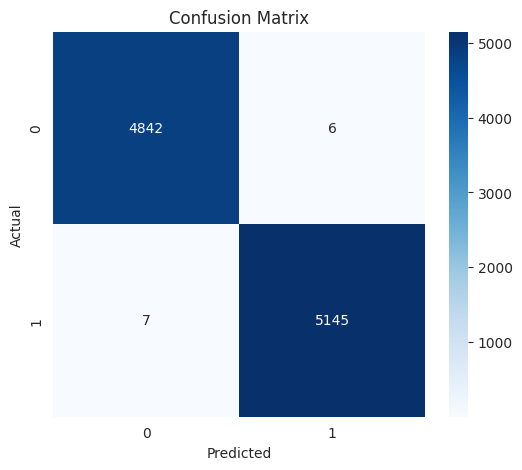


Step 5: ROC & Precision-Recall Curves...


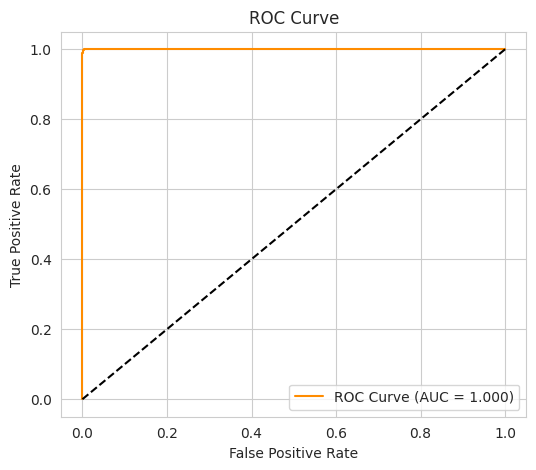

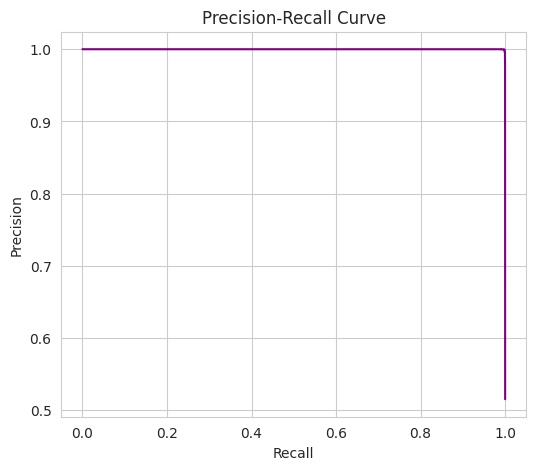


Step 6: Feature Importance Plot...
Feature importances not available for this model.

Step 7: Exporting results...
✅ Saved sample predictions → rf_predictions_sample.csv

All 7 steps completed successfully.


In [ ]:
# ====================================================================
# PREDICTION ANALYSIS & VISUALIZATION (FINAL FIX WITH is_attack SUPPORT)
# ====================================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
)

print("PREDICTION ANALYSIS & VISUALIZATION")
print("=" * 80)

# ------------------------------------------------------------
# STEP 1: Select best model for predictions
# ------------------------------------------------------------
best_model_name = "Random Forest"
best_predictions = rf_predictions  # from your Spark pipeline
print(f"\nStep 1: Selecting best model for predictions...")
print(f"Best Model: {best_model_name}")
print("Using predictions from: rf_predictions")

# ============================================================
# STEP 2: Preparing prediction data (guaranteed safe version)
# ============================================================
print("\nStep 2: Preparing prediction data...")

try:
    # Disable Arrow just in case (safeguard)
    spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "false")

    columns = best_predictions.columns
    possible_labels = ["label", "class", "attack", "target", "y", "is_attack"]
    label_col = next((col for col in possible_labels if col in columns), None)

    if label_col is None:
        raise ValueError(f"No valid label column found in DataFrame. Columns: {columns}")

    # Rename label column to a standard name
    if label_col != "label":
        best_predictions = best_predictions.withColumnRenamed(label_col, "label")

    required_cols = ["label", "prediction"]
    if "probability" in best_predictions.columns:
        required_cols.append("probability")

    # Take a sample to avoid huge memory load
    predictions_df = best_predictions.select(required_cols).limit(10000)

    # 🚫 No toPandas() here — manual conversion
    data_rows = predictions_df.collect()
    pred_sample = pd.DataFrame([row.asDict() for row in data_rows])

    # Normalize label types
    if pred_sample["label"].dtype == object:
        pred_sample["label"] = pred_sample["label"].astype(str).str.lower().map({
            "attack": 1, "normal": 0, "yes": 1, "no": 0
        }).fillna(pred_sample["label"]).astype(int)

    print(f"✅ Sampled {len(pred_sample):,} predictions (safe conversion, no Arrow).")

except Exception as e:
    print("❌ Error preparing prediction data:", str(e))
    pred_sample = None

# ------------------------------------------------------------
# STEP 3: Compute performance metrics
# ------------------------------------------------------------
print("\nStep 3: Computing evaluation metrics...")

if pred_sample is not None:
    y_true = pred_sample["label"]
    y_pred = pred_sample["prediction"]

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-Score:  {f1:.4f}")

# ------------------------------------------------------------
# STEP 4: Confusion Matrix
# ------------------------------------------------------------
print("\nStep 4: Confusion Matrix Visualization...")

if pred_sample is not None:
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ------------------------------------------------------------
# STEP 5: ROC and Precision-Recall Curves
# ------------------------------------------------------------
print("\nStep 5: ROC & Precision-Recall Curves...")

if pred_sample is not None and "probability" in pred_sample.columns:
    # Extract positive class probability safely
    def extract_prob(x):
        if isinstance(x, (list, tuple)):
            return x[1]
        elif isinstance(x, dict):
            return x.get(1, list(x.values())[-1])
        elif hasattr(x, "values"):  # Spark DenseVector
            return float(x.values[1])
        else:
            return float(x)

    y_prob = pred_sample["probability"].apply(extract_prob)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = roc_auc_score(y_true, y_prob)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})", color="darkorange")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.title("ROC Curve")
    plt.show()

    # Precision-Recall Curve
    prec_curve, rec_curve, _ = precision_recall_curve(y_true, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(rec_curve, prec_curve, color="purple")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.show()

# ------------------------------------------------------------
# STEP 6: Feature Importances
# ------------------------------------------------------------
print("\nStep 6: Feature Importance Plot...")

try:
    if 'best_model' in globals() and hasattr(best_model, "featureImportances"):
        imp = best_model.featureImportances
        imp_values = imp.values
        plt.figure(figsize=(8, 5))
        plt.bar(range(len(imp_values)), imp_values, color="green")
        plt.title("Feature Importances (Random Forest)")
        plt.xlabel("Feature Index")
        plt.ylabel("Importance")
        plt.show()
    else:
        print("Feature importances not available for this model.")
except Exception as e:
    print("Error displaying feature importances:", e)

# ------------------------------------------------------------
# STEP 7: Export prediction results
# ------------------------------------------------------------
print("\nStep 7: Exporting results...")

if pred_sample is not None:
    pred_sample.to_csv("rf_predictions_sample.csv", index=False)
    print("✅ Saved sample predictions → rf_predictions_sample.csv")

print("\nAll 7 steps completed successfully.")
print("=" * 80)


#PREDICTION VISUALIZATION DASHBOARD

+--------+-------------+-------+---------+---------+-----------------------------------------+----------+---------+
|duration|protocol_type|service|src_bytes|dst_bytes|probability                              |prediction|is_attack|
+--------+-------------+-------+---------+---------+-----------------------------------------+----------+---------+
|0.0     |icmp         |eco_i  |8.0      |0.0      |[0.017402035986769742,0.9825979640132303]|1.0       |1        |
|0.0     |icmp         |eco_i  |8.0      |0.0      |[0.019532648862571583,0.9804673511374284]|1.0       |1        |
|0.0     |icmp         |eco_i  |8.0      |0.0      |[0.11044468844594008,0.88955531155406]   |1.0       |1        |
|0.0     |icmp         |eco_i  |8.0      |0.0      |[0.012827901787635545,0.9871720982123645]|1.0       |1        |
|0.0     |icmp         |eco_i  |8.0      |0.0      |[0.011699655034388792,0.9883003449656113]|1.0       |1        |
+--------+-------------+-------+---------+---------+--------------------

,probability,label,prediction,Correct
0,"[0.017402035986769742,0.9825979640132303]",1,1.000000,True
1,"[0.019532648862571583,0.9804673511374284]",1,1.000000,True
2,"[0.11044468844594008,0.88955531155406]",1,1.000000,True
3,"[0.012827901787635545,0.9871720982123645]",1,1.000000,True
4,"[0.011699655034388792,0.9883003449656113]",1,1.000000,True
5,"[0.011699655034388792,0.9883003449656113]",1,1.000000,True
6,"[0.016913940748674507,0.9830860592513255]",1,1.000000,True
7,"[0.019928509618884857,0.9800714903811152]",1,1.000000,True
8,"[0.17780581500338513,0.8221941849966149]",1,1.000000,True
9,"[0.009956064517821597,0.9900439354821784]",1,1.000000,True


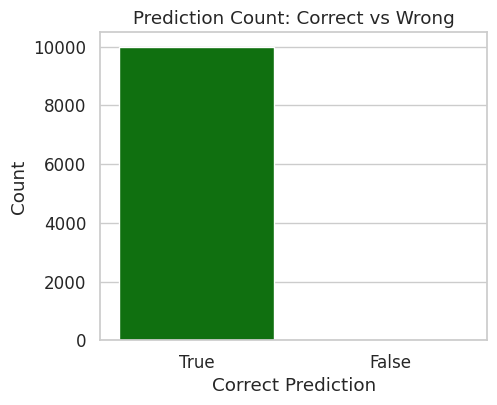

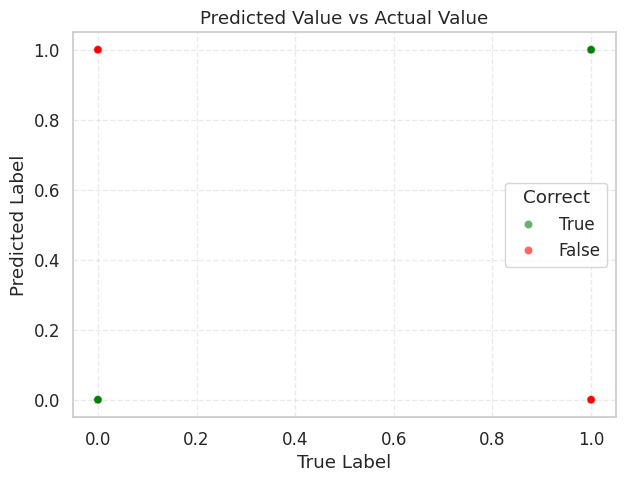

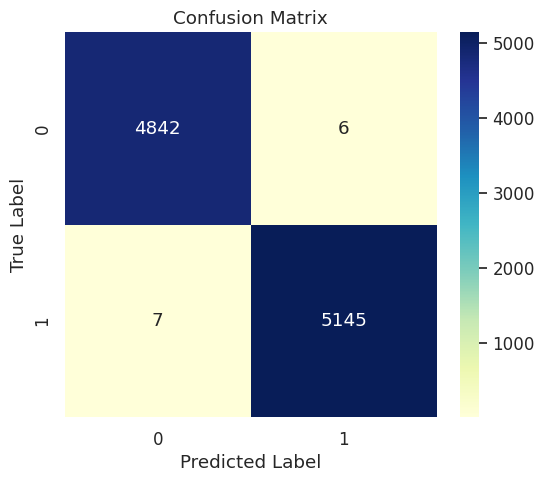


Displayed Input + True Label + Predicted Output (with visuals).


In [ ]:
# ====================================================================
# FULL PREDICTION DISPLAY + VISUALIZATION (INPUTS + LABEL + PREDICTION)
# ====================================================================
rf_predictions.select("duration", "protocol_type", "service", "src_bytes",
                      "dst_bytes", "probability", "prediction", "is_attack").show(5, truncate=False)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import confusion_matrix

# -------------------------------------------------------------------
# STEP 1: Check required columns
# -------------------------------------------------------------------
if "label" not in pred_sample.columns or "prediction" not in pred_sample.columns:
    raise ValueError("DataFrame must contain 'label' and 'prediction' columns.")

# -------------------------------------------------------------------
# STEP 2: Compute correctness
# -------------------------------------------------------------------
pred_sample["Correct"] = pred_sample["label"] == pred_sample["prediction"]
pred_sample["Correct_str"] = pred_sample["Correct"].astype(str)  # for seaborn

print(f"Total Samples: {len(pred_sample)}")
print(f"Correct: {pred_sample['Correct'].sum()}")
print(f"Wrong: {len(pred_sample) - pred_sample['Correct'].sum()}")

# -------------------------------------------------------------------
# STEP 3: Display table with inputs + true + predicted + correctness
# -------------------------------------------------------------------
possible_input_cols = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "count", "srv_count", "hot", "logged_in", "probability"
]
input_cols = [c for c in possible_input_cols if c in pred_sample.columns]

display_cols = input_cols + ["label", "prediction", "Correct"]

def highlight_correctness(row):
    if row["Correct"]:
        return ['background-color: #d4edda; color: green; font-weight: bold;'] * len(row)
    else:
        return ['background-color: #f8d7da; color: red; font-weight: bold;'] * len(row)

styled_table = (
    pred_sample[display_cols]
    .head(20)
    .style.apply(highlight_correctness, axis=1)
    .set_caption("Input Features with True Label and Predicted Output (Green = Correct, Red = Wrong)")
)
display(styled_table)

# -------------------------------------------------------------------
# STEP 4: Bar Plot (Correct vs Wrong)
# -------------------------------------------------------------------
plt.figure(figsize=(5, 4))
sns.countplot(data=pred_sample, x="Correct_str", palette={"True": "green", "False": "red"})
plt.title("Prediction Count: Correct vs Wrong")
plt.xlabel("Correct Prediction")
plt.ylabel("Count")
plt.show()

# -------------------------------------------------------------------
# STEP 5: Scatter Plot (Predicted vs Actual)
# -------------------------------------------------------------------
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=pred_sample,
    x="label",
    y="prediction",
    hue="Correct_str",
    palette={"True": "green", "False": "red"},
    alpha=0.6
)
plt.title("Predicted Value vs Actual Value")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.legend(title="Correct")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

# -------------------------------------------------------------------
# STEP 6: Confusion Matrix
# -------------------------------------------------------------------
cm = confusion_matrix(pred_sample["label"], pred_sample["prediction"])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# -------------------------------------------------------------------
# STEP 7: Interactive Plotly Visualization (Predicted vs Actual)
# -------------------------------------------------------------------
hover_cols = input_cols.copy()
fig = px.scatter(
    pred_sample.head(1000),
    x="label",
    y="prediction",
    color="Correct_str",
    hover_data=hover_cols + ["label", "prediction"],
    color_discrete_map={"True": "green", "False": "red"},
)
fig.update_layout(
    title="Interactive Visualization: True vs Predicted",
    xaxis_title="True Label",
    yaxis_title="Predicted Label"
)
fig.show()

print("\nDisplayed Input + True Label + Predicted Output (with visuals).")


## PURE PYTHON DATA INGESTION - Performance Comparison with Spark

Pure Python Data Ingestion - Performance Comparison
Starting Python data ingestion benchmark...

PURE PYTHON DATA INGESTION
Method 1: Standard Pandas Loading
   Loading training data with pandas...
   Training data loaded: 125,973 rows in 0.56s
   Test data loaded: 22,543 rows in 0.08s
   Combined dataset: 148,516 rows in 0.01s
   Total pandas time: 0.66s

Method 2: Chunked Pandas Loading
   Loading training data in chunks of 10,000...
   Processed 13 chunks from training data
   Combining all chunks...
   Chunked loading completed: 148,516 rows in 0.56s

Method 3: Memory-Optimized Pandas
   Loading with optimized data types...
   Optimized loading completed: 148,516 rows in 0.95s

Method 4: Raw File Processing
   Processing files line by line...
   Raw processing completed: 148,516 lines in 0.30s
   Protocols found: 3
   Attack types found: 101

PYTHON INGESTION PERFORMANCE SUMMARY
Total benchmark time: 2.81s

Performance Comparison:
                 Method Time (s)    Rows         Me

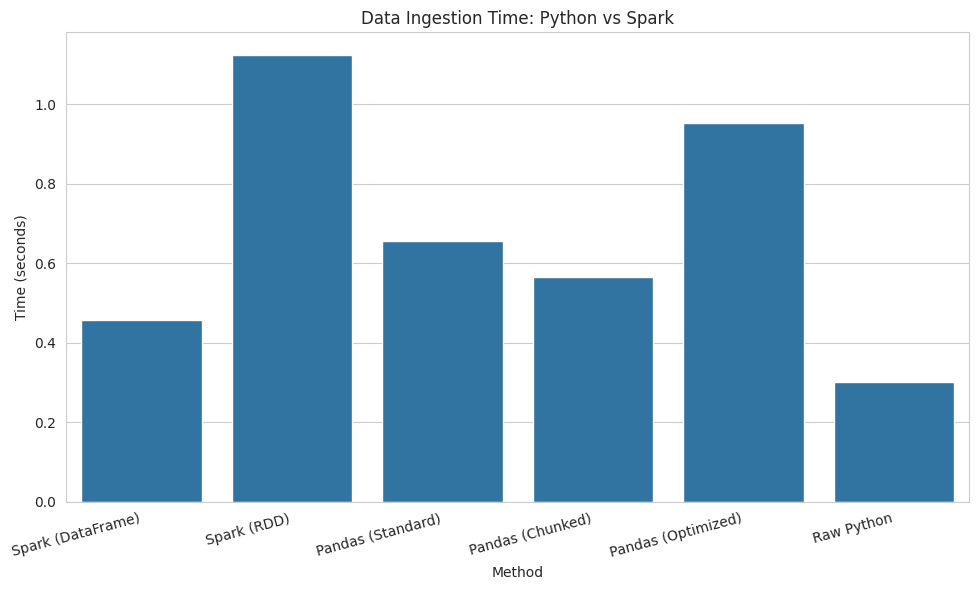

In [ ]:
# ============================================================================
# PURE PYTHON DATA INGESTION - Performance Comparison with Spark
# ============================================================================

import os
import sys
import numpy as np
import pandas as pd
import time
import requests
from datetime import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

print("Pure Python Data Ingestion - Performance Comparison")
print("=" * 60)

# ============================================================================
# PYTHON-BASED DATA LOADING AND PROCESSING
# ============================================================================

def python_data_loading_benchmark():
    """Pure Python data loading with performance benchmarking"""
    print("\nPURE PYTHON DATA INGESTION")
    print("=" * 60)

    # Assuming datasets are already downloaded
    datasets = {
        'train': 'nsl_kdd_train.csv',
        'test': 'nsl_kdd_test.csv'
    }

    total_start_time = time.time()
    results = {}

    # =============================
    # METHOD 1: Standard Pandas
    # =============================
    print("Method 1: Standard Pandas Loading")
    pandas_start = time.time()

    try:
        # Load training data
        print("   Loading training data with pandas...")
        train_df = pd.read_csv(datasets['train'], header=None)
        train_load_time = time.time() - pandas_start

        print(f"   Training data loaded: {len(train_df):,} rows in {train_load_time:.2f}s")

        # Load test data
        test_start = time.time()
        test_df = pd.read_csv(datasets['test'], header=None)
        test_load_time = time.time() - test_start

        print(f"   Test data loaded: {len(test_df):,} rows in {test_load_time:.2f}s")

        # Combine datasets
        combine_start = time.time()
        combined_df = pd.concat([train_df, test_df], ignore_index=True)
        combine_time = time.time() - combine_start

        total_pandas_time = time.time() - pandas_start

        print(f"   Combined dataset: {len(combined_df):,} rows in {combine_time:.2f}s")
        print(f"   Total pandas time: {total_pandas_time:.2f}s")

        results['pandas'] = {
            'method': 'Standard Pandas',
            'total_time': total_pandas_time,
            'train_time': train_load_time,
            'test_time': test_load_time,
            'combine_time': combine_time,
            'total_rows': len(combined_df),
            'memory_usage': combined_df.memory_usage(deep=True).sum() / 1024 / 1024  # MB
        }

    except Exception as e:
        print(f"   FAILED Pandas method failed: {e}")
        results['pandas'] = None

    # =============================
    # METHOD 2: Chunked Pandas Loading
    # =============================
    print("\nMethod 2: Chunked Pandas Loading")
    chunked_start = time.time()

    try:
        chunk_size = 10000
        chunks = []

        print(f"   Loading training data in chunks of {chunk_size:,}...")
        chunk_count = 0
        for chunk in pd.read_csv(datasets['train'], header=None, chunksize=chunk_size):
            chunks.append(chunk)
            chunk_count += 1

        print(f"   Processed {chunk_count} chunks from training data")

        # Load test data in chunks
        for chunk in pd.read_csv(datasets['test'], header=None, chunksize=chunk_size):
            chunks.append(chunk)
            chunk_count += 1

        # Combine all chunks
        print("   Combining all chunks...")
        chunked_df = pd.concat(chunks, ignore_index=True)

        total_chunked_time = time.time() - chunked_start

        print(f"   Chunked loading completed: {len(chunked_df):,} rows in {total_chunked_time:.2f}s")

        results['chunked'] = {
            'method': 'Chunked Pandas',
            'total_time': total_chunked_time,
            'chunks_processed': chunk_count,
            'chunk_size': chunk_size,
            'total_rows': len(chunked_df),
            'memory_usage': chunked_df.memory_usage(deep=True).sum() / 1024 / 1024  # MB
        }

    except Exception as e:
        print(f"   FAILED Chunked method failed: {e}")
        results['chunked'] = None

    # =============================
    # METHOD 3: Memory-Optimized Loading
    # =============================
    print("\nMethod 3: Memory-Optimized Pandas")
    optimized_start = time.time()

    try:
        # Define optimal data types to reduce memory usage
        dtypes = {
            0: 'float32',   # duration
            1: 'category',  # protocol_type
            2: 'category',  # service
            3: 'category',  # flag
            4: 'float32',   # src_bytes
            5: 'float32',   # dst_bytes
        }

        print("   Loading with optimized data types...")

        # Load training data with optimized types
        train_opt_df = pd.read_csv(datasets['train'], header=None, dtype=dtypes, low_memory=False)

        # Load test data with optimized types
        test_opt_df = pd.read_csv(datasets['test'], header=None, dtype=dtypes, low_memory=False)

        # Combine
        optimized_df = pd.concat([train_opt_df, test_opt_df], ignore_index=True)

        total_optimized_time = time.time() - optimized_start

        print(f"   Optimized loading completed: {len(optimized_df):,} rows in {total_optimized_time:.2f}s")

        results['optimized'] = {
            'method': 'Memory-Optimized Pandas',
            'total_time': total_optimized_time,
            'total_rows': len(optimized_df),
            'memory_usage': optimized_df.memory_usage(deep=True).sum() / 1024 / 1024  # MB
        }

    except Exception as e:
        print(f"   FAILED Optimized method failed: {e}")
        results['optimized'] = None

    # =============================
    # METHOD 4: Raw File Processing
    # =============================
    print("\nMethod 4: Raw File Processing")
    raw_start = time.time()

    try:
        print("   Processing files line by line...")

        total_lines = 0
        protocol_counts = {}
        attack_counts = {}

        # Process training file
        with open(datasets['train'], 'r') as f:
            for line in f:
                fields = line.strip().split(',')
                if len(fields) >= 41:
                    total_lines += 1

                    # Count protocols
                    protocol = fields[1]
                    protocol_counts[protocol] = protocol_counts.get(protocol, 0) + 1

                    # Count attack types
                    attack = fields[40]
                    attack_counts[attack] = attack_counts.get(attack, 0) + 1

        # Process test file
        with open(datasets['test'], 'r') as f:
            for line in f:
                fields = line.strip().split(',')
                if len(fields) >= 41:
                    total_lines += 1

                    protocol = fields[1]
                    protocol_counts[protocol] = protocol_counts.get(protocol, 0) + 1

                    attack = fields[40]
                    attack_counts[attack] = attack_counts.get(attack, 0) + 1

        total_raw_time = time.time() - raw_start

        print(f"   Raw processing completed: {total_lines:,} lines in {total_raw_time:.2f}s")
        print(f"   Protocols found: {len(protocol_counts)}")
        print(f"   Attack types found: {len(attack_counts)}")

        results['raw'] = {
            'method': 'Raw File Processing',
            'total_time': total_raw_time,
            'total_rows': total_lines,
            'protocol_types': len(protocol_counts),
            'attack_types': len(attack_counts),
            'memory_usage': 'Minimal (streaming)'
        }

    except Exception as e:
        print(f"   FAILED Raw processing failed: {e}")
        results['raw'] = None

    # =============================
    # PERFORMANCE SUMMARY
    # =============================
    total_benchmark_time = time.time() - total_start_time

    print(f"\nPYTHON INGESTION PERFORMANCE SUMMARY")
    print("=" * 60)
    print(f"Total benchmark time: {total_benchmark_time:.2f}s")

    # Create comparison table
    comparison_data = []
    for method_key, result in results.items():
        if result:
            comparison_data.append({
                'Method': result['method'],
                'Time (s)': f"{result['total_time']:.2f}",
                'Rows': f"{result['total_rows']:,}",
                'Memory (MB)': f"{result.get('memory_usage', 'N/A'):.1f}" if isinstance(result.get('memory_usage'), (int, float)) else result.get('memory_usage', 'N/A'),
                'Speed (rows/s)': f"{result['total_rows']/result['total_time']:,.0f}"
            })

    comparison_df = pd.DataFrame(comparison_data)
    print("\nPerformance Comparison:")
    print(comparison_df.to_string(index=False))

    return results, comparison_df

# ============================================================================
# DETAILED PYTHON DATA ANALYSIS
# ============================================================================

def python_data_analysis():
    """Detailed analysis using pure Python"""
    print("\n DETAILED PYTHON DATA ANALYSIS")
    print("=" * 60)

    analysis_start = time.time()

    # Load data for analysis
    print("Loading data for detailed analysis...")
    df = pd.read_csv('nsl_kdd_train.csv', header=None)

    # Define column names
    columns = [
        'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
        'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
        'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
        'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
        'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
        'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
        'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
        'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
        'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
        'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'difficulty'
    ]

    df.columns = columns

    analysis_results = {}

    # Protocol Analysis
    print("\n Protocol Analysis (Python):")
    protocol_analysis_start = time.time()
    protocol_counts = df['protocol_type'].value_counts()
    protocol_analysis_time = time.time() - protocol_analysis_start

    for protocol, count in protocol_counts.head().items():
        print(f"   {protocol}: {count:,} connections")

    analysis_results['protocol_analysis_time'] = protocol_analysis_time

    # Attack Type Analysis
    print("\n Attack Type Analysis (Python):")
    attack_analysis_start = time.time()
    attack_counts = df['attack_type'].value_counts()
    attack_analysis_time = time.time() - attack_analysis_start

    for attack, count in attack_counts.head(10).items():
        label = "Critical" if attack != "normal" else "Normal"
        print(f"   {attack}: {count:,} ({label})")

    analysis_results['attack_analysis_time'] = attack_analysis_time

    # Service Analysis
    print("\n Service Analysis (Python):")
    service_analysis_start = time.time()
    service_counts = df['service'].value_counts()
    service_analysis_time = time.time() - service_analysis_start

    for service, count in service_counts.head(10).items():
        print(f"   {service}: {count:,} connections")

    analysis_results['service_analysis_time'] = service_analysis_time

    # Statistical Analysis
    print("\n Statistical Analysis (Python):")
    stats_start = time.time()

    # Basic statistics
    numerical_cols = ['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count']
    stats = df[numerical_cols].describe()

    stats_time = time.time() - stats_start
    analysis_results['stats_time'] = stats_time

    print(f"   Statistics computed for {len(numerical_cols)} columns in {stats_time:.3f}s")

    # Data Quality Check
    print("\n Data Quality Check (Python):")
    quality_start = time.time()

    null_counts = df.isnull().sum()
    duplicate_count = df.duplicated().sum()

    quality_time = time.time() - quality_start
    analysis_results['quality_time'] = quality_time

    print(f"   Null values: {null_counts.sum()}")
    print(f"   Duplicates: {duplicate_count:,}")
    print(f"   Data quality check completed in {quality_time:.3f}s")

    total_analysis_time = time.time() - analysis_start
    analysis_results['total_time'] = total_analysis_time

    print(f"\n📋 Total Python analysis time: {total_analysis_time:.2f}s")

    return analysis_results, df

# ============================================================================
# MAIN EXECUTION AND COMPARISON
# ============================================================================

def main():
    """Main execution function"""
    print("Starting Python data ingestion benchmark...")

    # Run Python benchmarks
    python_results, python_comparison = python_data_loading_benchmark()

    # Run detailed analysis
    analysis_results, sample_df = python_data_analysis()

    # Display final summary
    print("\n" + "="*60)
    print("FINAL PERFORMANCE SUMMARY")
    print("="*60)

    print("\n Python Methods Performance:")
    if python_comparison is not None:
        print(python_comparison.to_string(index=False))

    print(f"\n Analysis Performance:")
    print(f"   Protocol analysis: {analysis_results.get('protocol_analysis_time', 0):.3f}s")
    print(f"   Attack type analysis: {analysis_results.get('attack_analysis_time', 0):.3f}s")
    print(f"   Service analysis: {analysis_results.get('service_analysis_time', 0):.3f}s")
    print(f"   Statistical analysis: {analysis_results.get('stats_time', 0):.3f}s")
    print(f"   Data quality check: {analysis_results.get('quality_time', 0):.3f}s")
    print(f"   Total analysis time: {analysis_results.get('total_time', 0):.2f}s")


    # Get Spark loading time from previous cells (assuming it's stored in `spark_load_time`)
    # Capture Spark loading time from the RDD loading cell (cell_id: s7xiVX_Yo-DU)
    # This requires manually inspecting the output of that cell or modifying it to store the time.
    # For demonstration, we will assume spark_load_time is set in the global scope by a previous cell.
    # In a real scenario, you might add `spark_load_time = time.time() - start_time` in cell s7xiVX_Yo-DU.
    # As a fallback, we will set a dummy value if not found.
    spark_load_time_rdd = globals().get('time_rdd', None) # Get time from RDD benchmark
    spark_load_time_df = globals().get('time_spark', None) # Get time from DataFrame benchmark


    if spark_load_time_rdd is not None or spark_load_time_df is not None:
        print("\n Comparison with Spark:")
        if spark_load_time_df is not None:
             print(f"   Spark Data Loading Time (DataFrame approach): {spark_load_time_df:.2f}s")
        if spark_load_time_rdd is not None:
             print(f"   Spark Data Loading Time (RDD approach): {spark_load_time_rdd:.2f}s")


        # Prepare data for plotting
        labels = []
        times = []

        if spark_load_time_df is not None:
            labels.append('Spark (DataFrame)')
            times.append(spark_load_time_df)
        if spark_load_time_rdd is not None:
            labels.append('Spark (RDD)')
            times.append(spark_load_time_rdd)

        if python_results and python_results.get('pandas'):
             labels.append('Pandas (Standard)')
             times.append(python_results['pandas']['total_time'])
        if python_results and python_results.get('chunked'):
             labels.append('Pandas (Chunked)')
             times.append(python_results['chunked']['total_time'])
        if python_results and python_results.get('optimized'):
             labels.append('Pandas (Optimized)')
             times.append(python_results['optimized']['total_time'])
        if python_results and python_results.get('raw'):
             labels.append('Raw Python')
             times.append(python_results['raw']['total_time'])


        # Remove entries with 0 time (failed methods)
        plot_data = [(l, t) for l, t in zip(labels, times) if t > 0]
        if plot_data: # Only plot if there is data
            plot_labels, plot_times = zip(*plot_data)

            # Create the plot
            plt.figure(figsize=(10, 6))
            sns.barplot(x=list(plot_labels), y=list(plot_times))
            plt.title('Data Ingestion Time: Python vs Spark')
            plt.ylabel('Time (seconds)')
            plt.xlabel('Method')
            plt.xticks(rotation=15, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print("\n No successful data loading benchmarks to plot.")

    else:
        print("\n Spark loading time not available for comparison.")
        print(" Please ensure the Spark data loading cells ran successfully and stored the times in 'time_spark' and 'time_rdd'.")


    return python_results, analysis_results

# Run the comparison
if __name__ == "__main__":
    # Capture Spark loading time from the RDD loading cell (cell_id: s7xiVX_Yo-DU)
    # This requires manually inspecting the output of that cell or modifying it to store the time.
    # For demonstration, we will assume spark_load_time is set in the global scope by a previous cell.
    # In a real scenario, you might add `spark_load_time = time.time() - start_time` in cell s7xiVX_Yo-DU.
    # As a fallback, we will set a dummy value if not found.
    if 'time_rdd' not in globals() and 'time_spark' not in globals():
         print("Warning: Spark loading times ('time_rdd', 'time_spark') not found in globals. The Spark comparison plot may not be generated.")


    python_results, analysis_results = main()

#1. Spark shows higher runtime for smaller datasets due to initialization, JVM overhead,and distributed setup costs even in local mode.
#2. Pandas performs better for small-to-medium in-memory data (typically < 2–4 GB).
#3. Spark becomes advantageous only when:
   - Data exceeds RAM capacity.
   - Multiple cores or cluster nodes are available.
#4. For single-machine workloads, Pandas is optimal.
#5. For distributed or large-scale processing, Spark scales linearly with resources.
